In [146]:
import pandas as pd
import numpy as np
import os
import random
import matplotlib.pyplot as plt


filename = 'train.csv'
filename2 = 'test.csv'
path = 'C:\Users\User\Documents\Training Assignments\Logistic Regression'

### read the dataset into a DataFrame object called df
df_train = pd.read_csv(os.path.join(path, filename),sep=',')
df_test = pd.read_csv(os.path.join(path,filename2),sep=',')


def label_conversion(X):
###prepares the dataset for learning
    
    ##calculates no of family members as sum of siblings + parents
    X['No_of_family_members'] = X['SibSp'] + X['Parch']
    
    ##drops non essential information 
    X.drop(['PassengerId','Name','SibSp','Parch','Fare','Cabin','Ticket'],axis=1,inplace=True)
    
    ##drops missing values
    X.dropna(axis=0, how='any',inplace=True)
    
    ###converts text labels into numeric values
    X.loc[X['Sex'] == 'male', 'Sex'] = 1.0
    X.loc[X['Sex'] == 'female', 'Sex'] = 0.0
        
    
    X.loc[X['Embarked'] == 'C', 'Embarked'] = 2.0 
    X.loc[X['Embarked'] == 'Q', 'Embarked'] = 1.0
    X.loc[X['Embarked'] == 'S', 'Embarked'] = 0.0

    return X



df_train = label_conversion(df_train)
df_test = label_conversion(df_test)


df_train.head(10)




,Survived,Pclass,Sex,Age,Embarked,No_of_family_members
0,0,3,1,22.0,0,1
1,1,1,0,38.0,2,1
2,1,3,0,26.0,0,0
3,1,1,0,35.0,0,1
4,0,3,1,35.0,0,0
6,0,1,1,54.0,0,0
7,0,3,1,2.0,0,4
8,1,3,0,27.0,0,2
9,1,2,0,14.0,2,1
10,1,3,0,4.0,0,2


In [147]:
###separate output labels from the dataset
train_data_y = df_train['Survived']
train_data_x = df_train.drop('Survived',axis=1)

test_data_x = df_test

### Check if any null values are present
#test_data_x.isna().any()


In [148]:
###normalize the datasets on the mean and standard deviation of the training set
mean_value = train_data_x.mean(axis=0)
std_value = train_data_x.std(axis=0)

train_data_x = (train_data_x - mean_value)/std_value

test_data_x = (test_data_x - mean_value)/std_value



In [149]:
###convert into numpy arrays and add bias units
train_data_x = train_data_x.values
train_data_y = train_data_y.values.reshape(train_data_y.size,1)

test_data_x = test_data_x.values

train_data_x = np.insert(train_data_x, 0, [1],axis=1)

test_data_x = np.insert(test_data_x, 0, [1],axis=1)

np.random.seed(42)
parameters = np.random.randn(6,1)

X = train_data_x
Y = train_data_y
X_test = test_data_x



In [150]:
def sigmoid(z):
    ###calculates sigmoid function
    return 1/(1 + np.exp(-z))
    


def cost_calculation(X,Y,parameters):
    ##function takes in X, Y and parameters and calculates the loss and cost functions    
    
    ##z = hypothesis
    z = np.dot(X, parameters)
    
    cost = -1*np.sum(Y*np.log(sigmoid(z)) + (1-Y)*np.log((1-sigmoid(z))),axis=0)/(len(X))
    
    return z, cost



def gradient_calculation(X,Y,parameters,alpha):
    ###this function performs gradient descent on the parameters and stops the descent when the difference reaches a threshold
    diff = 1
    cost_list = []
    
    #while  diff > 0.00001: 
    while diff <100001:      
        ### run the loop for 100000 iterations
        z, cost_before = cost_calculation(X,Y,parameters)
        
        
        gradient = np.multiply((sigmoid(z) - Y),X)
    
        parameters = parameters - (alpha/len(X))*gradient.sum(axis=0).reshape(len(parameters),1)
            
        z, cost_after = cost_calculation(X,Y,parameters)
        
        
        cost_list.append(cost_after)
        
         
        cost_diff = cost_before-cost_after 
        print cost_diff
        
        diff+=1
        

    return parameters , cost_list


alpha=0.0005
parameters, cost_list = gradient_calculation(X,Y,parameters,alpha) 
num_of_iter = list(range(100000))

print 'parameters: \n', parameters


[0.00016331]
[0.00016328]
[0.00016326]
[0.00016324]
[0.00016322]
[0.0001632]
[0.00016317]
[0.00016315]
[0.00016313]
[0.00016311]
[0.00016309]
[0.00016306]
[0.00016304]
[0.00016302]
[0.000163]
[0.00016298]
[0.00016295]
[0.00016293]
[0.00016291]
[0.00016289]
[0.00016287]
[0.00016284]
[0.00016282]
[0.0001628]
[0.00016278]
[0.00016276]
[0.00016273]
[0.00016271]
[0.00016269]
[0.00016267]
[0.00016265]
[0.00016262]
[0.0001626]
[0.00016258]
[0.00016256]
[0.00016254]
[0.00016251]
[0.00016249]
[0.00016247]
[0.00016245]
[0.00016243]
[0.0001624]
[0.00016238]
[0.00016236]
[0.00016234]
[0.00016232]
[0.00016229]
[0.00016227]
[0.00016225]
[0.00016223]
[0.00016221]
[0.00016218]
[0.00016216]
[0.00016214]
[0.00016212]
[0.0001621]
[0.00016207]
[0.00016205]
[0.00016203]
[0.00016201]
[0.00016199]
[0.00016196]
[0.00016194]
[0.00016192]
[0.0001619]
[0.00016188]
[0.00016185]
[0.00016183]
[0.00016181]
[0.00016179]
[0.00016177]
[0.00016174]
[0.00016172]
[0.0001617]
[0.00016168]
[0.00016166]
[0.00016163]
[0.00016

[0.00014394]
[0.00014392]
[0.00014389]
[0.00014387]
[0.00014385]
[0.00014383]
[0.00014381]
[0.00014379]
[0.00014376]
[0.00014374]
[0.00014372]
[0.0001437]
[0.00014368]
[0.00014366]
[0.00014363]
[0.00014361]
[0.00014359]
[0.00014357]
[0.00014355]
[0.00014353]
[0.0001435]
[0.00014348]
[0.00014346]
[0.00014344]
[0.00014342]
[0.0001434]
[0.00014338]
[0.00014335]
[0.00014333]
[0.00014331]
[0.00014329]
[0.00014327]
[0.00014325]
[0.00014322]
[0.0001432]
[0.00014318]
[0.00014316]
[0.00014314]
[0.00014312]
[0.00014309]
[0.00014307]
[0.00014305]
[0.00014303]
[0.00014301]
[0.00014299]
[0.00014296]
[0.00014294]
[0.00014292]
[0.0001429]
[0.00014288]
[0.00014286]
[0.00014283]
[0.00014281]
[0.00014279]
[0.00014277]
[0.00014275]
[0.00014273]
[0.0001427]
[0.00014268]
[0.00014266]
[0.00014264]
[0.00014262]
[0.0001426]
[0.00014258]
[0.00014255]
[0.00014253]
[0.00014251]
[0.00014249]
[0.00014247]
[0.00014245]
[0.00014242]
[0.0001424]
[0.00014238]
[0.00014236]
[0.00014234]
[0.00014232]
[0.00014229]
[0.0001

[0.00012686]
[0.00012684]
[0.00012682]
[0.0001268]
[0.00012678]
[0.00012676]
[0.00012674]
[0.00012671]
[0.00012669]
[0.00012667]
[0.00012665]
[0.00012663]
[0.00012661]
[0.00012659]
[0.00012657]
[0.00012655]
[0.00012653]
[0.0001265]
[0.00012648]
[0.00012646]
[0.00012644]
[0.00012642]
[0.0001264]
[0.00012638]
[0.00012636]
[0.00012634]
[0.00012632]
[0.0001263]
[0.00012628]
[0.00012625]
[0.00012623]
[0.00012621]
[0.00012619]
[0.00012617]
[0.00012615]
[0.00012613]
[0.00012611]
[0.00012609]
[0.00012607]
[0.00012605]
[0.00012602]
[0.000126]
[0.00012598]
[0.00012596]
[0.00012594]
[0.00012592]
[0.0001259]
[0.00012588]
[0.00012586]
[0.00012584]
[0.00012582]
[0.00012579]
[0.00012577]
[0.00012575]
[0.00012573]
[0.00012571]
[0.00012569]
[0.00012567]
[0.00012565]
[0.00012563]
[0.00012561]
[0.00012559]
[0.00012557]
[0.00012554]
[0.00012552]
[0.0001255]
[0.00012548]
[0.00012546]
[0.00012544]
[0.00012542]
[0.0001254]
[0.00012538]
[0.00012536]
[0.00012534]
[0.00012532]
[0.00012529]
[0.00012527]
[0.00012

[0.00011112]
[0.0001111]
[0.00011108]
[0.00011106]
[0.00011104]
[0.00011102]
[0.000111]
[0.00011098]
[0.00011096]
[0.00011094]
[0.00011092]
[0.0001109]
[0.00011088]
[0.00011087]
[0.00011085]
[0.00011083]
[0.00011081]
[0.00011079]
[0.00011077]
[0.00011075]
[0.00011073]
[0.00011071]
[0.00011069]
[0.00011067]
[0.00011065]
[0.00011063]
[0.00011061]
[0.00011059]
[0.00011057]
[0.00011055]
[0.00011053]
[0.00011051]
[0.00011049]
[0.00011047]
[0.00011045]
[0.00011043]
[0.00011041]
[0.00011039]
[0.00011037]
[0.00011035]
[0.00011033]
[0.00011031]
[0.00011029]
[0.00011027]
[0.00011025]
[0.00011023]
[0.00011021]
[0.00011019]
[0.00011017]
[0.00011015]
[0.00011013]
[0.00011011]
[0.00011009]
[0.00011007]
[0.00011005]
[0.00011003]
[0.00011001]
[0.00010999]
[0.00010997]
[0.00010995]
[0.00010993]
[0.00010991]
[0.00010989]
[0.00010987]
[0.00010985]
[0.00010983]
[0.00010981]
[0.00010979]
[0.00010977]
[0.00010975]
[0.00010973]
[0.00010971]
[0.0001097]
[0.00010968]
[0.00010966]
[0.00010964]
[0.00010962]
[0.0

[9.55001199e-05]
[9.54816314e-05]
[9.54631448e-05]
[9.54446602e-05]
[9.54261774e-05]
[9.54076966e-05]
[9.53892176e-05]
[9.53707406e-05]
[9.53522654e-05]
[9.53337922e-05]
[9.53153209e-05]
[9.52968515e-05]
[9.5278384e-05]
[9.52599184e-05]
[9.52414547e-05]
[9.52229929e-05]
[9.52045331e-05]
[9.51860751e-05]
[9.51676191e-05]
[9.51491649e-05]
[9.51307127e-05]
[9.51122624e-05]
[9.5093814e-05]
[9.50753676e-05]
[9.5056923e-05]
[9.50384804e-05]
[9.50200396e-05]
[9.50016008e-05]
[9.49831639e-05]
[9.49647289e-05]
[9.49462959e-05]
[9.49278647e-05]
[9.49094355e-05]
[9.48910081e-05]
[9.48725827e-05]
[9.48541593e-05]
[9.48357377e-05]
[9.4817318e-05]
[9.47989003e-05]
[9.47804845e-05]
[9.47620706e-05]
[9.47436587e-05]
[9.47252486e-05]
[9.47068405e-05]
[9.46884343e-05]
[9.467003e-05]
[9.46516277e-05]
[9.46332272e-05]
[9.46148287e-05]
[9.45964321e-05]
[9.45780375e-05]
[9.45596447e-05]
[9.45412539e-05]
[9.4522865e-05]
[9.45044781e-05]
[9.4486093e-05]
[9.44677099e-05]
[9.44493287e-05]
[9.44309495e-05]
[9.44

[8.16195189e-05]
[8.16026346e-05]
[8.15857526e-05]
[8.15688727e-05]
[8.1551995e-05]
[8.15351195e-05]
[8.15182461e-05]
[8.15013749e-05]
[8.14845059e-05]
[8.14676391e-05]
[8.14507744e-05]
[8.14339119e-05]
[8.14170516e-05]
[8.14001934e-05]
[8.13833375e-05]
[8.13664837e-05]
[8.13496321e-05]
[8.13327826e-05]
[8.13159354e-05]
[8.12990903e-05]
[8.12822474e-05]
[8.12654067e-05]
[8.12485681e-05]
[8.12317317e-05]
[8.12148975e-05]
[8.11980655e-05]
[8.11812357e-05]
[8.1164408e-05]
[8.11475825e-05]
[8.11307592e-05]
[8.11139381e-05]
[8.10971192e-05]
[8.10803024e-05]
[8.10634878e-05]
[8.10466754e-05]
[8.10298652e-05]
[8.10130572e-05]
[8.09962513e-05]
[8.09794477e-05]
[8.09626462e-05]
[8.09458469e-05]
[8.09290498e-05]
[8.09122548e-05]
[8.08954621e-05]
[8.08786715e-05]
[8.08618831e-05]
[8.08450969e-05]
[8.08283129e-05]
[8.0811531e-05]
[8.07947514e-05]
[8.07779739e-05]
[8.07611987e-05]
[8.07444256e-05]
[8.07276547e-05]
[8.07108859e-05]
[8.06941194e-05]
[8.06773551e-05]
[8.06605929e-05]
[8.06438329e-05]


[6.93107099e-05]
[6.9295563e-05]
[6.92804185e-05]
[6.92652763e-05]
[6.92501364e-05]
[6.92349989e-05]
[6.92198638e-05]
[6.92047309e-05]
[6.91896004e-05]
[6.91744722e-05]
[6.91593464e-05]
[6.91442229e-05]
[6.91291017e-05]
[6.91139829e-05]
[6.90988664e-05]
[6.90837522e-05]
[6.90686404e-05]
[6.90535309e-05]
[6.90384238e-05]
[6.9023319e-05]
[6.90082165e-05]
[6.89931164e-05]
[6.89780186e-05]
[6.89629231e-05]
[6.894783e-05]
[6.89327392e-05]
[6.89176508e-05]
[6.89025646e-05]
[6.88874809e-05]
[6.88723994e-05]
[6.88573203e-05]
[6.88422436e-05]
[6.88271692e-05]
[6.88120971e-05]
[6.87970274e-05]
[6.878196e-05]
[6.87668949e-05]
[6.87518322e-05]
[6.87367718e-05]
[6.87217138e-05]
[6.87066581e-05]
[6.86916047e-05]
[6.86765537e-05]
[6.8661505e-05]
[6.86464587e-05]
[6.86314147e-05]
[6.8616373e-05]
[6.86013337e-05]
[6.85862967e-05]
[6.85712621e-05]
[6.85562298e-05]
[6.85411999e-05]
[6.85261723e-05]
[6.8511147e-05]
[6.84961241e-05]
[6.84811035e-05]
[6.84660853e-05]
[6.84510694e-05]
[6.84360558e-05]
[6.842

[5.78819628e-05]
[5.78687246e-05]
[5.78554887e-05]
[5.78422553e-05]
[5.78290243e-05]
[5.78157956e-05]
[5.78025694e-05]
[5.77893455e-05]
[5.7776124e-05]
[5.77629049e-05]
[5.77496881e-05]
[5.77364738e-05]
[5.77232619e-05]
[5.77100523e-05]
[5.76968451e-05]
[5.76836403e-05]
[5.76704379e-05]
[5.76572379e-05]
[5.76440403e-05]
[5.7630845e-05]
[5.76176522e-05]
[5.76044617e-05]
[5.75912736e-05]
[5.75780879e-05]
[5.75649046e-05]
[5.75517237e-05]
[5.75385452e-05]
[5.7525369e-05]
[5.75121952e-05]
[5.74990239e-05]
[5.74858549e-05]
[5.74726883e-05]
[5.7459524e-05]
[5.74463622e-05]
[5.74332028e-05]
[5.74200457e-05]
[5.7406891e-05]
[5.73937387e-05]
[5.73805888e-05]
[5.73674413e-05]
[5.73542962e-05]
[5.73411534e-05]
[5.73280131e-05]
[5.73148751e-05]
[5.73017395e-05]
[5.72886063e-05]
[5.72754755e-05]
[5.72623471e-05]
[5.7249221e-05]
[5.72360974e-05]
[5.72229761e-05]
[5.72098572e-05]
[5.71967407e-05]
[5.71836266e-05]
[5.71705149e-05]
[5.71574055e-05]
[5.71442986e-05]
[5.7131194e-05]
[5.71180918e-05]
[5.7

[4.77444583e-05]
[4.77331727e-05]
[4.77218894e-05]
[4.77106084e-05]
[4.76993297e-05]
[4.76880534e-05]
[4.76767793e-05]
[4.76655076e-05]
[4.76542382e-05]
[4.76429711e-05]
[4.76317063e-05]
[4.76204438e-05]
[4.76091837e-05]
[4.75979258e-05]
[4.75866703e-05]
[4.75754171e-05]
[4.75641662e-05]
[4.75529176e-05]
[4.75416713e-05]
[4.75304273e-05]
[4.75191857e-05]
[4.75079463e-05]
[4.74967093e-05]
[4.74854746e-05]
[4.74742422e-05]
[4.74630121e-05]
[4.74517843e-05]
[4.74405588e-05]
[4.74293357e-05]
[4.74181148e-05]
[4.74068963e-05]
[4.73956801e-05]
[4.73844661e-05]
[4.73732545e-05]
[4.73620453e-05]
[4.73508383e-05]
[4.73396336e-05]
[4.73284312e-05]
[4.73172312e-05]
[4.73060334e-05]
[4.7294838e-05]
[4.72836449e-05]
[4.72724541e-05]
[4.72612656e-05]
[4.72500794e-05]
[4.72388955e-05]
[4.72277139e-05]
[4.72165346e-05]
[4.72053577e-05]
[4.7194183e-05]
[4.71830107e-05]
[4.71718406e-05]
[4.71606729e-05]
[4.71495075e-05]
[4.71383443e-05]
[4.71271835e-05]
[4.7116025e-05]
[4.71048688e-05]
[4.70937149e-05]


[3.95353861e-05]
[3.95258695e-05]
[3.95163552e-05]
[3.95068429e-05]
[3.94973328e-05]
[3.94878249e-05]
[3.94783191e-05]
[3.94688155e-05]
[3.9459314e-05]
[3.94498146e-05]
[3.94403175e-05]
[3.94308224e-05]
[3.94213295e-05]
[3.94118387e-05]
[3.94023501e-05]
[3.93928637e-05]
[3.93833794e-05]
[3.93738972e-05]
[3.93644172e-05]
[3.93549393e-05]
[3.93454635e-05]
[3.93359899e-05]
[3.93265185e-05]
[3.93170492e-05]
[3.9307582e-05]
[3.9298117e-05]
[3.92886541e-05]
[3.92791934e-05]
[3.92697348e-05]
[3.92602784e-05]
[3.92508241e-05]
[3.92413719e-05]
[3.92319219e-05]
[3.9222474e-05]
[3.92130283e-05]
[3.92035847e-05]
[3.91941432e-05]
[3.91847039e-05]
[3.91752667e-05]
[3.91658317e-05]
[3.91563988e-05]
[3.9146968e-05]
[3.91375394e-05]
[3.91281129e-05]
[3.91186886e-05]
[3.91092664e-05]
[3.90998463e-05]
[3.90904284e-05]
[3.90810126e-05]
[3.9071599e-05]
[3.90621874e-05]
[3.90527781e-05]
[3.90433708e-05]
[3.90339657e-05]
[3.90245627e-05]
[3.90151619e-05]
[3.90057632e-05]
[3.89963666e-05]
[3.89869722e-05]
[3.

[3.27516587e-05]
[3.27437312e-05]
[3.27358056e-05]
[3.27278819e-05]
[3.27199602e-05]
[3.27120404e-05]
[3.27041225e-05]
[3.26962066e-05]
[3.26882925e-05]
[3.26803804e-05]
[3.26724702e-05]
[3.26645619e-05]
[3.26566555e-05]
[3.26487511e-05]
[3.26408486e-05]
[3.26329479e-05]
[3.26250492e-05]
[3.26171525e-05]
[3.26092576e-05]
[3.26013647e-05]
[3.25934736e-05]
[3.25855845e-05]
[3.25776973e-05]
[3.25698121e-05]
[3.25619287e-05]
[3.25540473e-05]
[3.25461677e-05]
[3.25382901e-05]
[3.25304144e-05]
[3.25225406e-05]
[3.25146687e-05]
[3.25067988e-05]
[3.24989307e-05]
[3.24910646e-05]
[3.24832003e-05]
[3.2475338e-05]
[3.24674776e-05]
[3.24596191e-05]
[3.24517625e-05]
[3.24439079e-05]
[3.24360551e-05]
[3.24282043e-05]
[3.24203553e-05]
[3.24125083e-05]
[3.24046632e-05]
[3.23968199e-05]
[3.23889786e-05]
[3.23811392e-05]
[3.23733017e-05]
[3.23654661e-05]
[3.23576325e-05]
[3.23498007e-05]
[3.23419708e-05]
[3.23341429e-05]
[3.23263168e-05]
[3.23184927e-05]
[3.23106704e-05]
[3.23028501e-05]
[3.22950316e-05

[2.73231586e-05]
[2.73165808e-05]
[2.73100047e-05]
[2.73034303e-05]
[2.72968576e-05]
[2.72902866e-05]
[2.72837172e-05]
[2.72771495e-05]
[2.72705834e-05]
[2.7264019e-05]
[2.72574564e-05]
[2.72508953e-05]
[2.7244336e-05]
[2.72377783e-05]
[2.72312223e-05]
[2.72246679e-05]
[2.72181153e-05]
[2.72115643e-05]
[2.72050149e-05]
[2.71984673e-05]
[2.71919213e-05]
[2.71853769e-05]
[2.71788343e-05]
[2.71722933e-05]
[2.71657539e-05]
[2.71592163e-05]
[2.71526803e-05]
[2.71461459e-05]
[2.71396133e-05]
[2.71330823e-05]
[2.71265529e-05]
[2.71200253e-05]
[2.71134993e-05]
[2.71069749e-05]
[2.71004522e-05]
[2.70939312e-05]
[2.70874119e-05]
[2.70808942e-05]
[2.70743781e-05]
[2.70678638e-05]
[2.70613511e-05]
[2.705484e-05]
[2.70483306e-05]
[2.70418229e-05]
[2.70353169e-05]
[2.70288125e-05]
[2.70223097e-05]
[2.70158086e-05]
[2.70093092e-05]
[2.70028114e-05]
[2.69963153e-05]
[2.69898209e-05]
[2.69833281e-05]
[2.69768369e-05]
[2.69703475e-05]
[2.69638596e-05]
[2.69573735e-05]
[2.69508889e-05]
[2.69444061e-05]
[

[2.27499934e-05]
[2.27445996e-05]
[2.27392071e-05]
[2.27338161e-05]
[2.27284264e-05]
[2.27230382e-05]
[2.27176514e-05]
[2.2712266e-05]
[2.27068821e-05]
[2.27014995e-05]
[2.26961184e-05]
[2.26907387e-05]
[2.26853604e-05]
[2.26799835e-05]
[2.2674608e-05]
[2.26692339e-05]
[2.26638613e-05]
[2.265849e-05]
[2.26531202e-05]
[2.26477518e-05]
[2.26423848e-05]
[2.26370192e-05]
[2.2631655e-05]
[2.26262923e-05]
[2.26209309e-05]
[2.26155709e-05]
[2.26102124e-05]
[2.26048553e-05]
[2.25994996e-05]
[2.25941452e-05]
[2.25887923e-05]
[2.25834409e-05]
[2.25780908e-05]
[2.25727421e-05]
[2.25673948e-05]
[2.25620489e-05]
[2.25567045e-05]
[2.25513614e-05]
[2.25460198e-05]
[2.25406796e-05]
[2.25353407e-05]
[2.25300033e-05]
[2.25246673e-05]
[2.25193326e-05]
[2.25139994e-05]
[2.25086676e-05]
[2.25033372e-05]
[2.24980082e-05]
[2.24926806e-05]
[2.24873544e-05]
[2.24820296e-05]
[2.24767062e-05]
[2.24713842e-05]
[2.24660636e-05]
[2.24607444e-05]
[2.24554266e-05]
[2.24501102e-05]
[2.24447952e-05]
[2.24394816e-05]
[2

[2.00679184e-05]
[2.00632344e-05]
[2.00585517e-05]
[2.00538702e-05]
[2.00491899e-05]
[2.00445109e-05]
[2.00398332e-05]
[2.00351567e-05]
[2.00304814e-05]
[2.00258074e-05]
[2.00211346e-05]
[2.00164631e-05]
[2.00117928e-05]
[2.00071238e-05]
[2.0002456e-05]
[1.99977894e-05]
[1.99931241e-05]
[1.99884601e-05]
[1.99837973e-05]
[1.99791357e-05]
[1.99744753e-05]
[1.99698162e-05]
[1.99651584e-05]
[1.99605018e-05]
[1.99558464e-05]
[1.99511923e-05]
[1.99465394e-05]
[1.99418877e-05]
[1.99372373e-05]
[1.99325881e-05]
[1.99279402e-05]
[1.99232935e-05]
[1.99186481e-05]
[1.99140038e-05]
[1.99093608e-05]
[1.99047191e-05]
[1.99000786e-05]
[1.98954393e-05]
[1.98908013e-05]
[1.98861645e-05]
[1.98815289e-05]
[1.98768946e-05]
[1.98722615e-05]
[1.98676296e-05]
[1.9862999e-05]
[1.98583696e-05]
[1.98537415e-05]
[1.98491146e-05]
[1.98444889e-05]
[1.98398644e-05]
[1.98352412e-05]
[1.98306192e-05]
[1.98259984e-05]
[1.98213789e-05]
[1.98167606e-05]
[1.98121436e-05]
[1.98075277e-05]
[1.98029131e-05]
[1.97982997e-05]

[1.74908156e-05]
[1.74868208e-05]
[1.7482827e-05]
[1.74788343e-05]
[1.74748427e-05]
[1.74708521e-05]
[1.74668626e-05]
[1.74628742e-05]
[1.74588869e-05]
[1.74549006e-05]
[1.74509154e-05]
[1.74469312e-05]
[1.74429481e-05]
[1.74389661e-05]
[1.74349852e-05]
[1.74310053e-05]
[1.74270265e-05]
[1.74230488e-05]
[1.74190721e-05]
[1.74150965e-05]
[1.7411122e-05]
[1.74071485e-05]
[1.74031761e-05]
[1.73992048e-05]
[1.73952345e-05]
[1.73912653e-05]
[1.73872971e-05]
[1.73833301e-05]
[1.7379364e-05]
[1.73753991e-05]
[1.73714352e-05]
[1.73674724e-05]
[1.73635106e-05]
[1.73595499e-05]
[1.73555903e-05]
[1.73516317e-05]
[1.73476742e-05]
[1.73437177e-05]
[1.73397624e-05]
[1.7335808e-05]
[1.73318548e-05]
[1.73279026e-05]
[1.73239514e-05]
[1.73200013e-05]
[1.73160523e-05]
[1.73121043e-05]
[1.73081574e-05]
[1.73042116e-05]
[1.73002668e-05]
[1.72963231e-05]
[1.72923804e-05]
[1.72884388e-05]
[1.72844982e-05]
[1.72805587e-05]
[1.72766203e-05]
[1.72726829e-05]
[1.72687465e-05]
[1.72648113e-05]
[1.7260877e-05]
[1

[1.55412585e-05]
[1.55377868e-05]
[1.55343161e-05]
[1.55308463e-05]
[1.55273775e-05]
[1.55239096e-05]
[1.55204426e-05]
[1.55169765e-05]
[1.55135114e-05]
[1.55100472e-05]
[1.55065839e-05]
[1.55031216e-05]
[1.54996602e-05]
[1.54961997e-05]
[1.54927401e-05]
[1.54892815e-05]
[1.54858238e-05]
[1.5482367e-05]
[1.54789112e-05]
[1.54754562e-05]
[1.54720022e-05]
[1.54685492e-05]
[1.5465097e-05]
[1.54616458e-05]
[1.54581955e-05]
[1.54547462e-05]
[1.54512977e-05]
[1.54478502e-05]
[1.54444036e-05]
[1.5440958e-05]
[1.54375132e-05]
[1.54340694e-05]
[1.54306265e-05]
[1.54271846e-05]
[1.54237435e-05]
[1.54203034e-05]
[1.54168642e-05]
[1.54134259e-05]
[1.54099886e-05]
[1.54065522e-05]
[1.54031167e-05]
[1.53996821e-05]
[1.53962484e-05]
[1.53928157e-05]
[1.53893838e-05]
[1.53859529e-05]
[1.5382523e-05]
[1.53790939e-05]
[1.53756657e-05]
[1.53722385e-05]
[1.53688122e-05]
[1.53653868e-05]
[1.53619624e-05]
[1.53585388e-05]
[1.53551162e-05]
[1.53516945e-05]
[1.53482737e-05]
[1.53448538e-05]
[1.53414349e-05]
[

[1.34729068e-05]
[1.34699887e-05]
[1.34670715e-05]
[1.3464155e-05]
[1.34612392e-05]
[1.34583243e-05]
[1.34554101e-05]
[1.34524967e-05]
[1.34495841e-05]
[1.34466723e-05]
[1.34437612e-05]
[1.34408509e-05]
[1.34379414e-05]
[1.34350327e-05]
[1.34321247e-05]
[1.34292176e-05]
[1.34263112e-05]
[1.34234055e-05]
[1.34205007e-05]
[1.34175966e-05]
[1.34146933e-05]
[1.34117907e-05]
[1.3408889e-05]
[1.3405988e-05]
[1.34030878e-05]
[1.34001883e-05]
[1.33972897e-05]
[1.33943918e-05]
[1.33914947e-05]
[1.33885983e-05]
[1.33857027e-05]
[1.33828079e-05]
[1.33799139e-05]
[1.33770206e-05]
[1.33741281e-05]
[1.33712364e-05]
[1.33683455e-05]
[1.33654553e-05]
[1.33625659e-05]
[1.33596772e-05]
[1.33567894e-05]
[1.33539023e-05]
[1.33510159e-05]
[1.33481304e-05]
[1.33452456e-05]
[1.33423616e-05]
[1.33394783e-05]
[1.33365958e-05]
[1.33337141e-05]
[1.33308331e-05]
[1.3327953e-05]
[1.33250735e-05]
[1.33221949e-05]
[1.3319317e-05]
[1.33164399e-05]
[1.33135635e-05]
[1.3310688e-05]
[1.33078131e-05]
[1.33049391e-05]
[1.

[1.13270199e-05]
[1.13246699e-05]
[1.13223206e-05]
[1.13199719e-05]
[1.13176237e-05]
[1.13152763e-05]
[1.13129294e-05]
[1.13105831e-05]
[1.13082374e-05]
[1.13058924e-05]
[1.1303548e-05]
[1.13012042e-05]
[1.1298861e-05]
[1.12965184e-05]
[1.12941764e-05]
[1.12918351e-05]
[1.12894944e-05]
[1.12871542e-05]
[1.12848147e-05]
[1.12824758e-05]
[1.12801376e-05]
[1.12777999e-05]
[1.12754628e-05]
[1.12731264e-05]
[1.12707906e-05]
[1.12684553e-05]
[1.12661207e-05]
[1.12637867e-05]
[1.12614533e-05]
[1.12591206e-05]
[1.12567884e-05]
[1.12544569e-05]
[1.12521259e-05]
[1.12497956e-05]
[1.12474659e-05]
[1.12451368e-05]
[1.12428083e-05]
[1.12404804e-05]
[1.12381531e-05]
[1.12358265e-05]
[1.12335004e-05]
[1.1231175e-05]
[1.12288501e-05]
[1.12265259e-05]
[1.12242023e-05]
[1.12218793e-05]
[1.12195569e-05]
[1.12172351e-05]
[1.12149139e-05]
[1.12125933e-05]
[1.12102733e-05]
[1.1207954e-05]
[1.12056352e-05]
[1.12033171e-05]
[1.12009995e-05]
[1.11986826e-05]
[1.11963663e-05]
[1.11940506e-05]
[1.11917354e-05]
[

[9.62593613e-06]
[9.6240275e-06]
[9.62211936e-06]
[9.62021171e-06]
[9.61830455e-06]
[9.61639787e-06]
[9.61449168e-06]
[9.61258599e-06]
[9.61068078e-06]
[9.60877605e-06]
[9.60687182e-06]
[9.60496807e-06]
[9.60306481e-06]
[9.60116204e-06]
[9.59925975e-06]
[9.59735796e-06]
[9.59545664e-06]
[9.59355582e-06]
[9.59165548e-06]
[9.58975563e-06]
[9.58785626e-06]
[9.58595738e-06]
[9.58405899e-06]
[9.58216108e-06]
[9.58026366e-06]
[9.57836672e-06]
[9.57647027e-06]
[9.57457431e-06]
[9.57267883e-06]
[9.57078383e-06]
[9.56888932e-06]
[9.5669953e-06]
[9.56510176e-06]
[9.5632087e-06]
[9.56131613e-06]
[9.55942404e-06]
[9.55753244e-06]
[9.55564132e-06]
[9.55375068e-06]
[9.55186053e-06]
[9.54997086e-06]
[9.54808167e-06]
[9.54619297e-06]
[9.54430475e-06]
[9.54241701e-06]
[9.54052976e-06]
[9.53864299e-06]
[9.5367567e-06]
[9.53487089e-06]
[9.53298557e-06]
[9.53110072e-06]
[9.52921636e-06]
[9.52733249e-06]
[9.52544909e-06]
[9.52356617e-06]
[9.52168374e-06]
[9.51980179e-06]
[9.51792031e-06]
[9.51603932e-06]
[

[8.23920964e-06]
[8.23765128e-06]
[8.23609331e-06]
[8.23453572e-06]
[8.23297852e-06]
[8.23142171e-06]
[8.22986528e-06]
[8.22830924e-06]
[8.22675359e-06]
[8.22519833e-06]
[8.22364345e-06]
[8.22208896e-06]
[8.22053485e-06]
[8.21898113e-06]
[8.2174278e-06]
[8.21587485e-06]
[8.21432229e-06]
[8.21277011e-06]
[8.21121832e-06]
[8.20966691e-06]
[8.20811589e-06]
[8.20656526e-06]
[8.20501501e-06]
[8.20346515e-06]
[8.20191567e-06]
[8.20036657e-06]
[8.19881786e-06]
[8.19726954e-06]
[8.1957216e-06]
[8.19417404e-06]
[8.19262687e-06]
[8.19108008e-06]
[8.18953368e-06]
[8.18798766e-06]
[8.18644203e-06]
[8.18489678e-06]
[8.18335191e-06]
[8.18180742e-06]
[8.18026332e-06]
[8.1787196e-06]
[8.17717627e-06]
[8.17563332e-06]
[8.17409075e-06]
[8.17254856e-06]
[8.17100676e-06]
[8.16946534e-06]
[8.1679243e-06]
[8.16638365e-06]
[8.16484337e-06]
[8.16330348e-06]
[8.16176398e-06]
[8.16022485e-06]
[8.1586861e-06]
[8.15714774e-06]
[8.15560976e-06]
[8.15407216e-06]
[8.15253494e-06]
[8.1509981e-06]
[8.14946165e-06]
[8.

[7.0920175e-06]
[7.09073971e-06]
[7.08946223e-06]
[7.08818506e-06]
[7.08690819e-06]
[7.08563163e-06]
[7.08435538e-06]
[7.08307943e-06]
[7.08180379e-06]
[7.08052845e-06]
[7.07925343e-06]
[7.0779787e-06]
[7.07670429e-06]
[7.07543018e-06]
[7.07415637e-06]
[7.07288287e-06]
[7.07160968e-06]
[7.07033679e-06]
[7.06906421e-06]
[7.06779193e-06]
[7.06651996e-06]
[7.06524829e-06]
[7.06397693e-06]
[7.06270587e-06]
[7.06143512e-06]
[7.06016468e-06]
[7.05889453e-06]
[7.0576247e-06]
[7.05635516e-06]
[7.05508593e-06]
[7.05381701e-06]
[7.05254839e-06]
[7.05128007e-06]
[7.05001206e-06]
[7.04874436e-06]
[7.04747695e-06]
[7.04620985e-06]
[7.04494306e-06]
[7.04367657e-06]
[7.04241038e-06]
[7.04114449e-06]
[7.03987891e-06]
[7.03861363e-06]
[7.03734866e-06]
[7.03608399e-06]
[7.03481962e-06]
[7.03355555e-06]
[7.03229179e-06]
[7.03102833e-06]
[7.02976517e-06]
[7.02850232e-06]
[7.02723977e-06]
[7.02597752e-06]
[7.02471557e-06]
[7.02345393e-06]
[7.02219258e-06]
[7.02093154e-06]
[7.01967081e-06]
[7.01841037e-06]


[6.13130962e-06]
[6.1302583e-06]
[6.12920723e-06]
[6.1281564e-06]
[6.12710581e-06]
[6.12605546e-06]
[6.12500536e-06]
[6.12395549e-06]
[6.12290587e-06]
[6.1218565e-06]
[6.12080736e-06]
[6.11975847e-06]
[6.11870982e-06]
[6.11766141e-06]
[6.11661325e-06]
[6.11556532e-06]
[6.11451764e-06]
[6.1134702e-06]
[6.112423e-06]
[6.11137604e-06]
[6.11032933e-06]
[6.10928285e-06]
[6.10823662e-06]
[6.10719063e-06]
[6.10614488e-06]
[6.10509937e-06]
[6.1040541e-06]
[6.10300907e-06]
[6.10196429e-06]
[6.10091974e-06]
[6.09987544e-06]
[6.09883138e-06]
[6.09778756e-06]
[6.09674397e-06]
[6.09570063e-06]
[6.09465753e-06]
[6.09361467e-06]
[6.09257205e-06]
[6.09152968e-06]
[6.09048754e-06]
[6.08944564e-06]
[6.08840398e-06]
[6.08736256e-06]
[6.08632139e-06]
[6.08528045e-06]
[6.08423975e-06]
[6.08319929e-06]
[6.08215907e-06]
[6.0811191e-06]
[6.08007936e-06]
[6.07903986e-06]
[6.0780006e-06]
[6.07696158e-06]
[6.0759228e-06]
[6.07488425e-06]
[6.07384595e-06]
[6.07280789e-06]
[6.07177007e-06]
[6.07073248e-06]
[6.0696

[5.36329795e-06]
[5.36242064e-06]
[5.36154354e-06]
[5.36066662e-06]
[5.35978991e-06]
[5.35891338e-06]
[5.35803705e-06]
[5.35716092e-06]
[5.35628498e-06]
[5.35540923e-06]
[5.35453368e-06]
[5.35365832e-06]
[5.35278316e-06]
[5.35190819e-06]
[5.35103342e-06]
[5.35015883e-06]
[5.34928445e-06]
[5.34841025e-06]
[5.34753625e-06]
[5.34666245e-06]
[5.34578884e-06]
[5.34491542e-06]
[5.34404219e-06]
[5.34316916e-06]
[5.34229632e-06]
[5.34142368e-06]
[5.34055123e-06]
[5.33967897e-06]
[5.33880691e-06]
[5.33793504e-06]
[5.33706336e-06]
[5.33619187e-06]
[5.33532058e-06]
[5.33444948e-06]
[5.33357858e-06]
[5.33270786e-06]
[5.33183734e-06]
[5.33096702e-06]
[5.33009688e-06]
[5.32922694e-06]
[5.32835719e-06]
[5.32748764e-06]
[5.32661827e-06]
[5.3257491e-06]
[5.32488012e-06]
[5.32401134e-06]
[5.32314274e-06]
[5.32227434e-06]
[5.32140613e-06]
[5.32053811e-06]
[5.31967029e-06]
[5.31880266e-06]
[5.31793522e-06]
[5.31706797e-06]
[5.31620091e-06]
[5.31533404e-06]
[5.31446737e-06]
[5.31360089e-06]
[5.3127346e-06]

[4.71646783e-06]
[4.7157312e-06]
[4.71499473e-06]
[4.71425841e-06]
[4.71352225e-06]
[4.71278625e-06]
[4.7120504e-06]
[4.71131471e-06]
[4.71057918e-06]
[4.7098438e-06]
[4.70910858e-06]
[4.70837351e-06]
[4.70763861e-06]
[4.70690385e-06]
[4.70616926e-06]
[4.70543482e-06]
[4.70470054e-06]
[4.70396641e-06]
[4.70323244e-06]
[4.70249862e-06]
[4.70176496e-06]
[4.70103146e-06]
[4.70029812e-06]
[4.69956492e-06]
[4.69883189e-06]
[4.69809901e-06]
[4.69736629e-06]
[4.69663372e-06]
[4.69590131e-06]
[4.69516905e-06]
[4.69443695e-06]
[4.693705e-06]
[4.69297321e-06]
[4.69224158e-06]
[4.6915101e-06]
[4.69077878e-06]
[4.69004761e-06]
[4.68931659e-06]
[4.68858574e-06]
[4.68785503e-06]
[4.68712449e-06]
[4.68639409e-06]
[4.68566386e-06]
[4.68493378e-06]
[4.68420385e-06]
[4.68347408e-06]
[4.68274446e-06]
[4.682015e-06]
[4.68128569e-06]
[4.68055654e-06]
[4.67982754e-06]
[4.6790987e-06]
[4.67837001e-06]
[4.67764147e-06]
[4.67691309e-06]
[4.67618487e-06]
[4.6754568e-06]
[4.67472888e-06]
[4.67400112e-06]
[4.6732

[4.25223949e-06]
[4.25159994e-06]
[4.25096052e-06]
[4.25032123e-06]
[4.24968207e-06]
[4.24904305e-06]
[4.24840415e-06]
[4.24776539e-06]
[4.24712676e-06]
[4.24648826e-06]
[4.24584989e-06]
[4.24521165e-06]
[4.24457354e-06]
[4.24393556e-06]
[4.24329772e-06]
[4.24266e-06]
[4.24202242e-06]
[4.24138496e-06]
[4.24074764e-06]
[4.24011045e-06]
[4.23947338e-06]
[4.23883645e-06]
[4.23819965e-06]
[4.23756298e-06]
[4.23692644e-06]
[4.23629003e-06]
[4.23565376e-06]
[4.23501761e-06]
[4.23438159e-06]
[4.2337457e-06]
[4.23310995e-06]
[4.23247432e-06]
[4.23183882e-06]
[4.23120346e-06]
[4.23056822e-06]
[4.22993311e-06]
[4.22929814e-06]
[4.22866329e-06]
[4.22802858e-06]
[4.22739399e-06]
[4.22675954e-06]
[4.22612521e-06]
[4.22549102e-06]
[4.22485695e-06]
[4.22422302e-06]
[4.22358921e-06]
[4.22295553e-06]
[4.22232199e-06]
[4.22168857e-06]
[4.22105528e-06]
[4.22042213e-06]
[4.2197891e-06]
[4.2191562e-06]
[4.21852343e-06]
[4.21789079e-06]
[4.21725828e-06]
[4.2166259e-06]
[4.21599365e-06]
[4.21536153e-06]
[4.2

[3.86499217e-06]
[3.86443079e-06]
[3.86386951e-06]
[3.86330835e-06]
[3.8627473e-06]
[3.86218635e-06]
[3.86162552e-06]
[3.86106481e-06]
[3.8605042e-06]
[3.8599437e-06]
[3.85938332e-06]
[3.85882304e-06]
[3.85826288e-06]
[3.85770283e-06]
[3.85714289e-06]
[3.85658306e-06]
[3.85602334e-06]
[3.85546373e-06]
[3.85490423e-06]
[3.85434485e-06]
[3.85378557e-06]
[3.8532264e-06]
[3.85266735e-06]
[3.85210841e-06]
[3.85154957e-06]
[3.85099085e-06]
[3.85043224e-06]
[3.84987374e-06]
[3.84931535e-06]
[3.84875707e-06]
[3.8481989e-06]
[3.84764084e-06]
[3.84708289e-06]
[3.84652506e-06]
[3.84596733e-06]
[3.84540971e-06]
[3.8448522e-06]
[3.84429481e-06]
[3.84373752e-06]
[3.84318035e-06]
[3.84262328e-06]
[3.84206633e-06]
[3.84150948e-06]
[3.84095275e-06]
[3.84039612e-06]
[3.83983961e-06]
[3.8392832e-06]
[3.83872691e-06]
[3.83817072e-06]
[3.83761465e-06]
[3.83705868e-06]
[3.83650283e-06]
[3.83594709e-06]
[3.83539145e-06]
[3.83483593e-06]
[3.83428051e-06]
[3.83372521e-06]
[3.83317001e-06]
[3.83261493e-06]
[3.8

[3.45546375e-06]
[3.45498192e-06]
[3.45450018e-06]
[3.45401853e-06]
[3.45353698e-06]
[3.45305551e-06]
[3.45257414e-06]
[3.45209285e-06]
[3.45161166e-06]
[3.45113056e-06]
[3.45064956e-06]
[3.45016864e-06]
[3.44968781e-06]
[3.44920708e-06]
[3.44872644e-06]
[3.44824588e-06]
[3.44776542e-06]
[3.44728506e-06]
[3.44680478e-06]
[3.44632459e-06]
[3.4458445e-06]
[3.44536449e-06]
[3.44488458e-06]
[3.44440476e-06]
[3.44392503e-06]
[3.44344539e-06]
[3.44296584e-06]
[3.44248638e-06]
[3.44200701e-06]
[3.44152774e-06]
[3.44104855e-06]
[3.44056946e-06]
[3.44009046e-06]
[3.43961154e-06]
[3.43913272e-06]
[3.43865399e-06]
[3.43817535e-06]
[3.4376968e-06]
[3.43721835e-06]
[3.43673998e-06]
[3.4362617e-06]
[3.43578352e-06]
[3.43530542e-06]
[3.43482742e-06]
[3.4343495e-06]
[3.43387168e-06]
[3.43339395e-06]
[3.43291631e-06]
[3.43243876e-06]
[3.43196129e-06]
[3.43148392e-06]
[3.43100664e-06]
[3.43052946e-06]
[3.43005236e-06]
[3.42957535e-06]
[3.42909843e-06]
[3.4286216e-06]
[3.42814487e-06]
[3.42766822e-06]
[3

[3.09249788e-06]
[3.09208361e-06]
[3.0916694e-06]
[3.09125528e-06]
[3.09084123e-06]
[3.09042725e-06]
[3.09001335e-06]
[3.08959953e-06]
[3.08918578e-06]
[3.0887721e-06]
[3.0883585e-06]
[3.08794498e-06]
[3.08753153e-06]
[3.08711816e-06]
[3.08670486e-06]
[3.08629164e-06]
[3.08587849e-06]
[3.08546542e-06]
[3.08505242e-06]
[3.0846395e-06]
[3.08422665e-06]
[3.08381388e-06]
[3.08340118e-06]
[3.08298856e-06]
[3.08257601e-06]
[3.08216354e-06]
[3.08175114e-06]
[3.08133882e-06]
[3.08092657e-06]
[3.0805144e-06]
[3.0801023e-06]
[3.07969028e-06]
[3.07927833e-06]
[3.07886646e-06]
[3.07845466e-06]
[3.07804294e-06]
[3.07763129e-06]
[3.07721972e-06]
[3.07680822e-06]
[3.0763968e-06]
[3.07598545e-06]
[3.07557417e-06]
[3.07516297e-06]
[3.07475185e-06]
[3.0743408e-06]
[3.07392982e-06]
[3.07351892e-06]
[3.07310809e-06]
[3.07269734e-06]
[3.07228666e-06]
[3.07187606e-06]
[3.07146553e-06]
[3.07105508e-06]
[3.0706447e-06]
[3.0702344e-06]
[3.06982417e-06]
[3.06941401e-06]
[3.06900393e-06]
[3.06859392e-06]
[3.0681

[2.78446935e-06]
[2.78411001e-06]
[2.78375073e-06]
[2.78339152e-06]
[2.78303237e-06]
[2.78267328e-06]
[2.78231425e-06]
[2.78195528e-06]
[2.78159638e-06]
[2.78123754e-06]
[2.78087877e-06]
[2.78052005e-06]
[2.7801614e-06]
[2.77980281e-06]
[2.77944428e-06]
[2.77908582e-06]
[2.77872742e-06]
[2.77836908e-06]
[2.7780108e-06]
[2.77765259e-06]
[2.77729444e-06]
[2.77693635e-06]
[2.77657832e-06]
[2.77622036e-06]
[2.77586246e-06]
[2.77550462e-06]
[2.77514684e-06]
[2.77478913e-06]
[2.77443147e-06]
[2.77407389e-06]
[2.77371636e-06]
[2.77335889e-06]
[2.77300149e-06]
[2.77264415e-06]
[2.77228687e-06]
[2.77192965e-06]
[2.7715725e-06]
[2.77121541e-06]
[2.77085838e-06]
[2.77050141e-06]
[2.77014451e-06]
[2.76978767e-06]
[2.76943089e-06]
[2.76907417e-06]
[2.76871751e-06]
[2.76836092e-06]
[2.76800438e-06]
[2.76764791e-06]
[2.76729151e-06]
[2.76693516e-06]
[2.76657888e-06]
[2.76622265e-06]
[2.7658665e-06]
[2.7655104e-06]
[2.76515436e-06]
[2.76479839e-06]
[2.76444248e-06]
[2.76408663e-06]
[2.76373084e-06]
[2

[2.51245485e-06]
[2.51214204e-06]
[2.51182928e-06]
[2.51151657e-06]
[2.51120391e-06]
[2.51089131e-06]
[2.51057876e-06]
[2.51026626e-06]
[2.50995382e-06]
[2.50964143e-06]
[2.50932909e-06]
[2.5090168e-06]
[2.50870456e-06]
[2.50839238e-06]
[2.50808024e-06]
[2.50776816e-06]
[2.50745614e-06]
[2.50714416e-06]
[2.50683224e-06]
[2.50652037e-06]
[2.50620855e-06]
[2.50589678e-06]
[2.50558507e-06]
[2.50527341e-06]
[2.5049618e-06]
[2.50465024e-06]
[2.50433873e-06]
[2.50402728e-06]
[2.50371588e-06]
[2.50340453e-06]
[2.50309323e-06]
[2.50278199e-06]
[2.50247079e-06]
[2.50215965e-06]
[2.50184856e-06]
[2.50153753e-06]
[2.50122654e-06]
[2.50091561e-06]
[2.50060473e-06]
[2.5002939e-06]
[2.49998312e-06]
[2.49967239e-06]
[2.49936172e-06]
[2.4990511e-06]
[2.49874053e-06]
[2.49843001e-06]
[2.49811954e-06]
[2.49780913e-06]
[2.49749877e-06]
[2.49718846e-06]
[2.4968782e-06]
[2.49656799e-06]
[2.49625784e-06]
[2.49594773e-06]
[2.49563768e-06]
[2.49532768e-06]
[2.49501774e-06]
[2.49470784e-06]
[2.494398e-06]
[2.4

[2.27391422e-06]
[2.27364056e-06]
[2.27336696e-06]
[2.27309339e-06]
[2.27281987e-06]
[2.27254639e-06]
[2.27227296e-06]
[2.27199957e-06]
[2.27172622e-06]
[2.27145292e-06]
[2.27117966e-06]
[2.27090645e-06]
[2.27063328e-06]
[2.27036015e-06]
[2.27008707e-06]
[2.26981403e-06]
[2.26954104e-06]
[2.26926809e-06]
[2.26899518e-06]
[2.26872232e-06]
[2.2684495e-06]
[2.26817672e-06]
[2.26790399e-06]
[2.26763131e-06]
[2.26735866e-06]
[2.26708606e-06]
[2.26681351e-06]
[2.26654099e-06]
[2.26626853e-06]
[2.2659961e-06]
[2.26572372e-06]
[2.26545138e-06]
[2.26517909e-06]
[2.26490684e-06]
[2.26463463e-06]
[2.26436247e-06]
[2.26409035e-06]
[2.26381828e-06]
[2.26354624e-06]
[2.26327426e-06]
[2.26300231e-06]
[2.26273041e-06]
[2.26245855e-06]
[2.26218674e-06]
[2.26191497e-06]
[2.26164325e-06]
[2.26137156e-06]
[2.26109992e-06]
[2.26082833e-06]
[2.26055678e-06]
[2.26028527e-06]
[2.2600138e-06]
[2.25974238e-06]
[2.25947101e-06]
[2.25919967e-06]
[2.25892838e-06]
[2.25865713e-06]
[2.25838593e-06]
[2.25811477e-06]


[2.06637897e-06]
[2.06613805e-06]
[2.06589717e-06]
[2.06565633e-06]
[2.06541553e-06]
[2.06517477e-06]
[2.06493404e-06]
[2.06469335e-06]
[2.06445269e-06]
[2.06421208e-06]
[2.0639715e-06]
[2.06373095e-06]
[2.06349045e-06]
[2.06324998e-06]
[2.06300955e-06]
[2.06276916e-06]
[2.0625288e-06]
[2.06228848e-06]
[2.0620482e-06]
[2.06180795e-06]
[2.06156774e-06]
[2.06132757e-06]
[2.06108744e-06]
[2.06084734e-06]
[2.06060728e-06]
[2.06036726e-06]
[2.06012728e-06]
[2.05988733e-06]
[2.05964742e-06]
[2.05940754e-06]
[2.0591677e-06]
[2.0589279e-06]
[2.05868814e-06]
[2.05844842e-06]
[2.05820873e-06]
[2.05796907e-06]
[2.05772946e-06]
[2.05748988e-06]
[2.05725034e-06]
[2.05701084e-06]
[2.05677137e-06]
[2.05653194e-06]
[2.05629255e-06]
[2.05605319e-06]
[2.05581387e-06]
[2.05557459e-06]
[2.05533534e-06]
[2.05509613e-06]
[2.05485696e-06]
[2.05461783e-06]
[2.05437873e-06]
[2.05413967e-06]
[2.05390064e-06]
[2.05366166e-06]
[2.05342271e-06]
[2.05318379e-06]
[2.05294492e-06]
[2.05270608e-06]
[2.05246727e-06]
[2

[1.88047154e-06]
[1.88025885e-06]
[1.88004618e-06]
[1.87983355e-06]
[1.87962095e-06]
[1.87940838e-06]
[1.87919584e-06]
[1.87898334e-06]
[1.87877086e-06]
[1.87855842e-06]
[1.87834601e-06]
[1.87813363e-06]
[1.87792128e-06]
[1.87770896e-06]
[1.87749668e-06]
[1.87728442e-06]
[1.8770722e-06]
[1.87686001e-06]
[1.87664785e-06]
[1.87643572e-06]
[1.87622363e-06]
[1.87601156e-06]
[1.87579953e-06]
[1.87558753e-06]
[1.87537556e-06]
[1.87516362e-06]
[1.87495172e-06]
[1.87473984e-06]
[1.874528e-06]
[1.87431619e-06]
[1.87410441e-06]
[1.87389266e-06]
[1.87368094e-06]
[1.87346925e-06]
[1.8732576e-06]
[1.87304598e-06]
[1.87283438e-06]
[1.87262282e-06]
[1.8724113e-06]
[1.8721998e-06]
[1.87198833e-06]
[1.8717769e-06]
[1.87156549e-06]
[1.87135412e-06]
[1.87114278e-06]
[1.87093147e-06]
[1.8707202e-06]
[1.87050895e-06]
[1.87029774e-06]
[1.87008655e-06]
[1.8698754e-06]
[1.86966428e-06]
[1.86945319e-06]
[1.86924213e-06]
[1.86903111e-06]
[1.86882011e-06]
[1.86860915e-06]
[1.86839821e-06]
[1.86818731e-06]
[1.867

[1.7188006e-06]
[1.71861155e-06]
[1.71842253e-06]
[1.71823353e-06]
[1.71804457e-06]
[1.71785563e-06]
[1.71766671e-06]
[1.71747783e-06]
[1.71728897e-06]
[1.71710014e-06]
[1.71691133e-06]
[1.71672255e-06]
[1.7165338e-06]
[1.71634508e-06]
[1.71615638e-06]
[1.71596771e-06]
[1.71577907e-06]
[1.71559046e-06]
[1.71540187e-06]
[1.71521331e-06]
[1.71502478e-06]
[1.71483627e-06]
[1.71464779e-06]
[1.71445934e-06]
[1.71427091e-06]
[1.71408251e-06]
[1.71389414e-06]
[1.7137058e-06]
[1.71351748e-06]
[1.71332919e-06]
[1.71314093e-06]
[1.71295269e-06]
[1.71276448e-06]
[1.7125763e-06]
[1.71238814e-06]
[1.71220001e-06]
[1.71201191e-06]
[1.71182384e-06]
[1.71163579e-06]
[1.71144777e-06]
[1.71125978e-06]
[1.71107181e-06]
[1.71088387e-06]
[1.71069596e-06]
[1.71050807e-06]
[1.71032021e-06]
[1.71013238e-06]
[1.70994457e-06]
[1.7097568e-06]
[1.70956904e-06]
[1.70938132e-06]
[1.70919362e-06]
[1.70900595e-06]
[1.70881831e-06]
[1.70863069e-06]
[1.7084431e-06]
[1.70825554e-06]
[1.708068e-06]
[1.70788049e-06]
[1.70

[1.5727907e-06]
[1.57262226e-06]
[1.57245385e-06]
[1.57228546e-06]
[1.5721171e-06]
[1.57194876e-06]
[1.57178044e-06]
[1.57161215e-06]
[1.57144388e-06]
[1.57127563e-06]
[1.5711074e-06]
[1.5709392e-06]
[1.57077102e-06]
[1.57060287e-06]
[1.57043474e-06]
[1.57026663e-06]
[1.57009854e-06]
[1.56993048e-06]
[1.56976244e-06]
[1.56959443e-06]
[1.56942644e-06]
[1.56925847e-06]
[1.56909053e-06]
[1.5689226e-06]
[1.5687547e-06]
[1.56858683e-06]
[1.56841898e-06]
[1.56825115e-06]
[1.56808334e-06]
[1.56791556e-06]
[1.5677478e-06]
[1.56758007e-06]
[1.56741235e-06]
[1.56724467e-06]
[1.567077e-06]
[1.56690936e-06]
[1.56674174e-06]
[1.56657414e-06]
[1.56640657e-06]
[1.56623902e-06]
[1.56607149e-06]
[1.56590399e-06]
[1.56573651e-06]
[1.56556905e-06]
[1.56540162e-06]
[1.56523421e-06]
[1.56506682e-06]
[1.56489945e-06]
[1.56473211e-06]
[1.56456479e-06]
[1.5643975e-06]
[1.56423023e-06]
[1.56406298e-06]
[1.56389575e-06]
[1.56372855e-06]
[1.56356137e-06]
[1.56339422e-06]
[1.56322708e-06]
[1.56305997e-06]
[1.5628

[1.44034444e-06]
[1.44019408e-06]
[1.44004373e-06]
[1.4398934e-06]
[1.4397431e-06]
[1.43959281e-06]
[1.43944254e-06]
[1.4392923e-06]
[1.43914207e-06]
[1.43899186e-06]
[1.43884168e-06]
[1.43869151e-06]
[1.43854137e-06]
[1.43839124e-06]
[1.43824113e-06]
[1.43809105e-06]
[1.43794098e-06]
[1.43779094e-06]
[1.43764091e-06]
[1.43749091e-06]
[1.43734092e-06]
[1.43719096e-06]
[1.43704101e-06]
[1.43689109e-06]
[1.43674118e-06]
[1.4365913e-06]
[1.43644144e-06]
[1.43629159e-06]
[1.43614177e-06]
[1.43599196e-06]
[1.43584218e-06]
[1.43569241e-06]
[1.43554267e-06]
[1.43539295e-06]
[1.43524324e-06]
[1.43509356e-06]
[1.43494389e-06]
[1.43479425e-06]
[1.43464463e-06]
[1.43449502e-06]
[1.43434544e-06]
[1.43419588e-06]
[1.43404633e-06]
[1.43389681e-06]
[1.4337473e-06]
[1.43359782e-06]
[1.43344836e-06]
[1.43329891e-06]
[1.43314949e-06]
[1.43300009e-06]
[1.4328507e-06]
[1.43270134e-06]
[1.432552e-06]
[1.43240267e-06]
[1.43225337e-06]
[1.43210409e-06]
[1.43195482e-06]
[1.43180558e-06]
[1.43165635e-06]
[1.43

[1.32796946e-06]
[1.32783394e-06]
[1.32769843e-06]
[1.32756294e-06]
[1.32742747e-06]
[1.32729202e-06]
[1.32715658e-06]
[1.32702116e-06]
[1.32688576e-06]
[1.32675038e-06]
[1.32661501e-06]
[1.32647966e-06]
[1.32634433e-06]
[1.32620902e-06]
[1.32607372e-06]
[1.32593844e-06]
[1.32580318e-06]
[1.32566794e-06]
[1.32553272e-06]
[1.32539751e-06]
[1.32526232e-06]
[1.32512715e-06]
[1.32499199e-06]
[1.32485685e-06]
[1.32472173e-06]
[1.32458663e-06]
[1.32445155e-06]
[1.32431648e-06]
[1.32418143e-06]
[1.3240464e-06]
[1.32391138e-06]
[1.32377639e-06]
[1.32364141e-06]
[1.32350645e-06]
[1.3233715e-06]
[1.32323658e-06]
[1.32310167e-06]
[1.32296677e-06]
[1.3228319e-06]
[1.32269704e-06]
[1.3225622e-06]
[1.32242738e-06]
[1.32229258e-06]
[1.32215779e-06]
[1.32202302e-06]
[1.32188827e-06]
[1.32175354e-06]
[1.32161882e-06]
[1.32148412e-06]
[1.32134944e-06]
[1.32121478e-06]
[1.32108013e-06]
[1.3209455e-06]
[1.32081089e-06]
[1.32067629e-06]
[1.32054172e-06]
[1.32040716e-06]
[1.32027262e-06]
[1.32013809e-06]
[1

[1.22359704e-06]
[1.22347489e-06]
[1.22335276e-06]
[1.22323064e-06]
[1.22310854e-06]
[1.22298645e-06]
[1.22286438e-06]
[1.22274232e-06]
[1.22262028e-06]
[1.22249825e-06]
[1.22237624e-06]
[1.22225425e-06]
[1.22213227e-06]
[1.2220103e-06]
[1.22188835e-06]
[1.22176642e-06]
[1.2216445e-06]
[1.2215226e-06]
[1.22140071e-06]
[1.22127884e-06]
[1.22115698e-06]
[1.22103514e-06]
[1.22091331e-06]
[1.2207915e-06]
[1.22066971e-06]
[1.22054793e-06]
[1.22042616e-06]
[1.22030441e-06]
[1.22018268e-06]
[1.22006096e-06]
[1.21993926e-06]
[1.21981757e-06]
[1.2196959e-06]
[1.21957424e-06]
[1.2194526e-06]
[1.21933097e-06]
[1.21920936e-06]
[1.21908776e-06]
[1.21896618e-06]
[1.21884462e-06]
[1.21872307e-06]
[1.21860153e-06]
[1.21848001e-06]
[1.21835851e-06]
[1.21823702e-06]
[1.21811555e-06]
[1.21799409e-06]
[1.21787264e-06]
[1.21775122e-06]
[1.2176298e-06]
[1.21750841e-06]
[1.21738703e-06]
[1.21726566e-06]
[1.21714431e-06]
[1.21702297e-06]
[1.21690165e-06]
[1.21678035e-06]
[1.21665906e-06]
[1.21653778e-06]
[1.2

[1.12839142e-06]
[1.12828112e-06]
[1.12817083e-06]
[1.12806056e-06]
[1.12795029e-06]
[1.12784004e-06]
[1.12772981e-06]
[1.12761959e-06]
[1.12750938e-06]
[1.12739918e-06]
[1.127289e-06]
[1.12717883e-06]
[1.12706868e-06]
[1.12695854e-06]
[1.12684841e-06]
[1.12673829e-06]
[1.12662819e-06]
[1.12651811e-06]
[1.12640803e-06]
[1.12629797e-06]
[1.12618793e-06]
[1.12607789e-06]
[1.12596787e-06]
[1.12585787e-06]
[1.12574787e-06]
[1.1256379e-06]
[1.12552793e-06]
[1.12541798e-06]
[1.12530804e-06]
[1.12519811e-06]
[1.1250882e-06]
[1.1249783e-06]
[1.12486842e-06]
[1.12475855e-06]
[1.12464869e-06]
[1.12453884e-06]
[1.12442901e-06]
[1.1243192e-06]
[1.12420939e-06]
[1.1240996e-06]
[1.12398982e-06]
[1.12388006e-06]
[1.12377031e-06]
[1.12366057e-06]
[1.12355085e-06]
[1.12344114e-06]
[1.12333144e-06]
[1.12322176e-06]
[1.12311209e-06]
[1.12300243e-06]
[1.12289279e-06]
[1.12278316e-06]
[1.12267354e-06]
[1.12256394e-06]
[1.12245435e-06]
[1.12234477e-06]
[1.12223521e-06]
[1.12212566e-06]
[1.12201613e-06]
[1.1

[1.04249752e-06]
[1.04239761e-06]
[1.04229771e-06]
[1.04219782e-06]
[1.04209794e-06]
[1.04199808e-06]
[1.04189822e-06]
[1.04179838e-06]
[1.04169855e-06]
[1.04159874e-06]
[1.04149893e-06]
[1.04139914e-06]
[1.04129936e-06]
[1.04119959e-06]
[1.04109983e-06]
[1.04100008e-06]
[1.04090035e-06]
[1.04080063e-06]
[1.04070092e-06]
[1.04060122e-06]
[1.04050153e-06]
[1.04040186e-06]
[1.0403022e-06]
[1.04020255e-06]
[1.04010291e-06]
[1.04000328e-06]
[1.03990367e-06]
[1.03980406e-06]
[1.03970447e-06]
[1.03960489e-06]
[1.03950533e-06]
[1.03940577e-06]
[1.03930623e-06]
[1.0392067e-06]
[1.03910718e-06]
[1.03900767e-06]
[1.03890817e-06]
[1.03880869e-06]
[1.03870921e-06]
[1.03860975e-06]
[1.03851031e-06]
[1.03841087e-06]
[1.03831144e-06]
[1.03821203e-06]
[1.03811263e-06]
[1.03801324e-06]
[1.03791386e-06]
[1.0378145e-06]
[1.03771514e-06]
[1.0376158e-06]
[1.03751647e-06]
[1.03741715e-06]
[1.03731784e-06]
[1.03721855e-06]
[1.03711927e-06]
[1.03701999e-06]
[1.03692074e-06]
[1.03682149e-06]
[1.03672225e-06]
[

[9.63415293e-07]
[9.63324693e-07]
[9.63234104e-07]
[9.63143526e-07]
[9.63052958e-07]
[9.629624e-07]
[9.62871853e-07]
[9.62781317e-07]
[9.62690791e-07]
[9.62600275e-07]
[9.6250977e-07]
[9.62419276e-07]
[9.62328792e-07]
[9.62238319e-07]
[9.62147856e-07]
[9.62057403e-07]
[9.61966962e-07]
[9.6187653e-07]
[9.61786109e-07]
[9.61695699e-07]
[9.61605299e-07]
[9.6151491e-07]
[9.61424531e-07]
[9.61334162e-07]
[9.61243804e-07]
[9.61153457e-07]
[9.6106312e-07]
[9.60972794e-07]
[9.60882478e-07]
[9.60792172e-07]
[9.60701877e-07]
[9.60611593e-07]
[9.60521319e-07]
[9.60431055e-07]
[9.60340802e-07]
[9.6025056e-07]
[9.60160328e-07]
[9.60070106e-07]
[9.59979895e-07]
[9.59889694e-07]
[9.59799504e-07]
[9.59709324e-07]
[9.59619155e-07]
[9.59528996e-07]
[9.59438848e-07]
[9.5934871e-07]
[9.59258583e-07]
[9.59168466e-07]
[9.59078359e-07]
[9.58988263e-07]
[9.58898177e-07]
[9.58808102e-07]
[9.58718037e-07]
[9.58627983e-07]
[9.58537939e-07]
[9.58447906e-07]
[9.58357883e-07]
[9.58267871e-07]
[9.58177869e-07]
[9.58

[8.93512085e-07]
[8.9342951e-07]
[8.93346945e-07]
[8.93264388e-07]
[8.93181842e-07]
[8.93099304e-07]
[8.93016776e-07]
[8.92934257e-07]
[8.92851748e-07]
[8.92769248e-07]
[8.92686757e-07]
[8.92604276e-07]
[8.92521804e-07]
[8.92439341e-07]
[8.92356888e-07]
[8.92274444e-07]
[8.92192009e-07]
[8.92109584e-07]
[8.92027168e-07]
[8.91944761e-07]
[8.91862364e-07]
[8.91779976e-07]
[8.91697597e-07]
[8.91615228e-07]
[8.91532868e-07]
[8.91450518e-07]
[8.91368177e-07]
[8.91285845e-07]
[8.91203522e-07]
[8.91121209e-07]
[8.91038905e-07]
[8.9095661e-07]
[8.90874325e-07]
[8.90792049e-07]
[8.90709782e-07]
[8.90627525e-07]
[8.90545277e-07]
[8.90463038e-07]
[8.90380809e-07]
[8.90298589e-07]
[8.90216378e-07]
[8.90134177e-07]
[8.90051984e-07]
[8.89969802e-07]
[8.89887628e-07]
[8.89805464e-07]
[8.89723309e-07]
[8.89641163e-07]
[8.89559027e-07]
[8.894769e-07]
[8.89394782e-07]
[8.89312674e-07]
[8.89230575e-07]
[8.89148485e-07]
[8.89066404e-07]
[8.88984333e-07]
[8.88902271e-07]
[8.88820219e-07]
[8.88738175e-07]
[

[8.28751111e-07]
[8.28675794e-07]
[8.28600485e-07]
[8.28525184e-07]
[8.28449892e-07]
[8.28374608e-07]
[8.28299332e-07]
[8.28224065e-07]
[8.28148806e-07]
[8.28073555e-07]
[8.27998313e-07]
[8.27923079e-07]
[8.27847854e-07]
[8.27772636e-07]
[8.27697427e-07]
[8.27622227e-07]
[8.27547034e-07]
[8.2747185e-07]
[8.27396675e-07]
[8.27321507e-07]
[8.27246348e-07]
[8.27171197e-07]
[8.27096055e-07]
[8.27020921e-07]
[8.26945795e-07]
[8.26870678e-07]
[8.26795569e-07]
[8.26720468e-07]
[8.26645375e-07]
[8.26570291e-07]
[8.26495215e-07]
[8.26420147e-07]
[8.26345088e-07]
[8.26270037e-07]
[8.26194995e-07]
[8.2611996e-07]
[8.26044934e-07]
[8.25969916e-07]
[8.25894907e-07]
[8.25819905e-07]
[8.25744913e-07]
[8.25669928e-07]
[8.25594952e-07]
[8.25519984e-07]
[8.25445024e-07]
[8.25370073e-07]
[8.25295129e-07]
[8.25220194e-07]
[8.25145268e-07]
[8.2507035e-07]
[8.2499544e-07]
[8.24920538e-07]
[8.24845645e-07]
[8.24770759e-07]
[8.24695882e-07]
[8.24621014e-07]
[8.24546154e-07]
[8.24471302e-07]
[8.24396458e-07]
[

[7.69276156e-07]
[7.69207352e-07]
[7.69138555e-07]
[7.69069765e-07]
[7.69000982e-07]
[7.68932207e-07]
[7.6886344e-07]
[7.6879468e-07]
[7.68725927e-07]
[7.68657182e-07]
[7.68588445e-07]
[7.68519714e-07]
[7.68450992e-07]
[7.68382276e-07]
[7.68313568e-07]
[7.68244868e-07]
[7.68176175e-07]
[7.68107489e-07]
[7.68038811e-07]
[7.6797014e-07]
[7.67901477e-07]
[7.67832821e-07]
[7.67764172e-07]
[7.67695531e-07]
[7.67626898e-07]
[7.67558271e-07]
[7.67489653e-07]
[7.67421041e-07]
[7.67352437e-07]
[7.67283841e-07]
[7.67215252e-07]
[7.6714667e-07]
[7.67078096e-07]
[7.67009529e-07]
[7.6694097e-07]
[7.66872418e-07]
[7.66803873e-07]
[7.66735336e-07]
[7.66666806e-07]
[7.66598284e-07]
[7.66529769e-07]
[7.66461261e-07]
[7.66392761e-07]
[7.66324268e-07]
[7.66255783e-07]
[7.66187305e-07]
[7.66118835e-07]
[7.66050372e-07]
[7.65981916e-07]
[7.65913468e-07]
[7.65845027e-07]
[7.65776593e-07]
[7.65708167e-07]
[7.65639749e-07]
[7.65571337e-07]
[7.65502933e-07]
[7.65434537e-07]
[7.65366148e-07]
[7.65297766e-07]
[7

[7.15520615e-07]
[7.15457568e-07]
[7.15394529e-07]
[7.15331496e-07]
[7.15268469e-07]
[7.1520545e-07]
[7.15142437e-07]
[7.15079431e-07]
[7.15016431e-07]
[7.14953438e-07]
[7.14890452e-07]
[7.14827472e-07]
[7.14764499e-07]
[7.14701533e-07]
[7.14638573e-07]
[7.14575621e-07]
[7.14512674e-07]
[7.14449735e-07]
[7.14386802e-07]
[7.14323876e-07]
[7.14260956e-07]
[7.14198043e-07]
[7.14135137e-07]
[7.14072237e-07]
[7.14009344e-07]
[7.13946458e-07]
[7.13883579e-07]
[7.13820706e-07]
[7.1375784e-07]
[7.1369498e-07]
[7.13632127e-07]
[7.13569281e-07]
[7.13506441e-07]
[7.13443608e-07]
[7.13380782e-07]
[7.13317962e-07]
[7.13255149e-07]
[7.13192343e-07]
[7.13129543e-07]
[7.1306675e-07]
[7.13003963e-07]
[7.12941184e-07]
[7.1287841e-07]
[7.12815644e-07]
[7.12752884e-07]
[7.12690131e-07]
[7.12627384e-07]
[7.12564644e-07]
[7.12501911e-07]
[7.12439185e-07]
[7.12376465e-07]
[7.12313751e-07]
[7.12251045e-07]
[7.12188345e-07]
[7.12125651e-07]
[7.12062964e-07]
[7.12000284e-07]
[7.1193761e-07]
[7.11874944e-07]
[7.

[6.66914735e-07]
[6.66856789e-07]
[6.66798849e-07]
[6.66740915e-07]
[6.66682987e-07]
[6.66625065e-07]
[6.66567148e-07]
[6.66509238e-07]
[6.66451334e-07]
[6.66393436e-07]
[6.66335544e-07]
[6.66277658e-07]
[6.66219778e-07]
[6.66161904e-07]
[6.66104036e-07]
[6.66046174e-07]
[6.65988318e-07]
[6.65930468e-07]
[6.65872624e-07]
[6.65814787e-07]
[6.65756955e-07]
[6.65699129e-07]
[6.65641309e-07]
[6.65583495e-07]
[6.65525687e-07]
[6.65467885e-07]
[6.65410089e-07]
[6.65352299e-07]
[6.65294515e-07]
[6.65236737e-07]
[6.65178965e-07]
[6.651212e-07]
[6.6506344e-07]
[6.65005686e-07]
[6.64947938e-07]
[6.64890196e-07]
[6.6483246e-07]
[6.6477473e-07]
[6.64717006e-07]
[6.64659288e-07]
[6.64601576e-07]
[6.6454387e-07]
[6.6448617e-07]
[6.64428476e-07]
[6.64370788e-07]
[6.64313106e-07]
[6.6425543e-07]
[6.6419776e-07]
[6.64140096e-07]
[6.64082437e-07]
[6.64024785e-07]
[6.63967139e-07]
[6.63909499e-07]
[6.63851865e-07]
[6.63794237e-07]
[6.63736615e-07]
[6.63678998e-07]
[6.63621388e-07]
[6.63563784e-07]
[6.635

[6.22151169e-07]
[6.22097829e-07]
[6.22044494e-07]
[6.21991165e-07]
[6.21937841e-07]
[6.21884523e-07]
[6.2183121e-07]
[6.21777902e-07]
[6.217246e-07]
[6.21671303e-07]
[6.21618012e-07]
[6.21564726e-07]
[6.21511446e-07]
[6.21458171e-07]
[6.21404901e-07]
[6.21351637e-07]
[6.21298378e-07]
[6.21245125e-07]
[6.21191877e-07]
[6.21138635e-07]
[6.21085398e-07]
[6.21032166e-07]
[6.2097894e-07]
[6.20925719e-07]
[6.20872503e-07]
[6.20819294e-07]
[6.20766089e-07]
[6.2071289e-07]
[6.20659696e-07]
[6.20606508e-07]
[6.20553325e-07]
[6.20500148e-07]
[6.20446976e-07]
[6.20393809e-07]
[6.20340648e-07]
[6.20287492e-07]
[6.20234342e-07]
[6.20181197e-07]
[6.20128058e-07]
[6.20074923e-07]
[6.20021795e-07]
[6.19968671e-07]
[6.19915554e-07]
[6.19862441e-07]
[6.19809334e-07]
[6.19756232e-07]
[6.19703136e-07]
[6.19650045e-07]
[6.1959696e-07]
[6.1954388e-07]
[6.19490805e-07]
[6.19437736e-07]
[6.19384672e-07]
[6.19331613e-07]
[6.19278561e-07]
[6.19225513e-07]
[6.19172471e-07]
[6.19119434e-07]
[6.19066402e-07]
[6.1

[5.81800244e-07]
[5.8175098e-07]
[5.8170172e-07]
[5.81652466e-07]
[5.81603216e-07]
[5.81553972e-07]
[5.81504732e-07]
[5.81455497e-07]
[5.81406267e-07]
[5.81357042e-07]
[5.81307822e-07]
[5.81258607e-07]
[5.81209397e-07]
[5.81160192e-07]
[5.81110991e-07]
[5.81061796e-07]
[5.81012605e-07]
[5.8096342e-07]
[5.80914239e-07]
[5.80865063e-07]
[5.80815893e-07]
[5.80766727e-07]
[5.80717566e-07]
[5.8066841e-07]
[5.80619259e-07]
[5.80570112e-07]
[5.80520971e-07]
[5.80471835e-07]
[5.80422703e-07]
[5.80373577e-07]
[5.80324455e-07]
[5.80275338e-07]
[5.80226227e-07]
[5.8017712e-07]
[5.80128018e-07]
[5.80078921e-07]
[5.80029829e-07]
[5.79980741e-07]
[5.79931659e-07]
[5.79882581e-07]
[5.79833509e-07]
[5.79784441e-07]
[5.79735379e-07]
[5.79686321e-07]
[5.79637268e-07]
[5.7958822e-07]
[5.79539177e-07]
[5.79490139e-07]
[5.79441106e-07]
[5.79392077e-07]
[5.79343054e-07]
[5.79294035e-07]
[5.79245021e-07]
[5.79196013e-07]
[5.79147009e-07]
[5.7909801e-07]
[5.79049016e-07]
[5.79000027e-07]
[5.78951042e-07]
[5.7

[5.436421e-07]
[5.43596622e-07]
[5.43551149e-07]
[5.4350568e-07]
[5.43460216e-07]
[5.43414756e-07]
[5.43369301e-07]
[5.4332385e-07]
[5.43278404e-07]
[5.43232962e-07]
[5.43187524e-07]
[5.43142092e-07]
[5.43096663e-07]
[5.43051239e-07]
[5.4300582e-07]
[5.42960405e-07]
[5.42914994e-07]
[5.42869588e-07]
[5.42824186e-07]
[5.42778789e-07]
[5.42733396e-07]
[5.42688008e-07]
[5.42642624e-07]
[5.42597245e-07]
[5.4255187e-07]
[5.425065e-07]
[5.42461134e-07]
[5.42415772e-07]
[5.42370415e-07]
[5.42325062e-07]
[5.42279714e-07]
[5.42234371e-07]
[5.42189031e-07]
[5.42143697e-07]
[5.42098366e-07]
[5.42053041e-07]
[5.42007719e-07]
[5.41962402e-07]
[5.4191709e-07]
[5.41871782e-07]
[5.41826478e-07]
[5.41781179e-07]
[5.41735884e-07]
[5.41690594e-07]
[5.41645308e-07]
[5.41600027e-07]
[5.4155475e-07]
[5.41509478e-07]
[5.4146421e-07]
[5.41418946e-07]
[5.41373687e-07]
[5.41328433e-07]
[5.41283182e-07]
[5.41237937e-07]
[5.41192695e-07]
[5.41147459e-07]
[5.41102226e-07]
[5.41056998e-07]
[5.41011775e-07]
[5.40966

[5.07259584e-07]
[5.07217654e-07]
[5.07175729e-07]
[5.07133808e-07]
[5.07091891e-07]
[5.07049978e-07]
[5.07008069e-07]
[5.06966164e-07]
[5.06924263e-07]
[5.06882366e-07]
[5.06840473e-07]
[5.06798584e-07]
[5.06756699e-07]
[5.06714818e-07]
[5.06672942e-07]
[5.06631069e-07]
[5.06589201e-07]
[5.06547336e-07]
[5.06505476e-07]
[5.06463619e-07]
[5.06421767e-07]
[5.06379918e-07]
[5.06338074e-07]
[5.06296234e-07]
[5.06254398e-07]
[5.06212565e-07]
[5.06170737e-07]
[5.06128913e-07]
[5.06087093e-07]
[5.06045277e-07]
[5.06003465e-07]
[5.05961657e-07]
[5.05919853e-07]
[5.05878054e-07]
[5.05836258e-07]
[5.05794466e-07]
[5.05752678e-07]
[5.05710895e-07]
[5.05669115e-07]
[5.05627339e-07]
[5.05585568e-07]
[5.055438e-07]
[5.05502037e-07]
[5.05460277e-07]
[5.05418522e-07]
[5.0537677e-07]
[5.05335023e-07]
[5.0529328e-07]
[5.0525154e-07]
[5.05209805e-07]
[5.05168074e-07]
[5.05126346e-07]
[5.05084623e-07]
[5.05042904e-07]
[5.05001189e-07]
[5.04959478e-07]
[5.04917771e-07]
[5.04876068e-07]
[5.04834369e-07]
[5

[4.74467995e-07]
[4.74429211e-07]
[4.7439043e-07]
[4.74351653e-07]
[4.7431288e-07]
[4.74274111e-07]
[4.74235345e-07]
[4.74196583e-07]
[4.74157824e-07]
[4.7411907e-07]
[4.74080318e-07]
[4.74041571e-07]
[4.74002827e-07]
[4.73964087e-07]
[4.73925351e-07]
[4.73886619e-07]
[4.7384789e-07]
[4.73809164e-07]
[4.73770443e-07]
[4.73731725e-07]
[4.73693011e-07]
[4.736543e-07]
[4.73615593e-07]
[4.7357689e-07]
[4.73538191e-07]
[4.73499495e-07]
[4.73460803e-07]
[4.73422115e-07]
[4.7338343e-07]
[4.73344749e-07]
[4.73306071e-07]
[4.73267397e-07]
[4.73228727e-07]
[4.73190061e-07]
[4.73151398e-07]
[4.73112739e-07]
[4.73074084e-07]
[4.73035432e-07]
[4.72996784e-07]
[4.7295814e-07]
[4.72919499e-07]
[4.72880862e-07]
[4.72842229e-07]
[4.72803599e-07]
[4.72764974e-07]
[4.72726351e-07]
[4.72687733e-07]
[4.72649118e-07]
[4.72610506e-07]
[4.72571899e-07]
[4.72533295e-07]
[4.72494695e-07]
[4.72456098e-07]
[4.72417505e-07]
[4.72378916e-07]
[4.7234033e-07]
[4.72301748e-07]
[4.7226317e-07]
[4.72224595e-07]
[4.72186

[4.44980711e-07]
[4.44944711e-07]
[4.44908715e-07]
[4.44872722e-07]
[4.44836732e-07]
[4.44800746e-07]
[4.44764763e-07]
[4.44728784e-07]
[4.44692808e-07]
[4.44656835e-07]
[4.44620866e-07]
[4.44584899e-07]
[4.44548937e-07]
[4.44512978e-07]
[4.44477022e-07]
[4.44441069e-07]
[4.4440512e-07]
[4.44369174e-07]
[4.44333232e-07]
[4.44297293e-07]
[4.44261357e-07]
[4.44225425e-07]
[4.44189496e-07]
[4.4415357e-07]
[4.44117648e-07]
[4.44081729e-07]
[4.44045814e-07]
[4.44009901e-07]
[4.43973993e-07]
[4.43938087e-07]
[4.43902185e-07]
[4.43866287e-07]
[4.43830391e-07]
[4.43794499e-07]
[4.43758611e-07]
[4.43722725e-07]
[4.43686843e-07]
[4.43650965e-07]
[4.4361509e-07]
[4.43579218e-07]
[4.4354335e-07]
[4.43507484e-07]
[4.43471623e-07]
[4.43435764e-07]
[4.43399909e-07]
[4.43364058e-07]
[4.43328209e-07]
[4.43292365e-07]
[4.43256523e-07]
[4.43220685e-07]
[4.4318485e-07]
[4.43149018e-07]
[4.4311319e-07]
[4.43077366e-07]
[4.43041544e-07]
[4.43005726e-07]
[4.42969911e-07]
[4.429341e-07]
[4.42898292e-07]
[4.42

[4.16393347e-07]
[4.16360006e-07]
[4.16326669e-07]
[4.16293335e-07]
[4.16260003e-07]
[4.16226675e-07]
[4.1619335e-07]
[4.16160028e-07]
[4.1612671e-07]
[4.16093394e-07]
[4.16060081e-07]
[4.16026771e-07]
[4.15993465e-07]
[4.15960161e-07]
[4.15926861e-07]
[4.15893564e-07]
[4.15860269e-07]
[4.15826978e-07]
[4.1579369e-07]
[4.15760405e-07]
[4.15727123e-07]
[4.15693844e-07]
[4.15660568e-07]
[4.15627295e-07]
[4.15594026e-07]
[4.15560759e-07]
[4.15527495e-07]
[4.15494235e-07]
[4.15460978e-07]
[4.15427723e-07]
[4.15394472e-07]
[4.15361224e-07]
[4.15327979e-07]
[4.15294736e-07]
[4.15261497e-07]
[4.15228261e-07]
[4.15195029e-07]
[4.15161799e-07]
[4.15128572e-07]
[4.15095348e-07]
[4.15062128e-07]
[4.1502891e-07]
[4.14995696e-07]
[4.14962484e-07]
[4.14929276e-07]
[4.14896071e-07]
[4.14862868e-07]
[4.14829669e-07]
[4.14796473e-07]
[4.1476328e-07]
[4.1473009e-07]
[4.14696903e-07]
[4.14663719e-07]
[4.14630539e-07]
[4.14597361e-07]
[4.14564186e-07]
[4.14531014e-07]
[4.14497846e-07]
[4.1446468e-07]
[4.1

[3.89779348e-07]
[3.89748447e-07]
[3.89717549e-07]
[3.89686654e-07]
[3.89655761e-07]
[3.89624872e-07]
[3.89593985e-07]
[3.89563101e-07]
[3.8953222e-07]
[3.89501341e-07]
[3.89470466e-07]
[3.89439593e-07]
[3.89408723e-07]
[3.89377856e-07]
[3.89346991e-07]
[3.8931613e-07]
[3.89285271e-07]
[3.89254415e-07]
[3.89223562e-07]
[3.89192712e-07]
[3.89161864e-07]
[3.8913102e-07]
[3.89100177e-07]
[3.89069339e-07]
[3.89038502e-07]
[3.89007669e-07]
[3.88976838e-07]
[3.8894601e-07]
[3.88915185e-07]
[3.88884363e-07]
[3.88853543e-07]
[3.88822727e-07]
[3.88791913e-07]
[3.88761102e-07]
[3.88730293e-07]
[3.88699488e-07]
[3.88668685e-07]
[3.88637885e-07]
[3.88607088e-07]
[3.88576294e-07]
[3.88545503e-07]
[3.88514714e-07]
[3.88483928e-07]
[3.88453145e-07]
[3.88422365e-07]
[3.88391587e-07]
[3.88360813e-07]
[3.88330041e-07]
[3.88299272e-07]
[3.88268506e-07]
[3.88237742e-07]
[3.88206982e-07]
[3.88176224e-07]
[3.88145468e-07]
[3.88114716e-07]
[3.88083967e-07]
[3.8805322e-07]
[3.88022476e-07]
[3.87991735e-07]
[3

[3.65357731e-07]
[3.65329038e-07]
[3.65300347e-07]
[3.65271658e-07]
[3.65242972e-07]
[3.65214289e-07]
[3.65185608e-07]
[3.6515693e-07]
[3.65128254e-07]
[3.65099581e-07]
[3.65070911e-07]
[3.65042243e-07]
[3.65013577e-07]
[3.64984915e-07]
[3.64956255e-07]
[3.64927597e-07]
[3.64898942e-07]
[3.64870289e-07]
[3.6484164e-07]
[3.64812992e-07]
[3.64784347e-07]
[3.64755705e-07]
[3.64727066e-07]
[3.64698429e-07]
[3.64669794e-07]
[3.64641162e-07]
[3.64612533e-07]
[3.64583906e-07]
[3.64555282e-07]
[3.6452666e-07]
[3.64498041e-07]
[3.64469425e-07]
[3.64440811e-07]
[3.644122e-07]
[3.64383591e-07]
[3.64354985e-07]
[3.64326381e-07]
[3.6429778e-07]
[3.64269181e-07]
[3.64240585e-07]
[3.64211992e-07]
[3.64183401e-07]
[3.64154813e-07]
[3.64126227e-07]
[3.64097644e-07]
[3.64069063e-07]
[3.64040485e-07]
[3.6401191e-07]
[3.63983337e-07]
[3.63954767e-07]
[3.63926199e-07]
[3.63897634e-07]
[3.63869071e-07]
[3.63840511e-07]
[3.63811953e-07]
[3.63783399e-07]
[3.63754846e-07]
[3.63726296e-07]
[3.63697749e-07]
[3.6

[3.43043021e-07]
[3.43016318e-07]
[3.42989617e-07]
[3.42962918e-07]
[3.42936222e-07]
[3.42909528e-07]
[3.42882836e-07]
[3.42856147e-07]
[3.4282946e-07]
[3.42802775e-07]
[3.42776093e-07]
[3.42749413e-07]
[3.42722736e-07]
[3.4269606e-07]
[3.42669388e-07]
[3.42642717e-07]
[3.42616049e-07]
[3.42589384e-07]
[3.4256272e-07]
[3.42536059e-07]
[3.42509401e-07]
[3.42482744e-07]
[3.42456091e-07]
[3.42429439e-07]
[3.4240279e-07]
[3.42376143e-07]
[3.42349499e-07]
[3.42322857e-07]
[3.42296217e-07]
[3.4226958e-07]
[3.42242945e-07]
[3.42216312e-07]
[3.42189682e-07]
[3.42163054e-07]
[3.42136428e-07]
[3.42109805e-07]
[3.42083184e-07]
[3.42056566e-07]
[3.42029949e-07]
[3.42003336e-07]
[3.41976724e-07]
[3.41950115e-07]
[3.41923509e-07]
[3.41896904e-07]
[3.41870302e-07]
[3.41843703e-07]
[3.41817105e-07]
[3.41790511e-07]
[3.41763918e-07]
[3.41737328e-07]
[3.4171074e-07]
[3.41684154e-07]
[3.41657571e-07]
[3.4163099e-07]
[3.41604412e-07]
[3.41577836e-07]
[3.41551262e-07]
[3.41524691e-07]
[3.41498122e-07]
[3.4

[3.22465722e-07]
[3.22440831e-07]
[3.22415942e-07]
[3.22391055e-07]
[3.2236617e-07]
[3.22341287e-07]
[3.22316407e-07]
[3.22291529e-07]
[3.22266653e-07]
[3.22241779e-07]
[3.22216907e-07]
[3.22192037e-07]
[3.2216717e-07]
[3.22142305e-07]
[3.22117442e-07]
[3.22092581e-07]
[3.22067722e-07]
[3.22042866e-07]
[3.22018011e-07]
[3.21993159e-07]
[3.21968309e-07]
[3.21943461e-07]
[3.21918616e-07]
[3.21893772e-07]
[3.21868931e-07]
[3.21844092e-07]
[3.21819255e-07]
[3.2179442e-07]
[3.21769588e-07]
[3.21744757e-07]
[3.21719929e-07]
[3.21695103e-07]
[3.21670279e-07]
[3.21645457e-07]
[3.21620637e-07]
[3.2159582e-07]
[3.21571005e-07]
[3.21546192e-07]
[3.21521381e-07]
[3.21496572e-07]
[3.21471766e-07]
[3.21446961e-07]
[3.21422159e-07]
[3.21397359e-07]
[3.21372561e-07]
[3.21347766e-07]
[3.21322972e-07]
[3.21298181e-07]
[3.21273392e-07]
[3.21248604e-07]
[3.2122382e-07]
[3.21199037e-07]
[3.21174256e-07]
[3.21149478e-07]
[3.21124702e-07]
[3.21099928e-07]
[3.21075156e-07]
[3.21050386e-07]
[3.21025619e-07]
[3

[3.0278957e-07]
[3.0276639e-07]
[3.02743212e-07]
[3.02720037e-07]
[3.02696863e-07]
[3.02673692e-07]
[3.02650522e-07]
[3.02627355e-07]
[3.02604189e-07]
[3.02581025e-07]
[3.02557864e-07]
[3.02534704e-07]
[3.02511547e-07]
[3.02488392e-07]
[3.02465238e-07]
[3.02442086e-07]
[3.02418937e-07]
[3.02395789e-07]
[3.02372644e-07]
[3.023495e-07]
[3.02326359e-07]
[3.02303219e-07]
[3.02280082e-07]
[3.02256946e-07]
[3.02233813e-07]
[3.02210681e-07]
[3.02187552e-07]
[3.02164424e-07]
[3.02141299e-07]
[3.02118175e-07]
[3.02095053e-07]
[3.02071934e-07]
[3.02048816e-07]
[3.02025701e-07]
[3.02002587e-07]
[3.01979476e-07]
[3.01956366e-07]
[3.01933259e-07]
[3.01910153e-07]
[3.0188705e-07]
[3.01863948e-07]
[3.01840848e-07]
[3.01817751e-07]
[3.01794655e-07]
[3.01771562e-07]
[3.0174847e-07]
[3.01725381e-07]
[3.01702293e-07]
[3.01679208e-07]
[3.01656124e-07]
[3.01633042e-07]
[3.01609963e-07]
[3.01586885e-07]
[3.01563809e-07]
[3.01540736e-07]
[3.01517664e-07]
[3.01494594e-07]
[3.01471527e-07]
[3.01448461e-07]
[3.

[2.8478313e-07]
[2.84761499e-07]
[2.84739869e-07]
[2.84718242e-07]
[2.84696616e-07]
[2.84674992e-07]
[2.84653369e-07]
[2.84631749e-07]
[2.84610131e-07]
[2.84588514e-07]
[2.84566899e-07]
[2.84545286e-07]
[2.84523675e-07]
[2.84502066e-07]
[2.84480458e-07]
[2.84458853e-07]
[2.84437249e-07]
[2.84415647e-07]
[2.84394047e-07]
[2.84372449e-07]
[2.84350853e-07]
[2.84329258e-07]
[2.84307666e-07]
[2.84286075e-07]
[2.84264486e-07]
[2.84242899e-07]
[2.84221313e-07]
[2.8419973e-07]
[2.84178149e-07]
[2.84156569e-07]
[2.84134991e-07]
[2.84113415e-07]
[2.84091841e-07]
[2.84070268e-07]
[2.84048698e-07]
[2.84027129e-07]
[2.84005562e-07]
[2.83983997e-07]
[2.83962434e-07]
[2.83940873e-07]
[2.83919314e-07]
[2.83897756e-07]
[2.838762e-07]
[2.83854646e-07]
[2.83833094e-07]
[2.83811544e-07]
[2.83789996e-07]
[2.83768449e-07]
[2.83746904e-07]
[2.83725361e-07]
[2.8370382e-07]
[2.83682281e-07]
[2.83660744e-07]
[2.83639208e-07]
[2.83617675e-07]
[2.83596143e-07]
[2.83574613e-07]
[2.83553085e-07]
[2.83531558e-07]
[2

[2.67548975e-07]
[2.67528808e-07]
[2.67508644e-07]
[2.6748848e-07]
[2.67468319e-07]
[2.6744816e-07]
[2.67428002e-07]
[2.67407845e-07]
[2.67387691e-07]
[2.67367538e-07]
[2.67347387e-07]
[2.67327238e-07]
[2.6730709e-07]
[2.67286944e-07]
[2.672668e-07]
[2.67246657e-07]
[2.67226516e-07]
[2.67206377e-07]
[2.67186239e-07]
[2.67166104e-07]
[2.67145969e-07]
[2.67125837e-07]
[2.67105706e-07]
[2.67085577e-07]
[2.6706545e-07]
[2.67045325e-07]
[2.67025201e-07]
[2.67005078e-07]
[2.66984958e-07]
[2.66964839e-07]
[2.66944722e-07]
[2.66924607e-07]
[2.66904493e-07]
[2.66884381e-07]
[2.66864271e-07]
[2.66844162e-07]
[2.66824055e-07]
[2.6680395e-07]
[2.66783847e-07]
[2.66763745e-07]
[2.66743645e-07]
[2.66723546e-07]
[2.6670345e-07]
[2.66683355e-07]
[2.66663261e-07]
[2.6664317e-07]
[2.6662308e-07]
[2.66602992e-07]
[2.66582905e-07]
[2.6656282e-07]
[2.66542737e-07]
[2.66522656e-07]
[2.66502576e-07]
[2.66482498e-07]
[2.66462422e-07]
[2.66442347e-07]
[2.66422274e-07]
[2.66402203e-07]
[2.66382133e-07]
[2.66362

[2.52248598e-07]
[2.52229718e-07]
[2.5221084e-07]
[2.52191963e-07]
[2.52173088e-07]
[2.52154214e-07]
[2.52135343e-07]
[2.52116472e-07]
[2.52097603e-07]
[2.52078736e-07]
[2.52059871e-07]
[2.52041007e-07]
[2.52022144e-07]
[2.52003283e-07]
[2.51984424e-07]
[2.51965566e-07]
[2.5194671e-07]
[2.51927855e-07]
[2.51909002e-07]
[2.51890151e-07]
[2.51871301e-07]
[2.51852453e-07]
[2.51833606e-07]
[2.51814761e-07]
[2.51795917e-07]
[2.51777075e-07]
[2.51758235e-07]
[2.51739396e-07]
[2.51720559e-07]
[2.51701723e-07]
[2.51682889e-07]
[2.51664057e-07]
[2.51645226e-07]
[2.51626396e-07]
[2.51607568e-07]
[2.51588742e-07]
[2.51569918e-07]
[2.51551095e-07]
[2.51532273e-07]
[2.51513453e-07]
[2.51494635e-07]
[2.51475818e-07]
[2.51457003e-07]
[2.51438189e-07]
[2.51419377e-07]
[2.51400567e-07]
[2.51381758e-07]
[2.5136295e-07]
[2.51344144e-07]
[2.5132534e-07]
[2.51306538e-07]
[2.51287737e-07]
[2.51268937e-07]
[2.51250139e-07]
[2.51231343e-07]
[2.51212548e-07]
[2.51193755e-07]
[2.51174963e-07]
[2.51156173e-07]
[

[2.38752577e-07]
[2.3873482e-07]
[2.38717066e-07]
[2.38699313e-07]
[2.38681561e-07]
[2.38663811e-07]
[2.38646062e-07]
[2.38628315e-07]
[2.38610569e-07]
[2.38592825e-07]
[2.38575082e-07]
[2.3855734e-07]
[2.385396e-07]
[2.38521862e-07]
[2.38504125e-07]
[2.3848639e-07]
[2.38468655e-07]
[2.38450923e-07]
[2.38433192e-07]
[2.38415462e-07]
[2.38397734e-07]
[2.38380007e-07]
[2.38362282e-07]
[2.38344558e-07]
[2.38326836e-07]
[2.38309115e-07]
[2.38291396e-07]
[2.38273678e-07]
[2.38255962e-07]
[2.38238247e-07]
[2.38220533e-07]
[2.38202821e-07]
[2.38185111e-07]
[2.38167402e-07]
[2.38149694e-07]
[2.38131988e-07]
[2.38114283e-07]
[2.3809658e-07]
[2.38078878e-07]
[2.38061178e-07]
[2.38043479e-07]
[2.38025782e-07]
[2.38008086e-07]
[2.37990391e-07]
[2.37972699e-07]
[2.37955007e-07]
[2.37937317e-07]
[2.37919628e-07]
[2.37901941e-07]
[2.37884256e-07]
[2.37866572e-07]
[2.37848889e-07]
[2.37831208e-07]
[2.37813528e-07]
[2.3779585e-07]
[2.37778173e-07]
[2.37760498e-07]
[2.37742823e-07]
[2.37725151e-07]
[2.3

[2.25422327e-07]
[2.25405671e-07]
[2.25389016e-07]
[2.25372362e-07]
[2.25355709e-07]
[2.25339058e-07]
[2.25322409e-07]
[2.2530576e-07]
[2.25289113e-07]
[2.25272467e-07]
[2.25255823e-07]
[2.2523918e-07]
[2.25222539e-07]
[2.25205898e-07]
[2.2518926e-07]
[2.25172622e-07]
[2.25155986e-07]
[2.25139351e-07]
[2.25122718e-07]
[2.25106086e-07]
[2.25089455e-07]
[2.25072826e-07]
[2.25056198e-07]
[2.25039572e-07]
[2.25022947e-07]
[2.25006323e-07]
[2.249897e-07]
[2.24973079e-07]
[2.2495646e-07]
[2.24939841e-07]
[2.24923224e-07]
[2.24906609e-07]
[2.24889994e-07]
[2.24873381e-07]
[2.2485677e-07]
[2.2484016e-07]
[2.24823551e-07]
[2.24806943e-07]
[2.24790337e-07]
[2.24773733e-07]
[2.24757129e-07]
[2.24740527e-07]
[2.24723927e-07]
[2.24707327e-07]
[2.24690729e-07]
[2.24674133e-07]
[2.24657538e-07]
[2.24640944e-07]
[2.24624351e-07]
[2.2460776e-07]
[2.24591171e-07]
[2.24574582e-07]
[2.24557995e-07]
[2.24541409e-07]
[2.24524825e-07]
[2.24508242e-07]
[2.24491661e-07]
[2.2447508e-07]
[2.24458502e-07]
[2.2444

[2.13070236e-07]
[2.13054589e-07]
[2.13038943e-07]
[2.13023298e-07]
[2.13007655e-07]
[2.12992013e-07]
[2.12976372e-07]
[2.12960732e-07]
[2.12945094e-07]
[2.12929457e-07]
[2.12913821e-07]
[2.12898187e-07]
[2.12882554e-07]
[2.12866922e-07]
[2.12851291e-07]
[2.12835662e-07]
[2.12820034e-07]
[2.12804407e-07]
[2.12788781e-07]
[2.12773157e-07]
[2.12757534e-07]
[2.12741912e-07]
[2.12726292e-07]
[2.12710673e-07]
[2.12695055e-07]
[2.12679438e-07]
[2.12663823e-07]
[2.12648208e-07]
[2.12632596e-07]
[2.12616984e-07]
[2.12601374e-07]
[2.12585765e-07]
[2.12570157e-07]
[2.1255455e-07]
[2.12538945e-07]
[2.12523341e-07]
[2.12507738e-07]
[2.12492137e-07]
[2.12476537e-07]
[2.12460938e-07]
[2.1244534e-07]
[2.12429744e-07]
[2.12414149e-07]
[2.12398555e-07]
[2.12382962e-07]
[2.12367371e-07]
[2.12351781e-07]
[2.12336192e-07]
[2.12320605e-07]
[2.12305019e-07]
[2.12289434e-07]
[2.1227385e-07]
[2.12258268e-07]
[2.12242686e-07]
[2.12227106e-07]
[2.12211528e-07]
[2.12195951e-07]
[2.12180375e-07]
[2.121648e-07]
[2

[2.03534238e-07]
[2.03519363e-07]
[2.0350449e-07]
[2.03489619e-07]
[2.03474748e-07]
[2.03459879e-07]
[2.0344501e-07]
[2.03430143e-07]
[2.03415277e-07]
[2.03400413e-07]
[2.0338555e-07]
[2.03370687e-07]
[2.03355826e-07]
[2.03340966e-07]
[2.03326108e-07]
[2.0331125e-07]
[2.03296394e-07]
[2.03281539e-07]
[2.03266685e-07]
[2.03251833e-07]
[2.03236981e-07]
[2.03222131e-07]
[2.03207282e-07]
[2.03192434e-07]
[2.03177588e-07]
[2.03162742e-07]
[2.03147898e-07]
[2.03133055e-07]
[2.03118213e-07]
[2.03103373e-07]
[2.03088533e-07]
[2.03073695e-07]
[2.03058858e-07]
[2.03044022e-07]
[2.03029187e-07]
[2.03014354e-07]
[2.02999522e-07]
[2.02984691e-07]
[2.02969861e-07]
[2.02955032e-07]
[2.02940205e-07]
[2.02925378e-07]
[2.02910553e-07]
[2.02895729e-07]
[2.02880907e-07]
[2.02866085e-07]
[2.02851265e-07]
[2.02836446e-07]
[2.02821628e-07]
[2.02806812e-07]
[2.02791996e-07]
[2.02777182e-07]
[2.02762369e-07]
[2.02747557e-07]
[2.02732746e-07]
[2.02717936e-07]
[2.02703128e-07]
[2.02688321e-07]
[2.02673515e-07]
[

[1.95346878e-07]
[1.95332663e-07]
[1.95318449e-07]
[1.95304236e-07]
[1.95290025e-07]
[1.95275814e-07]
[1.95261605e-07]
[1.95247397e-07]
[1.9523319e-07]
[1.95218984e-07]
[1.95204779e-07]
[1.95190575e-07]
[1.95176373e-07]
[1.95162171e-07]
[1.95147971e-07]
[1.95133772e-07]
[1.95119574e-07]
[1.95105377e-07]
[1.95091182e-07]
[1.95076987e-07]
[1.95062794e-07]
[1.95048602e-07]
[1.95034411e-07]
[1.95020221e-07]
[1.95006032e-07]
[1.94991844e-07]
[1.94977658e-07]
[1.94963472e-07]
[1.94949288e-07]
[1.94935105e-07]
[1.94920923e-07]
[1.94906742e-07]
[1.94892562e-07]
[1.94878384e-07]
[1.94864206e-07]
[1.9485003e-07]
[1.94835855e-07]
[1.94821681e-07]
[1.94807508e-07]
[1.94793336e-07]
[1.94779165e-07]
[1.94764996e-07]
[1.94750828e-07]
[1.9473666e-07]
[1.94722494e-07]
[1.94708329e-07]
[1.94694166e-07]
[1.94680003e-07]
[1.94665841e-07]
[1.94651681e-07]
[1.94637522e-07]
[1.94623364e-07]
[1.94609207e-07]
[1.94595051e-07]
[1.94580896e-07]
[1.94566742e-07]
[1.9455259e-07]
[1.94538439e-07]
[1.94524289e-07]
[

[1.85911773e-07]
[1.85898313e-07]
[1.85884853e-07]
[1.85871395e-07]
[1.85857938e-07]
[1.85844481e-07]
[1.85831026e-07]
[1.85817572e-07]
[1.85804119e-07]
[1.85790667e-07]
[1.85777216e-07]
[1.85763766e-07]
[1.85750317e-07]
[1.85736869e-07]
[1.85723423e-07]
[1.85709977e-07]
[1.85696533e-07]
[1.85683089e-07]
[1.85669647e-07]
[1.85656206e-07]
[1.85642765e-07]
[1.85629326e-07]
[1.85615888e-07]
[1.85602451e-07]
[1.85589015e-07]
[1.85575581e-07]
[1.85562147e-07]
[1.85548714e-07]
[1.85535282e-07]
[1.85521852e-07]
[1.85508422e-07]
[1.85494994e-07]
[1.85481566e-07]
[1.8546814e-07]
[1.85454715e-07]
[1.85441291e-07]
[1.85427868e-07]
[1.85414446e-07]
[1.85401025e-07]
[1.85387605e-07]
[1.85374186e-07]
[1.85360768e-07]
[1.85347351e-07]
[1.85333936e-07]
[1.85320521e-07]
[1.85307108e-07]
[1.85293695e-07]
[1.85280284e-07]
[1.85266874e-07]
[1.85253465e-07]
[1.85240056e-07]
[1.85226649e-07]
[1.85213243e-07]
[1.85199838e-07]
[1.85186434e-07]
[1.85173032e-07]
[1.8515963e-07]
[1.85146229e-07]
[1.8513283e-07]


[1.75844751e-07]
[1.75832089e-07]
[1.75819428e-07]
[1.75806768e-07]
[1.7579411e-07]
[1.75781452e-07]
[1.75768795e-07]
[1.75756139e-07]
[1.75743484e-07]
[1.75730831e-07]
[1.75718178e-07]
[1.75705526e-07]
[1.75692875e-07]
[1.75680225e-07]
[1.75667577e-07]
[1.75654929e-07]
[1.75642282e-07]
[1.75629636e-07]
[1.75616992e-07]
[1.75604347e-07]
[1.75591705e-07]
[1.75579063e-07]
[1.75566422e-07]
[1.75553782e-07]
[1.75541144e-07]
[1.75528506e-07]
[1.75515869e-07]
[1.75503233e-07]
[1.75490598e-07]
[1.75477964e-07]
[1.75465332e-07]
[1.754527e-07]
[1.75440069e-07]
[1.75427439e-07]
[1.7541481e-07]
[1.75402182e-07]
[1.75389556e-07]
[1.7537693e-07]
[1.75364305e-07]
[1.75351681e-07]
[1.75339058e-07]
[1.75326436e-07]
[1.75313815e-07]
[1.75301196e-07]
[1.75288577e-07]
[1.75275959e-07]
[1.75263342e-07]
[1.75250726e-07]
[1.75238111e-07]
[1.75225497e-07]
[1.75212884e-07]
[1.75200273e-07]
[1.75187662e-07]
[1.75175052e-07]
[1.75162443e-07]
[1.75149835e-07]
[1.75137228e-07]
[1.75124622e-07]
[1.75112017e-07]
[1

[1.66778534e-07]
[1.66766586e-07]
[1.66754638e-07]
[1.66742692e-07]
[1.66730747e-07]
[1.66718803e-07]
[1.66706859e-07]
[1.66694917e-07]
[1.66682975e-07]
[1.66671035e-07]
[1.66659095e-07]
[1.66647157e-07]
[1.66635219e-07]
[1.66623282e-07]
[1.66611346e-07]
[1.66599411e-07]
[1.66587477e-07]
[1.66575544e-07]
[1.66563612e-07]
[1.66551681e-07]
[1.66539751e-07]
[1.66527821e-07]
[1.66515893e-07]
[1.66503965e-07]
[1.66492039e-07]
[1.66480113e-07]
[1.66468189e-07]
[1.66456265e-07]
[1.66444342e-07]
[1.6643242e-07]
[1.66420499e-07]
[1.66408579e-07]
[1.6639666e-07]
[1.66384742e-07]
[1.66372825e-07]
[1.66360909e-07]
[1.66348994e-07]
[1.66337079e-07]
[1.66325166e-07]
[1.66313253e-07]
[1.66301342e-07]
[1.66289431e-07]
[1.66277521e-07]
[1.66265613e-07]
[1.66253705e-07]
[1.66241798e-07]
[1.66229892e-07]
[1.66217987e-07]
[1.66206083e-07]
[1.6619418e-07]
[1.66182277e-07]
[1.66170376e-07]
[1.66158476e-07]
[1.66146576e-07]
[1.66134678e-07]
[1.6612278e-07]
[1.66110884e-07]
[1.66098988e-07]
[1.66087093e-07]
[

[1.58086275e-07]
[1.58075007e-07]
[1.58063739e-07]
[1.58052472e-07]
[1.58041205e-07]
[1.5802994e-07]
[1.58018676e-07]
[1.58007412e-07]
[1.5799615e-07]
[1.57984888e-07]
[1.57973627e-07]
[1.57962367e-07]
[1.57951108e-07]
[1.57939849e-07]
[1.57928592e-07]
[1.57917335e-07]
[1.5790608e-07]
[1.57894825e-07]
[1.57883571e-07]
[1.57872318e-07]
[1.57861066e-07]
[1.57849815e-07]
[1.57838564e-07]
[1.57827315e-07]
[1.57816066e-07]
[1.57804818e-07]
[1.57793571e-07]
[1.57782325e-07]
[1.5777108e-07]
[1.57759836e-07]
[1.57748592e-07]
[1.5773735e-07]
[1.57726108e-07]
[1.57714868e-07]
[1.57703628e-07]
[1.57692389e-07]
[1.5768115e-07]
[1.57669913e-07]
[1.57658677e-07]
[1.57647441e-07]
[1.57636207e-07]
[1.57624973e-07]
[1.5761374e-07]
[1.57602508e-07]
[1.57591277e-07]
[1.57580047e-07]
[1.57568817e-07]
[1.57557589e-07]
[1.57546361e-07]
[1.57535134e-07]
[1.57523908e-07]
[1.57512683e-07]
[1.57501459e-07]
[1.57490236e-07]
[1.57479013e-07]
[1.57467792e-07]
[1.57456571e-07]
[1.57445351e-07]
[1.57434132e-07]
[1.5

[1.49451173e-07]
[1.49440574e-07]
[1.49429975e-07]
[1.49419378e-07]
[1.49408781e-07]
[1.49398186e-07]
[1.49387591e-07]
[1.49376997e-07]
[1.49366403e-07]
[1.49355811e-07]
[1.49345219e-07]
[1.49334628e-07]
[1.49324038e-07]
[1.49313449e-07]
[1.49302861e-07]
[1.49292273e-07]
[1.49281686e-07]
[1.492711e-07]
[1.49260515e-07]
[1.49249931e-07]
[1.49239347e-07]
[1.49228765e-07]
[1.49218183e-07]
[1.49207602e-07]
[1.49197022e-07]
[1.49186442e-07]
[1.49175864e-07]
[1.49165286e-07]
[1.49154709e-07]
[1.49144133e-07]
[1.49133557e-07]
[1.49122983e-07]
[1.49112409e-07]
[1.49101836e-07]
[1.49091264e-07]
[1.49080693e-07]
[1.49070123e-07]
[1.49059553e-07]
[1.49048984e-07]
[1.49038416e-07]
[1.49027849e-07]
[1.49017283e-07]
[1.49006717e-07]
[1.48996152e-07]
[1.48985589e-07]
[1.48975025e-07]
[1.48964463e-07]
[1.48953902e-07]
[1.48943341e-07]
[1.48932781e-07]
[1.48922222e-07]
[1.48911664e-07]
[1.48901107e-07]
[1.4889055e-07]
[1.48879994e-07]
[1.48869439e-07]
[1.48858885e-07]
[1.48848332e-07]
[1.4883778e-07]
[

[1.4143723e-07]
[1.41427248e-07]
[1.41417267e-07]
[1.41407286e-07]
[1.41397306e-07]
[1.41387327e-07]
[1.41377349e-07]
[1.41367372e-07]
[1.41357395e-07]
[1.41347419e-07]
[1.41337444e-07]
[1.4132747e-07]
[1.41317496e-07]
[1.41307523e-07]
[1.41297551e-07]
[1.4128758e-07]
[1.4127761e-07]
[1.4126764e-07]
[1.41257671e-07]
[1.41247702e-07]
[1.41237735e-07]
[1.41227768e-07]
[1.41217802e-07]
[1.41207837e-07]
[1.41197873e-07]
[1.41187909e-07]
[1.41177946e-07]
[1.41167984e-07]
[1.41158023e-07]
[1.41148062e-07]
[1.41138102e-07]
[1.41128143e-07]
[1.41118185e-07]
[1.41108227e-07]
[1.41098271e-07]
[1.41088314e-07]
[1.41078359e-07]
[1.41068405e-07]
[1.41058451e-07]
[1.41048498e-07]
[1.41038546e-07]
[1.41028594e-07]
[1.41018644e-07]
[1.41008694e-07]
[1.40998745e-07]
[1.40988796e-07]
[1.40978849e-07]
[1.40968902e-07]
[1.40958956e-07]
[1.4094901e-07]
[1.40939066e-07]
[1.40929122e-07]
[1.40919179e-07]
[1.40909237e-07]
[1.40899295e-07]
[1.40889354e-07]
[1.40879414e-07]
[1.40869475e-07]
[1.40859537e-07]
[1.

[1.34236719e-07]
[1.34227288e-07]
[1.34217857e-07]
[1.34208427e-07]
[1.34198998e-07]
[1.34189569e-07]
[1.34180141e-07]
[1.34170714e-07]
[1.34161288e-07]
[1.34151862e-07]
[1.34142437e-07]
[1.34133013e-07]
[1.34123589e-07]
[1.34114167e-07]
[1.34104745e-07]
[1.34095323e-07]
[1.34085902e-07]
[1.34076482e-07]
[1.34067063e-07]
[1.34057645e-07]
[1.34048227e-07]
[1.3403881e-07]
[1.34029394e-07]
[1.34019978e-07]
[1.34010563e-07]
[1.34001149e-07]
[1.33991735e-07]
[1.33982323e-07]
[1.3397291e-07]
[1.33963499e-07]
[1.33954088e-07]
[1.33944679e-07]
[1.33935269e-07]
[1.33925861e-07]
[1.33916453e-07]
[1.33907046e-07]
[1.3389764e-07]
[1.33888234e-07]
[1.33878829e-07]
[1.33869425e-07]
[1.33860022e-07]
[1.33850619e-07]
[1.33841217e-07]
[1.33831816e-07]
[1.33822415e-07]
[1.33813015e-07]
[1.33803616e-07]
[1.33794218e-07]
[1.3378482e-07]
[1.33775423e-07]
[1.33766027e-07]
[1.33756631e-07]
[1.33747236e-07]
[1.33737842e-07]
[1.33728449e-07]
[1.33719056e-07]
[1.33709664e-07]
[1.33700273e-07]
[1.33690882e-07]
[

[1.28984541e-07]
[1.28975509e-07]
[1.28966477e-07]
[1.28957446e-07]
[1.28948416e-07]
[1.28939387e-07]
[1.28930358e-07]
[1.2892133e-07]
[1.28912303e-07]
[1.28903276e-07]
[1.2889425e-07]
[1.28885225e-07]
[1.288762e-07]
[1.28867176e-07]
[1.28858153e-07]
[1.2884913e-07]
[1.28840108e-07]
[1.28831087e-07]
[1.28822067e-07]
[1.28813047e-07]
[1.28804028e-07]
[1.28795009e-07]
[1.28785992e-07]
[1.28776974e-07]
[1.28767958e-07]
[1.28758942e-07]
[1.28749927e-07]
[1.28740913e-07]
[1.28731899e-07]
[1.28722886e-07]
[1.28713874e-07]
[1.28704862e-07]
[1.28695851e-07]
[1.28686841e-07]
[1.28677832e-07]
[1.28668822e-07]
[1.28659814e-07]
[1.28650807e-07]
[1.286418e-07]
[1.28632794e-07]
[1.28623788e-07]
[1.28614784e-07]
[1.28605779e-07]
[1.28596776e-07]
[1.28587773e-07]
[1.28578771e-07]
[1.2856977e-07]
[1.28560769e-07]
[1.28551769e-07]
[1.2854277e-07]
[1.28533771e-07]
[1.28524773e-07]
[1.28515776e-07]
[1.28506779e-07]
[1.28497783e-07]
[1.28488788e-07]
[1.28479793e-07]
[1.28470799e-07]
[1.28461806e-07]
[1.284

[1.23919586e-07]
[1.23910937e-07]
[1.23902289e-07]
[1.23893641e-07]
[1.23884994e-07]
[1.23876348e-07]
[1.23867702e-07]
[1.23859057e-07]
[1.23850413e-07]
[1.23841769e-07]
[1.23833126e-07]
[1.23824483e-07]
[1.23815841e-07]
[1.238072e-07]
[1.2379856e-07]
[1.2378992e-07]
[1.23781281e-07]
[1.23772642e-07]
[1.23764004e-07]
[1.23755367e-07]
[1.2374673e-07]
[1.23738094e-07]
[1.23729459e-07]
[1.23720824e-07]
[1.23712191e-07]
[1.23703557e-07]
[1.23694925e-07]
[1.23686292e-07]
[1.23677661e-07]
[1.2366903e-07]
[1.236604e-07]
[1.23651771e-07]
[1.23643142e-07]
[1.23634514e-07]
[1.23625886e-07]
[1.2361726e-07]
[1.23608633e-07]
[1.23600008e-07]
[1.23591383e-07]
[1.23582759e-07]
[1.23574135e-07]
[1.23565512e-07]
[1.2355689e-07]
[1.23548269e-07]
[1.23539648e-07]
[1.23531027e-07]
[1.23522408e-07]
[1.23513789e-07]
[1.2350517e-07]
[1.23496553e-07]
[1.23487935e-07]
[1.23479319e-07]
[1.23470703e-07]
[1.23462088e-07]
[1.23453474e-07]
[1.2344486e-07]
[1.23436247e-07]
[1.23427634e-07]
[1.23419022e-07]
[1.234104

[1.19127004e-07]
[1.19118716e-07]
[1.19110428e-07]
[1.19102141e-07]
[1.19093855e-07]
[1.19085569e-07]
[1.19077284e-07]
[1.19069e-07]
[1.19060716e-07]
[1.19052433e-07]
[1.1904415e-07]
[1.19035869e-07]
[1.19027587e-07]
[1.19019307e-07]
[1.19011027e-07]
[1.19002747e-07]
[1.18994468e-07]
[1.1898619e-07]
[1.18977913e-07]
[1.18969636e-07]
[1.18961359e-07]
[1.18953084e-07]
[1.18944809e-07]
[1.18936534e-07]
[1.1892826e-07]
[1.18919987e-07]
[1.18911715e-07]
[1.18903442e-07]
[1.18895171e-07]
[1.188869e-07]
[1.1887863e-07]
[1.18870361e-07]
[1.18862092e-07]
[1.18853824e-07]
[1.18845556e-07]
[1.18837289e-07]
[1.18829023e-07]
[1.18820757e-07]
[1.18812492e-07]
[1.18804227e-07]
[1.18795963e-07]
[1.187877e-07]
[1.18779437e-07]
[1.18771175e-07]
[1.18762914e-07]
[1.18754653e-07]
[1.18746393e-07]
[1.18738133e-07]
[1.18729874e-07]
[1.18721616e-07]
[1.18713358e-07]
[1.18705101e-07]
[1.18696845e-07]
[1.18688589e-07]
[1.18680334e-07]
[1.18672079e-07]
[1.18663825e-07]
[1.18655572e-07]
[1.18647319e-07]
[1.18639

[1.13955571e-07]
[1.1394767e-07]
[1.1393977e-07]
[1.13931871e-07]
[1.13923972e-07]
[1.13916074e-07]
[1.13908176e-07]
[1.13900279e-07]
[1.13892382e-07]
[1.13884486e-07]
[1.13876591e-07]
[1.13868696e-07]
[1.13860802e-07]
[1.13852908e-07]
[1.13845015e-07]
[1.13837123e-07]
[1.13829231e-07]
[1.1382134e-07]
[1.13813449e-07]
[1.13805559e-07]
[1.13797669e-07]
[1.1378978e-07]
[1.13781892e-07]
[1.13774004e-07]
[1.13766117e-07]
[1.13758231e-07]
[1.13750345e-07]
[1.1374246e-07]
[1.13734575e-07]
[1.13726691e-07]
[1.13718807e-07]
[1.13710924e-07]
[1.13703042e-07]
[1.1369516e-07]
[1.13687278e-07]
[1.13679398e-07]
[1.13671518e-07]
[1.13663638e-07]
[1.13655759e-07]
[1.13647881e-07]
[1.13640003e-07]
[1.13632126e-07]
[1.1362425e-07]
[1.13616374e-07]
[1.13608498e-07]
[1.13600624e-07]
[1.13592749e-07]
[1.13584876e-07]
[1.13577003e-07]
[1.13569131e-07]
[1.13561259e-07]
[1.13553388e-07]
[1.13545517e-07]
[1.13537647e-07]
[1.13529777e-07]
[1.13521908e-07]
[1.1351404e-07]
[1.13506172e-07]
[1.13498305e-07]
[1.13

[1.08282218e-07]
[1.0827474e-07]
[1.08267262e-07]
[1.08259786e-07]
[1.08252309e-07]
[1.08244834e-07]
[1.08237358e-07]
[1.08229884e-07]
[1.0822241e-07]
[1.08214936e-07]
[1.08207463e-07]
[1.08199991e-07]
[1.08192519e-07]
[1.08185048e-07]
[1.08177577e-07]
[1.08170107e-07]
[1.08162637e-07]
[1.08155168e-07]
[1.08147699e-07]
[1.08140232e-07]
[1.08132764e-07]
[1.08125297e-07]
[1.08117831e-07]
[1.08110365e-07]
[1.081029e-07]
[1.08095435e-07]
[1.08087971e-07]
[1.08080508e-07]
[1.08073045e-07]
[1.08065582e-07]
[1.08058121e-07]
[1.08050659e-07]
[1.08043198e-07]
[1.08035738e-07]
[1.08028279e-07]
[1.08020819e-07]
[1.08013361e-07]
[1.08005903e-07]
[1.07998446e-07]
[1.07990989e-07]
[1.07983532e-07]
[1.07976077e-07]
[1.07968621e-07]
[1.07961167e-07]
[1.07953713e-07]
[1.07946259e-07]
[1.07938806e-07]
[1.07931354e-07]
[1.07923902e-07]
[1.0791645e-07]
[1.07909e-07]
[1.07901549e-07]
[1.078941e-07]
[1.07886651e-07]
[1.07879202e-07]
[1.07871754e-07]
[1.07864307e-07]
[1.07856859e-07]
[1.07849413e-07]
[1.0784

[1.04237621e-07]
[1.04230442e-07]
[1.04223265e-07]
[1.04216088e-07]
[1.04208911e-07]
[1.04201736e-07]
[1.0419456e-07]
[1.04187385e-07]
[1.04180211e-07]
[1.04173037e-07]
[1.04165863e-07]
[1.04158691e-07]
[1.04151519e-07]
[1.04144347e-07]
[1.04137176e-07]
[1.04130005e-07]
[1.04122835e-07]
[1.04115665e-07]
[1.04108496e-07]
[1.04101328e-07]
[1.0409416e-07]
[1.04086992e-07]
[1.04079825e-07]
[1.04072659e-07]
[1.04065493e-07]
[1.04058328e-07]
[1.04051163e-07]
[1.04043998e-07]
[1.04036835e-07]
[1.04029671e-07]
[1.04022509e-07]
[1.04015347e-07]
[1.04008185e-07]
[1.04001024e-07]
[1.03993863e-07]
[1.03986703e-07]
[1.03979544e-07]
[1.03972385e-07]
[1.03965226e-07]
[1.03958068e-07]
[1.03950911e-07]
[1.03943754e-07]
[1.03936597e-07]
[1.03929442e-07]
[1.03922286e-07]
[1.03915132e-07]
[1.03907977e-07]
[1.03900824e-07]
[1.0389367e-07]
[1.03886518e-07]
[1.03879366e-07]
[1.03872214e-07]
[1.03865063e-07]
[1.03857912e-07]
[1.03850762e-07]
[1.03843613e-07]
[1.03836464e-07]
[1.03829316e-07]
[1.03822168e-07]


[1.00210268e-07]
[1.00203388e-07]
[1.00196507e-07]
[1.00189628e-07]
[1.00182748e-07]
[1.0017587e-07]
[1.00168991e-07]
[1.00162114e-07]
[1.00155236e-07]
[1.0014836e-07]
[1.00141483e-07]
[1.00134608e-07]
[1.00127733e-07]
[1.00120858e-07]
[1.00113984e-07]
[1.0010711e-07]
[1.00100237e-07]
[1.00093364e-07]
[1.00086492e-07]
[1.0007962e-07]
[1.00072749e-07]
[1.00065879e-07]
[1.00059008e-07]
[1.00052139e-07]
[1.0004527e-07]
[1.00038401e-07]
[1.00031533e-07]
[1.00024665e-07]
[1.00017798e-07]
[1.00010932e-07]
[1.00004066e-07]
[9.99972e-08]
[9.99903348e-08]
[9.99834703e-08]
[9.99766062e-08]
[9.99697427e-08]
[9.99628796e-08]
[9.9956017e-08]
[9.9949155e-08]
[9.99422935e-08]
[9.99354325e-08]
[9.99285719e-08]
[9.99217119e-08]
[9.99148523e-08]
[9.99079934e-08]
[9.99011348e-08]
[9.98942769e-08]
[9.98874194e-08]
[9.98805624e-08]
[9.98737059e-08]
[9.98668498e-08]
[9.98599943e-08]
[9.98531394e-08]
[9.9846285e-08]
[9.9839431e-08]
[9.98325775e-08]
[9.98257247e-08]
[9.9818872e-08]
[9.98120202e-08]
[9.9805168

[9.63230025e-08]
[9.63164075e-08]
[9.6309813e-08]
[9.6303219e-08]
[9.62966254e-08]
[9.62900322e-08]
[9.62834398e-08]
[9.62768475e-08]
[9.6270256e-08]
[9.62636648e-08]
[9.62570742e-08]
[9.62504839e-08]
[9.62438943e-08]
[9.62373051e-08]
[9.62307164e-08]
[9.62241281e-08]
[9.62175404e-08]
[9.6210953e-08]
[9.62043664e-08]
[9.61977799e-08]
[9.61911942e-08]
[9.61846088e-08]
[9.6178024e-08]
[9.61714395e-08]
[9.61648559e-08]
[9.61582721e-08]
[9.61516893e-08]
[9.61451069e-08]
[9.6138525e-08]
[9.61319434e-08]
[9.61253626e-08]
[9.61187818e-08]
[9.61122019e-08]
[9.61056224e-08]
[9.60990433e-08]
[9.60924646e-08]
[9.60858866e-08]
[9.6079309e-08]
[9.60727319e-08]
[9.60661551e-08]
[9.60595791e-08]
[9.60530033e-08]
[9.60464281e-08]
[9.60398533e-08]
[9.60332792e-08]
[9.60267054e-08]
[9.60201321e-08]
[9.60135593e-08]
[9.6006987e-08]
[9.60004151e-08]
[9.59938438e-08]
[9.5987273e-08]
[9.59807025e-08]
[9.59741327e-08]
[9.59675633e-08]
[9.59609942e-08]
[9.59544259e-08]
[9.59478578e-08]
[9.59412903e-08]
[9.593

[9.2590527e-08]
[9.25842052e-08]
[9.25778838e-08]
[9.25715631e-08]
[9.25652427e-08]
[9.25589227e-08]
[9.25526032e-08]
[9.25462842e-08]
[9.25399658e-08]
[9.25336476e-08]
[9.25273301e-08]
[9.25210129e-08]
[9.25146962e-08]
[9.25083799e-08]
[9.25020643e-08]
[9.24957488e-08]
[9.2489434e-08]
[9.24831198e-08]
[9.24768057e-08]
[9.24704923e-08]
[9.24641791e-08]
[9.24578668e-08]
[9.24515546e-08]
[9.24452431e-08]
[9.24389319e-08]
[9.24326212e-08]
[9.24263109e-08]
[9.24200012e-08]
[9.24136918e-08]
[9.2407383e-08]
[9.24010746e-08]
[9.23947666e-08]
[9.23884592e-08]
[9.23821523e-08]
[9.23758456e-08]
[9.23695395e-08]
[9.23632339e-08]
[9.23569288e-08]
[9.23506241e-08]
[9.23443197e-08]
[9.2338016e-08]
[9.23317127e-08]
[9.23254098e-08]
[9.23191074e-08]
[9.23128055e-08]
[9.2306504e-08]
[9.23002029e-08]
[9.22939025e-08]
[9.22876022e-08]
[9.22813027e-08]
[9.22750035e-08]
[9.22687046e-08]
[9.22624065e-08]
[9.22561087e-08]
[9.22498113e-08]
[9.22435143e-08]
[9.22372181e-08]
[9.22309221e-08]
[9.22246264e-08]
[9

[8.91094207e-08]
[8.91033528e-08]
[8.90972852e-08]
[8.90912181e-08]
[8.90851514e-08]
[8.90790854e-08]
[8.90730196e-08]
[8.90669543e-08]
[8.90608894e-08]
[8.90548248e-08]
[8.9048761e-08]
[8.90426974e-08]
[8.90366343e-08]
[8.90305717e-08]
[8.90245095e-08]
[8.90184477e-08]
[8.90123863e-08]
[8.90063255e-08]
[8.90002649e-08]
[8.8994205e-08]
[8.89881454e-08]
[8.89820863e-08]
[8.89760275e-08]
[8.89699693e-08]
[8.89639115e-08]
[8.89578541e-08]
[8.89517973e-08]
[8.89457407e-08]
[8.89396848e-08]
[8.89336291e-08]
[8.89275739e-08]
[8.89215192e-08]
[8.89154649e-08]
[8.89094112e-08]
[8.89033576e-08]
[8.88973047e-08]
[8.88912521e-08]
[8.88852002e-08]
[8.88791484e-08]
[8.88730973e-08]
[8.88670465e-08]
[8.88609962e-08]
[8.88549463e-08]
[8.88488969e-08]
[8.88428479e-08]
[8.88367993e-08]
[8.88307512e-08]
[8.88247035e-08]
[8.88186563e-08]
[8.88126094e-08]
[8.88065632e-08]
[8.88005172e-08]
[8.87944717e-08]
[8.87884267e-08]
[8.87823821e-08]
[8.87763379e-08]
[8.87702942e-08]
[8.87642509e-08]
[8.8758208e-08]


[8.59135836e-08]
[8.59077477e-08]
[8.59019124e-08]
[8.58960773e-08]
[8.58902429e-08]
[8.58844088e-08]
[8.5878575e-08]
[8.58727417e-08]
[8.58669089e-08]
[8.58610764e-08]
[8.58552444e-08]
[8.58494127e-08]
[8.58435816e-08]
[8.5837751e-08]
[8.58319206e-08]
[8.58260906e-08]
[8.58202612e-08]
[8.58144321e-08]
[8.58086035e-08]
[8.58027753e-08]
[8.57969475e-08]
[8.57911202e-08]
[8.57852931e-08]
[8.57794667e-08]
[8.57736406e-08]
[8.57678149e-08]
[8.57619896e-08]
[8.57561647e-08]
[8.57503404e-08]
[8.57445164e-08]
[8.57386929e-08]
[8.57328697e-08]
[8.5727047e-08]
[8.57212247e-08]
[8.57154028e-08]
[8.57095813e-08]
[8.57037603e-08]
[8.56979396e-08]
[8.56921196e-08]
[8.56862997e-08]
[8.56804804e-08]
[8.56746615e-08]
[8.56688429e-08]
[8.5663025e-08]
[8.56572072e-08]
[8.565139e-08]
[8.56455731e-08]
[8.56397568e-08]
[8.56339408e-08]
[8.56281253e-08]
[8.56223101e-08]
[8.56164955e-08]
[8.56106812e-08]
[8.56048673e-08]
[8.55990538e-08]
[8.55932408e-08]
[8.55874283e-08]
[8.5581616e-08]
[8.55758042e-08]
[8.5

[8.2554024e-08]
[8.25484312e-08]
[8.2542839e-08]
[8.2537247e-08]
[8.25316555e-08]
[8.25260645e-08]
[8.25204737e-08]
[8.25148834e-08]
[8.25092935e-08]
[8.25037039e-08]
[8.2498115e-08]
[8.24925261e-08]
[8.24869381e-08]
[8.24813501e-08]
[8.24757625e-08]
[8.24701756e-08]
[8.24645888e-08]
[8.24590026e-08]
[8.24534167e-08]
[8.24478313e-08]
[8.24422463e-08]
[8.24366616e-08]
[8.24310774e-08]
[8.24254935e-08]
[8.241991e-08]
[8.24143271e-08]
[8.24087443e-08]
[8.24031622e-08]
[8.23975804e-08]
[8.23919989e-08]
[8.23864179e-08]
[8.23808373e-08]
[8.2375257e-08]
[8.23696772e-08]
[8.23640979e-08]
[8.23585188e-08]
[8.23529401e-08]
[8.23473622e-08]
[8.23417842e-08]
[8.23362068e-08]
[8.23306299e-08]
[8.23250533e-08]
[8.2319477e-08]
[8.23139014e-08]
[8.23083259e-08]
[8.23027509e-08]
[8.22971764e-08]
[8.22916021e-08]
[8.22860284e-08]
[8.22804551e-08]
[8.2274882e-08]
[8.22693095e-08]
[8.22637374e-08]
[8.22581656e-08]
[8.22525942e-08]
[8.22470233e-08]
[8.22414526e-08]
[8.22358825e-08]
[8.22303127e-08]
[8.222

[7.93019904e-08]
[7.92966319e-08]
[7.92912739e-08]
[7.92859165e-08]
[7.92805593e-08]
[7.92752025e-08]
[7.92698461e-08]
[7.92644901e-08]
[7.92591346e-08]
[7.92537793e-08]
[7.92484244e-08]
[7.92430699e-08]
[7.92377159e-08]
[7.92323622e-08]
[7.9227009e-08]
[7.9221656e-08]
[7.92163034e-08]
[7.92109513e-08]
[7.92055995e-08]
[7.92002481e-08]
[7.91948972e-08]
[7.91895465e-08]
[7.91841963e-08]
[7.91788465e-08]
[7.9173497e-08]
[7.91681479e-08]
[7.91627993e-08]
[7.91574509e-08]
[7.9152103e-08]
[7.91467554e-08]
[7.91414083e-08]
[7.91360615e-08]
[7.91307152e-08]
[7.91253691e-08]
[7.91200236e-08]
[7.91146783e-08]
[7.91093335e-08]
[7.91039891e-08]
[7.9098645e-08]
[7.90933013e-08]
[7.9087958e-08]
[7.9082615e-08]
[7.90772725e-08]
[7.90719304e-08]
[7.90665887e-08]
[7.90612471e-08]
[7.90559063e-08]
[7.90505655e-08]
[7.90452253e-08]
[7.90398856e-08]
[7.9034546e-08]
[7.9029207e-08]
[7.90238682e-08]
[7.90185299e-08]
[7.90131921e-08]
[7.90078544e-08]
[7.90025174e-08]
[7.89971805e-08]
[7.89918441e-08]
[7.898

[7.63350658e-08]
[7.63299207e-08]
[7.63247759e-08]
[7.63196312e-08]
[7.63144871e-08]
[7.63093433e-08]
[7.63042e-08]
[7.62990569e-08]
[7.62939142e-08]
[7.62887717e-08]
[7.628363e-08]
[7.62784884e-08]
[7.62733472e-08]
[7.62682063e-08]
[7.62630659e-08]
[7.62579256e-08]
[7.62527861e-08]
[7.62476466e-08]
[7.62425075e-08]
[7.62373691e-08]
[7.62322309e-08]
[7.62270927e-08]
[7.62219554e-08]
[7.62168181e-08]
[7.62116815e-08]
[7.62065451e-08]
[7.62014088e-08]
[7.61962733e-08]
[7.61911378e-08]
[7.61860031e-08]
[7.61808684e-08]
[7.61757342e-08]
[7.61706004e-08]
[7.61654668e-08]
[7.61603338e-08]
[7.61552011e-08]
[7.61500687e-08]
[7.61449366e-08]
[7.6139805e-08]
[7.61346738e-08]
[7.61295429e-08]
[7.61244123e-08]
[7.61192822e-08]
[7.61141523e-08]
[7.6109023e-08]
[7.61038939e-08]
[7.60987652e-08]
[7.60936368e-08]
[7.6088509e-08]
[7.60833813e-08]
[7.60782541e-08]
[7.60731272e-08]
[7.60680008e-08]
[7.60628746e-08]
[7.60577489e-08]
[7.60526234e-08]
[7.60474985e-08]
[7.60423738e-08]
[7.60372496e-08]
[7.60

[7.28317891e-08]
[7.28268942e-08]
[7.28220001e-08]
[7.2817106e-08]
[7.28122124e-08]
[7.28073191e-08]
[7.28024261e-08]
[7.27975335e-08]
[7.27926415e-08]
[7.27877494e-08]
[7.27828579e-08]
[7.27779667e-08]
[7.27730758e-08]
[7.27681854e-08]
[7.27632952e-08]
[7.27584054e-08]
[7.2753516e-08]
[7.27486268e-08]
[7.27437381e-08]
[7.27388496e-08]
[7.27339617e-08]
[7.27290739e-08]
[7.27241866e-08]
[7.27192996e-08]
[7.27144129e-08]
[7.27095266e-08]
[7.27046407e-08]
[7.26997549e-08]
[7.26948698e-08]
[7.26899848e-08]
[7.26851002e-08]
[7.26802161e-08]
[7.26753321e-08]
[7.26704487e-08]
[7.26655655e-08]
[7.26606825e-08]
[7.26558002e-08]
[7.2650918e-08]
[7.26460363e-08]
[7.26411547e-08]
[7.26362738e-08]
[7.2631393e-08]
[7.26265126e-08]
[7.26216325e-08]
[7.26167529e-08]
[7.26118735e-08]
[7.26069946e-08]
[7.26021159e-08]
[7.25972375e-08]
[7.25923597e-08]
[7.2587482e-08]
[7.25826049e-08]
[7.25777278e-08]
[7.25728512e-08]
[7.25679752e-08]
[7.25630993e-08]
[7.25582237e-08]
[7.25533487e-08]
[7.25484737e-08]
[7

[6.98349649e-08]
[6.98302834e-08]
[6.98256027e-08]
[6.9820922e-08]
[6.98162419e-08]
[6.9811562e-08]
[6.98068824e-08]
[6.98022034e-08]
[6.97975243e-08]
[6.97928458e-08]
[6.97881676e-08]
[6.97834897e-08]
[6.97788122e-08]
[6.9774135e-08]
[6.9769458e-08]
[6.97647815e-08]
[6.97601052e-08]
[6.97554294e-08]
[6.97507538e-08]
[6.97460786e-08]
[6.97414038e-08]
[6.97367291e-08]
[6.97320549e-08]
[6.97273811e-08]
[6.97227076e-08]
[6.97180343e-08]
[6.97133612e-08]
[6.97086888e-08]
[6.97040166e-08]
[6.96993446e-08]
[6.9694673e-08]
[6.96900019e-08]
[6.96853309e-08]
[6.96806604e-08]
[6.96759901e-08]
[6.96713203e-08]
[6.96666507e-08]
[6.96619814e-08]
[6.96573124e-08]
[6.96526439e-08]
[6.96479757e-08]
[6.96433078e-08]
[6.96386402e-08]
[6.96339729e-08]
[6.96293059e-08]
[6.96246394e-08]
[6.96199731e-08]
[6.96153072e-08]
[6.96106415e-08]
[6.96059764e-08]
[6.96013113e-08]
[6.95966468e-08]
[6.95919826e-08]
[6.95873186e-08]
[6.95826549e-08]
[6.95779918e-08]
[6.95733287e-08]
[6.95686662e-08]
[6.95640038e-08]
[6

[6.70358108e-08]
[6.7031328e-08]
[6.7026846e-08]
[6.7022364e-08]
[6.70178825e-08]
[6.70134011e-08]
[6.70089201e-08]
[6.70044396e-08]
[6.69999591e-08]
[6.69954792e-08]
[6.69909995e-08]
[6.69865201e-08]
[6.69820409e-08]
[6.69775623e-08]
[6.69730839e-08]
[6.69686057e-08]
[6.69641279e-08]
[6.69596505e-08]
[6.69551733e-08]
[6.69506964e-08]
[6.694622e-08]
[6.69417437e-08]
[6.69372678e-08]
[6.69327923e-08]
[6.6928317e-08]
[6.69238422e-08]
[6.69193674e-08]
[6.69148931e-08]
[6.69104191e-08]
[6.69059455e-08]
[6.69014722e-08]
[6.68969992e-08]
[6.68925263e-08]
[6.68880539e-08]
[6.68835819e-08]
[6.68791101e-08]
[6.68746388e-08]
[6.68701675e-08]
[6.68656967e-08]
[6.68612262e-08]
[6.6856756e-08]
[6.68522862e-08]
[6.68478166e-08]
[6.68433474e-08]
[6.68388784e-08]
[6.68344098e-08]
[6.68299416e-08]
[6.68254735e-08]
[6.68210059e-08]
[6.68165386e-08]
[6.68120716e-08]
[6.68076048e-08]
[6.68031385e-08]
[6.67986724e-08]
[6.67942066e-08]
[6.67897412e-08]
[6.67852761e-08]
[6.67808112e-08]
[6.67763467e-08]
[6.6

[6.40298329e-08]
[6.4025563e-08]
[6.40212932e-08]
[6.40170238e-08]
[6.40127547e-08]
[6.40084858e-08]
[6.40042172e-08]
[6.39999492e-08]
[6.39956812e-08]
[6.39914135e-08]
[6.39871463e-08]
[6.39828792e-08]
[6.39786125e-08]
[6.39743461e-08]
[6.397008e-08]
[6.39658142e-08]
[6.39615487e-08]
[6.39572835e-08]
[6.39530185e-08]
[6.3948754e-08]
[6.39444896e-08]
[6.39402256e-08]
[6.3935962e-08]
[6.39316986e-08]
[6.39274354e-08]
[6.39231726e-08]
[6.39189102e-08]
[6.39146479e-08]
[6.3910386e-08]
[6.39061245e-08]
[6.39018632e-08]
[6.38976021e-08]
[6.38933415e-08]
[6.38890812e-08]
[6.38848209e-08]
[6.38805612e-08]
[6.38763015e-08]
[6.38720425e-08]
[6.38677836e-08]
[6.3863525e-08]
[6.38592667e-08]
[6.38550088e-08]
[6.38507511e-08]
[6.38464936e-08]
[6.38422366e-08]
[6.38379796e-08]
[6.38337234e-08]
[6.3829467e-08]
[6.38252112e-08]
[6.38209555e-08]
[6.38167003e-08]
[6.38124453e-08]
[6.38081907e-08]
[6.38039362e-08]
[6.37996823e-08]
[6.37954283e-08]
[6.37911749e-08]
[6.37869217e-08]
[6.37826687e-08]
[6.37

[6.14107291e-08]
[6.14066437e-08]
[6.14025582e-08]
[6.13984735e-08]
[6.13943886e-08]
[6.13903042e-08]
[6.13862203e-08]
[6.13821363e-08]
[6.13780529e-08]
[6.13739696e-08]
[6.13698867e-08]
[6.1365804e-08]
[6.13617214e-08]
[6.13576395e-08]
[6.13535577e-08]
[6.13494761e-08]
[6.13453949e-08]
[6.1341314e-08]
[6.13372333e-08]
[6.13331529e-08]
[6.13290727e-08]
[6.13249931e-08]
[6.13209134e-08]
[6.13168343e-08]
[6.13127552e-08]
[6.13086767e-08]
[6.13045983e-08]
[6.13005202e-08]
[6.12964424e-08]
[6.12923649e-08]
[6.12882877e-08]
[6.12842106e-08]
[6.12801341e-08]
[6.12760578e-08]
[6.12719815e-08]
[6.1267906e-08]
[6.12638303e-08]
[6.12597551e-08]
[6.12556803e-08]
[6.12516055e-08]
[6.12475312e-08]
[6.12434571e-08]
[6.12393834e-08]
[6.12353098e-08]
[6.12312366e-08]
[6.12271637e-08]
[6.12230911e-08]
[6.12190187e-08]
[6.12149467e-08]
[6.12108749e-08]
[6.12068033e-08]
[6.12027321e-08]
[6.11986612e-08]
[6.11945906e-08]
[6.11905203e-08]
[6.118645e-08]
[6.11823805e-08]
[6.11783109e-08]
[6.11742417e-08]
[6

[5.92025233e-08]
[5.91985928e-08]
[5.91946626e-08]
[5.91907326e-08]
[5.91868029e-08]
[5.91828734e-08]
[5.91789444e-08]
[5.91750154e-08]
[5.91710869e-08]
[5.91671586e-08]
[5.91632305e-08]
[5.91593028e-08]
[5.91553753e-08]
[5.91514481e-08]
[5.91475211e-08]
[5.91435945e-08]
[5.91396681e-08]
[5.9135742e-08]
[5.91318162e-08]
[5.91278906e-08]
[5.91239652e-08]
[5.91200404e-08]
[5.91161155e-08]
[5.91121911e-08]
[5.91082669e-08]
[5.91043429e-08]
[5.91004194e-08]
[5.90964961e-08]
[5.90925728e-08]
[5.90886502e-08]
[5.90847275e-08]
[5.90808054e-08]
[5.90768832e-08]
[5.90729616e-08]
[5.90690402e-08]
[5.9065119e-08]
[5.9061198e-08]
[5.90572776e-08]
[5.90533571e-08]
[5.90494371e-08]
[5.90455173e-08]
[5.90415978e-08]
[5.90376785e-08]
[5.90337596e-08]
[5.90298408e-08]
[5.90259226e-08]
[5.90220043e-08]
[5.90180864e-08]
[5.9014169e-08]
[5.90102515e-08]
[5.90063345e-08]
[5.90024177e-08]
[5.89985014e-08]
[5.89945851e-08]
[5.89906691e-08]
[5.89867535e-08]
[5.89828381e-08]
[5.89789229e-08]
[5.89750081e-08]
[

[5.68816813e-08]
[5.68779132e-08]
[5.68741453e-08]
[5.68703778e-08]
[5.68666104e-08]
[5.68628434e-08]
[5.68590767e-08]
[5.68553102e-08]
[5.68515438e-08]
[5.68477779e-08]
[5.68440122e-08]
[5.68402466e-08]
[5.68364815e-08]
[5.68327166e-08]
[5.68289519e-08]
[5.68251874e-08]
[5.68214233e-08]
[5.68176594e-08]
[5.68138958e-08]
[5.68101324e-08]
[5.68063694e-08]
[5.68026066e-08]
[5.67988439e-08]
[5.67950817e-08]
[5.67913195e-08]
[5.67875578e-08]
[5.67837963e-08]
[5.67800351e-08]
[5.67762739e-08]
[5.67725134e-08]
[5.67687529e-08]
[5.67649926e-08]
[5.67612327e-08]
[5.67574731e-08]
[5.67537136e-08]
[5.67499545e-08]
[5.67461955e-08]
[5.6742437e-08]
[5.67386785e-08]
[5.67349204e-08]
[5.67311627e-08]
[5.67274049e-08]
[5.67236479e-08]
[5.67198905e-08]
[5.6716134e-08]
[5.67123774e-08]
[5.6708621e-08]
[5.67048651e-08]
[5.67011094e-08]
[5.66973538e-08]
[5.66935986e-08]
[5.66898437e-08]
[5.6686089e-08]
[5.66823346e-08]
[5.66785803e-08]
[5.66748265e-08]
[5.66710728e-08]
[5.66673195e-08]
[5.66635663e-08]
[

[5.45014675e-08]
[5.44978653e-08]
[5.44942635e-08]
[5.44906619e-08]
[5.44870606e-08]
[5.44834595e-08]
[5.44798586e-08]
[5.44762582e-08]
[5.44726578e-08]
[5.44690577e-08]
[5.4465458e-08]
[5.44618584e-08]
[5.44582591e-08]
[5.445466e-08]
[5.44510612e-08]
[5.44474626e-08]
[5.44438643e-08]
[5.44402662e-08]
[5.44366685e-08]
[5.44330709e-08]
[5.44294735e-08]
[5.44258766e-08]
[5.44222796e-08]
[5.44186831e-08]
[5.4415087e-08]
[5.44114907e-08]
[5.4407895e-08]
[5.44042995e-08]
[5.44007041e-08]
[5.4397109e-08]
[5.43935142e-08]
[5.43899197e-08]
[5.43863253e-08]
[5.43827314e-08]
[5.43791375e-08]
[5.4375544e-08]
[5.43719507e-08]
[5.43683576e-08]
[5.43647649e-08]
[5.43611722e-08]
[5.43575799e-08]
[5.43539878e-08]
[5.43503962e-08]
[5.43468046e-08]
[5.43432132e-08]
[5.43396222e-08]
[5.43360315e-08]
[5.43324408e-08]
[5.43288505e-08]
[5.43252605e-08]
[5.43216706e-08]
[5.43180813e-08]
[5.43144918e-08]
[5.43109027e-08]
[5.4307314e-08]
[5.43037253e-08]
[5.43001372e-08]
[5.4296549e-08]
[5.42929612e-08]
[5.428

[5.26896044e-08]
[5.26861285e-08]
[5.26826526e-08]
[5.2679177e-08]
[5.26757017e-08]
[5.26722264e-08]
[5.26687516e-08]
[5.26652771e-08]
[5.26618026e-08]
[5.26583285e-08]
[5.26548546e-08]
[5.2651381e-08]
[5.26479075e-08]
[5.26444343e-08]
[5.26409614e-08]
[5.26374887e-08]
[5.26340163e-08]
[5.2630544e-08]
[5.2627072e-08]
[5.26236004e-08]
[5.26201288e-08]
[5.26166576e-08]
[5.26131865e-08]
[5.26097159e-08]
[5.26062452e-08]
[5.2602775e-08]
[5.2599305e-08]
[5.25958352e-08]
[5.25923656e-08]
[5.25888962e-08]
[5.25854272e-08]
[5.25819583e-08]
[5.25784897e-08]
[5.25750214e-08]
[5.25715532e-08]
[5.25680854e-08]
[5.25646178e-08]
[5.25611504e-08]
[5.25576831e-08]
[5.25542163e-08]
[5.25507496e-08]
[5.25472832e-08]
[5.2543817e-08]
[5.25403511e-08]
[5.25368853e-08]
[5.25334199e-08]
[5.25299545e-08]
[5.25264897e-08]
[5.25230249e-08]
[5.25195604e-08]
[5.25160961e-08]
[5.25126321e-08]
[5.25091683e-08]
[5.25057047e-08]
[5.25022415e-08]
[5.24987784e-08]
[5.24953156e-08]
[5.2491853e-08]
[5.24883907e-08]
[5.24

[5.00831557e-08]
[5.00798603e-08]
[5.00765651e-08]
[5.00732702e-08]
[5.00699755e-08]
[5.00666809e-08]
[5.00633867e-08]
[5.00600926e-08]
[5.00567989e-08]
[5.00535052e-08]
[5.00502118e-08]
[5.00469189e-08]
[5.00436257e-08]
[5.00403332e-08]
[5.00370408e-08]
[5.00337485e-08]
[5.00304564e-08]
[5.00271647e-08]
[5.00238732e-08]
[5.00205819e-08]
[5.00172908e-08]
[5.0014e-08]
[5.00107093e-08]
[5.00074189e-08]
[5.00041287e-08]
[5.00008387e-08]
[4.99975492e-08]
[4.99942596e-08]
[4.99909703e-08]
[4.99876813e-08]
[4.99843925e-08]
[4.99811039e-08]
[4.99778155e-08]
[4.99745274e-08]
[4.99712395e-08]
[4.99679519e-08]
[4.99646645e-08]
[4.99613772e-08]
[4.99580902e-08]
[4.99548035e-08]
[4.99515169e-08]
[4.99482307e-08]
[4.99449445e-08]
[4.99416588e-08]
[4.9938373e-08]
[4.99350877e-08]
[4.99318024e-08]
[4.99285176e-08]
[4.99252328e-08]
[4.99219484e-08]
[4.99186641e-08]
[4.991538e-08]
[4.99120963e-08]
[4.99088126e-08]
[4.99055293e-08]
[4.99022462e-08]
[4.98989634e-08]
[4.98956805e-08]
[4.98923983e-08]
[4.9

[4.75744385e-08]
[4.75713163e-08]
[4.75681943e-08]
[4.75650724e-08]
[4.75619511e-08]
[4.75588296e-08]
[4.75557085e-08]
[4.75525876e-08]
[4.7549467e-08]
[4.75463464e-08]
[4.75432263e-08]
[4.75401061e-08]
[4.75369864e-08]
[4.75338667e-08]
[4.75307473e-08]
[4.75276282e-08]
[4.75245092e-08]
[4.75213904e-08]
[4.7518272e-08]
[4.75151535e-08]
[4.75120355e-08]
[4.75089175e-08]
[4.75058e-08]
[4.75026825e-08]
[4.74995652e-08]
[4.74964481e-08]
[4.74933314e-08]
[4.74902147e-08]
[4.74870983e-08]
[4.74839821e-08]
[4.74808663e-08]
[4.74777504e-08]
[4.74746349e-08]
[4.74715197e-08]
[4.74684044e-08]
[4.74652898e-08]
[4.74621749e-08]
[4.74590605e-08]
[4.74559463e-08]
[4.74528323e-08]
[4.74497184e-08]
[4.74466049e-08]
[4.74434914e-08]
[4.74403783e-08]
[4.74372653e-08]
[4.74341526e-08]
[4.743104e-08]
[4.74279277e-08]
[4.74248156e-08]
[4.74217038e-08]
[4.74185921e-08]
[4.74154806e-08]
[4.74123694e-08]
[4.74092584e-08]
[4.74061475e-08]
[4.74030369e-08]
[4.73999266e-08]
[4.73968164e-08]
[4.73937064e-08]
[4.7

[4.51648127e-08]
[4.51618562e-08]
[4.51589e-08]
[4.5155944e-08]
[4.51529881e-08]
[4.51500325e-08]
[4.51470771e-08]
[4.51441218e-08]
[4.51411668e-08]
[4.51382119e-08]
[4.51352573e-08]
[4.51323028e-08]
[4.51293487e-08]
[4.51263947e-08]
[4.51234408e-08]
[4.51204872e-08]
[4.51175339e-08]
[4.51145807e-08]
[4.51116276e-08]
[4.51086749e-08]
[4.51057222e-08]
[4.51027699e-08]
[4.50998177e-08]
[4.50968657e-08]
[4.50939138e-08]
[4.50909623e-08]
[4.50880109e-08]
[4.50850598e-08]
[4.50821088e-08]
[4.5079158e-08]
[4.50762074e-08]
[4.50732571e-08]
[4.50703069e-08]
[4.50673568e-08]
[4.50644073e-08]
[4.50614576e-08]
[4.50585083e-08]
[4.50555591e-08]
[4.50526102e-08]
[4.50496614e-08]
[4.50467128e-08]
[4.50437646e-08]
[4.50408164e-08]
[4.50378684e-08]
[4.50349207e-08]
[4.50319732e-08]
[4.5029026e-08]
[4.50260786e-08]
[4.50231318e-08]
[4.50201851e-08]
[4.50172386e-08]
[4.50142923e-08]
[4.50113461e-08]
[4.50084002e-08]
[4.50054545e-08]
[4.5002509e-08]
[4.49995636e-08]
[4.49966186e-08]
[4.49936737e-08]
[4.4

[4.29894179e-08]
[4.29866104e-08]
[4.29838033e-08]
[4.29809964e-08]
[4.29781895e-08]
[4.2975383e-08]
[4.29725765e-08]
[4.29697702e-08]
[4.29669644e-08]
[4.29641585e-08]
[4.29613529e-08]
[4.29585474e-08]
[4.29557422e-08]
[4.29529372e-08]
[4.29501322e-08]
[4.29473276e-08]
[4.2944523e-08]
[4.29417188e-08]
[4.29389146e-08]
[4.29361108e-08]
[4.29333071e-08]
[4.29305035e-08]
[4.29277002e-08]
[4.29248971e-08]
[4.29220942e-08]
[4.29192914e-08]
[4.29164889e-08]
[4.29136864e-08]
[4.29108842e-08]
[4.29080824e-08]
[4.29052805e-08]
[4.29024788e-08]
[4.28996775e-08]
[4.28968762e-08]
[4.28940752e-08]
[4.28912744e-08]
[4.28884738e-08]
[4.28856732e-08]
[4.2882873e-08]
[4.28800729e-08]
[4.28772731e-08]
[4.28744734e-08]
[4.28716738e-08]
[4.28688746e-08]
[4.28660755e-08]
[4.28632765e-08]
[4.28604778e-08]
[4.28576792e-08]
[4.2854881e-08]
[4.28520827e-08]
[4.28492848e-08]
[4.28464869e-08]
[4.28436895e-08]
[4.28408919e-08]
[4.28380948e-08]
[4.28352979e-08]
[4.28325009e-08]
[4.28297044e-08]
[4.28269079e-08]
[

[4.08675871e-08]
[4.08649246e-08]
[4.08622622e-08]
[4.08596002e-08]
[4.08569384e-08]
[4.08542766e-08]
[4.08516149e-08]
[4.08489537e-08]
[4.08462926e-08]
[4.08436315e-08]
[4.08409707e-08]
[4.08383101e-08]
[4.08356495e-08]
[4.08329893e-08]
[4.08303293e-08]
[4.08276692e-08]
[4.08250095e-08]
[4.08223501e-08]
[4.08196906e-08]
[4.08170315e-08]
[4.08143724e-08]
[4.08117136e-08]
[4.08090551e-08]
[4.08063965e-08]
[4.08037383e-08]
[4.08010801e-08]
[4.07984222e-08]
[4.07957645e-08]
[4.07931069e-08]
[4.07904495e-08]
[4.07877924e-08]
[4.07851354e-08]
[4.07824786e-08]
[4.07798218e-08]
[4.07771654e-08]
[4.07745091e-08]
[4.0771853e-08]
[4.07691971e-08]
[4.07665413e-08]
[4.07638858e-08]
[4.07612304e-08]
[4.07585752e-08]
[4.07559202e-08]
[4.07532652e-08]
[4.07506107e-08]
[4.07479562e-08]
[4.07453019e-08]
[4.07426478e-08]
[4.07399938e-08]
[4.07373401e-08]
[4.07346865e-08]
[4.07320332e-08]
[4.07293799e-08]
[4.07267269e-08]
[4.07240741e-08]
[4.07214212e-08]
[4.0718769e-08]
[4.07161165e-08]
[4.07134645e-08]

[3.88550965e-08]
[3.88525712e-08]
[3.88500458e-08]
[3.88475205e-08]
[3.88449958e-08]
[3.88424708e-08]
[3.88399463e-08]
[3.88374218e-08]
[3.88348974e-08]
[3.88323734e-08]
[3.88298495e-08]
[3.88273256e-08]
[3.88248022e-08]
[3.88222786e-08]
[3.88197554e-08]
[3.88172323e-08]
[3.88147093e-08]
[3.88121867e-08]
[3.8809664e-08]
[3.88071416e-08]
[3.88046195e-08]
[3.88020975e-08]
[3.87995754e-08]
[3.87970537e-08]
[3.87945323e-08]
[3.87920109e-08]
[3.87894897e-08]
[3.87869686e-08]
[3.87844478e-08]
[3.87819271e-08]
[3.87794066e-08]
[3.87768862e-08]
[3.87743661e-08]
[3.87718461e-08]
[3.87693262e-08]
[3.87668067e-08]
[3.87642871e-08]
[3.87617677e-08]
[3.87592486e-08]
[3.87567297e-08]
[3.87542108e-08]
[3.87516922e-08]
[3.87491738e-08]
[3.87466555e-08]
[3.87441374e-08]
[3.87416194e-08]
[3.87391017e-08]
[3.8736584e-08]
[3.87340666e-08]
[3.87315494e-08]
[3.87290323e-08]
[3.87265153e-08]
[3.87239986e-08]
[3.8721482e-08]
[3.87189657e-08]
[3.87164493e-08]
[3.87139333e-08]
[3.87114175e-08]
[3.87089016e-08]


[3.69867249e-08]
[3.69843261e-08]
[3.69819275e-08]
[3.69795291e-08]
[3.69771309e-08]
[3.69747328e-08]
[3.69723348e-08]
[3.69699371e-08]
[3.69675394e-08]
[3.69651421e-08]
[3.69627446e-08]
[3.69603476e-08]
[3.69579505e-08]
[3.69555539e-08]
[3.69531571e-08]
[3.69507607e-08]
[3.69483644e-08]
[3.69459682e-08]
[3.69435723e-08]
[3.69411764e-08]
[3.69387808e-08]
[3.69363853e-08]
[3.69339899e-08]
[3.69315947e-08]
[3.69291997e-08]
[3.69268049e-08]
[3.69244101e-08]
[3.69220157e-08]
[3.69196212e-08]
[3.69172271e-08]
[3.6914833e-08]
[3.69124392e-08]
[3.69100454e-08]
[3.69076519e-08]
[3.69052586e-08]
[3.69028652e-08]
[3.69004722e-08]
[3.68980793e-08]
[3.68956864e-08]
[3.6893294e-08]
[3.68909014e-08]
[3.68885092e-08]
[3.68861172e-08]
[3.68837252e-08]
[3.68813335e-08]
[3.68789418e-08]
[3.68765504e-08]
[3.68741591e-08]
[3.68717679e-08]
[3.68693771e-08]
[3.68669861e-08]
[3.68645955e-08]
[3.68622051e-08]
[3.68598148e-08]
[3.68574247e-08]
[3.68550346e-08]
[3.68526448e-08]
[3.68502551e-08]
[3.68478656e-08]

[3.53924763e-08]
[3.53901853e-08]
[3.53878947e-08]
[3.5385604e-08]
[3.53833136e-08]
[3.53810232e-08]
[3.5378733e-08]
[3.53764431e-08]
[3.53741532e-08]
[3.53718635e-08]
[3.53695739e-08]
[3.53672845e-08]
[3.53649953e-08]
[3.53627063e-08]
[3.53604173e-08]
[3.53581286e-08]
[3.53558399e-08]
[3.53535515e-08]
[3.53512633e-08]
[3.5348975e-08]
[3.5346687e-08]
[3.53443991e-08]
[3.53421115e-08]
[3.5339824e-08]
[3.53375365e-08]
[3.53352494e-08]
[3.53329623e-08]
[3.53306753e-08]
[3.53283885e-08]
[3.5326102e-08]
[3.53238155e-08]
[3.53215293e-08]
[3.5319243e-08]
[3.53169571e-08]
[3.53146712e-08]
[3.53123856e-08]
[3.53101001e-08]
[3.53078147e-08]
[3.53055294e-08]
[3.53032443e-08]
[3.53009595e-08]
[3.52986747e-08]
[3.52963901e-08]
[3.52941057e-08]
[3.52918214e-08]
[3.52895372e-08]
[3.52872532e-08]
[3.52849694e-08]
[3.52826857e-08]
[3.52804024e-08]
[3.52781189e-08]
[3.52758355e-08]
[3.52735526e-08]
[3.52712697e-08]
[3.52689869e-08]
[3.52667043e-08]
[3.52644219e-08]
[3.52621397e-08]
[3.52598575e-08]
[3.5

[3.39398868e-08]
[3.39376937e-08]
[3.3935501e-08]
[3.39333082e-08]
[3.39311158e-08]
[3.39289233e-08]
[3.39267311e-08]
[3.39245391e-08]
[3.3922347e-08]
[3.39201554e-08]
[3.39179637e-08]
[3.39157722e-08]
[3.39135808e-08]
[3.39113896e-08]
[3.39091986e-08]
[3.39070076e-08]
[3.3904817e-08]
[3.39026264e-08]
[3.39004358e-08]
[3.38982455e-08]
[3.38960554e-08]
[3.38938653e-08]
[3.38916755e-08]
[3.38894859e-08]
[3.38872961e-08]
[3.38851068e-08]
[3.38829175e-08]
[3.38807282e-08]
[3.38785394e-08]
[3.38763505e-08]
[3.38741618e-08]
[3.38719733e-08]
[3.38697849e-08]
[3.38675966e-08]
[3.38654085e-08]
[3.38632207e-08]
[3.38610327e-08]
[3.38588451e-08]
[3.38566576e-08]
[3.38544702e-08]
[3.3852283e-08]
[3.38500959e-08]
[3.3847909e-08]
[3.38457223e-08]
[3.38435356e-08]
[3.38413492e-08]
[3.38391627e-08]
[3.38369766e-08]
[3.38347905e-08]
[3.38326047e-08]
[3.38304189e-08]
[3.38282333e-08]
[3.3826048e-08]
[3.38238625e-08]
[3.38216773e-08]
[3.38194924e-08]
[3.38173076e-08]
[3.38151228e-08]
[3.38129383e-08]
[3.

[3.22859126e-08]
[3.22838308e-08]
[3.22817492e-08]
[3.22796678e-08]
[3.22775863e-08]
[3.22755052e-08]
[3.22734242e-08]
[3.22713433e-08]
[3.22692624e-08]
[3.22671819e-08]
[3.22651014e-08]
[3.22630211e-08]
[3.22609408e-08]
[3.22588609e-08]
[3.22567808e-08]
[3.22547011e-08]
[3.22526214e-08]
[3.2250542e-08]
[3.22484625e-08]
[3.22463833e-08]
[3.22443042e-08]
[3.22422253e-08]
[3.22401465e-08]
[3.22380678e-08]
[3.22359892e-08]
[3.22339108e-08]
[3.22318326e-08]
[3.22297545e-08]
[3.22276765e-08]
[3.22255987e-08]
[3.2223521e-08]
[3.22214435e-08]
[3.22193661e-08]
[3.22172887e-08]
[3.22152117e-08]
[3.22131346e-08]
[3.22110578e-08]
[3.2208981e-08]
[3.22069046e-08]
[3.2204828e-08]
[3.22027517e-08]
[3.22006756e-08]
[3.21985996e-08]
[3.21965238e-08]
[3.21944478e-08]
[3.21923724e-08]
[3.21902969e-08]
[3.21882216e-08]
[3.21861463e-08]
[3.21840714e-08]
[3.21819964e-08]
[3.21799217e-08]
[3.2177847e-08]
[3.21757726e-08]
[3.21736982e-08]
[3.2171624e-08]
[3.216955e-08]
[3.2167476e-08]
[3.21654022e-08]
[3.216

[3.06821233e-08]
[3.06801491e-08]
[3.06781751e-08]
[3.06762012e-08]
[3.06742273e-08]
[3.06722535e-08]
[3.067028e-08]
[3.06683066e-08]
[3.06663333e-08]
[3.06643601e-08]
[3.06623872e-08]
[3.06604142e-08]
[3.06584415e-08]
[3.06564688e-08]
[3.06544963e-08]
[3.0652524e-08]
[3.06505517e-08]
[3.06485796e-08]
[3.06466076e-08]
[3.06446358e-08]
[3.06426641e-08]
[3.06406925e-08]
[3.0638721e-08]
[3.06367497e-08]
[3.06347786e-08]
[3.06328075e-08]
[3.06308365e-08]
[3.06288658e-08]
[3.06268953e-08]
[3.06249245e-08]
[3.06229542e-08]
[3.0620984e-08]
[3.06190138e-08]
[3.06170438e-08]
[3.0615074e-08]
[3.06131043e-08]
[3.06111347e-08]
[3.06091651e-08]
[3.06071958e-08]
[3.06052267e-08]
[3.06032577e-08]
[3.06012886e-08]
[3.05993198e-08]
[3.05973512e-08]
[3.05953826e-08]
[3.05934142e-08]
[3.05914459e-08]
[3.05894778e-08]
[3.05875097e-08]
[3.05855418e-08]
[3.05835741e-08]
[3.05816065e-08]
[3.0579639e-08]
[3.05776716e-08]
[3.05757044e-08]
[3.05737373e-08]
[3.05717703e-08]
[3.05698035e-08]
[3.05678368e-08]
[3.0

[2.91404585e-08]
[2.91385875e-08]
[2.91367164e-08]
[2.91348455e-08]
[2.91329746e-08]
[2.9131104e-08]
[2.91292335e-08]
[2.9127363e-08]
[2.91254927e-08]
[2.91236224e-08]
[2.91217525e-08]
[2.91198826e-08]
[2.91180127e-08]
[2.91161431e-08]
[2.91142735e-08]
[2.9112404e-08]
[2.91105348e-08]
[2.91086655e-08]
[2.91067965e-08]
[2.91049277e-08]
[2.91030588e-08]
[2.91011901e-08]
[2.90993216e-08]
[2.90974532e-08]
[2.90955848e-08]
[2.90937167e-08]
[2.90918486e-08]
[2.90899806e-08]
[2.90881129e-08]
[2.90862452e-08]
[2.90843776e-08]
[2.90825102e-08]
[2.90806429e-08]
[2.90787757e-08]
[2.90769087e-08]
[2.90750417e-08]
[2.9073175e-08]
[2.90713082e-08]
[2.90694416e-08]
[2.90675752e-08]
[2.9065709e-08]
[2.90638427e-08]
[2.90619767e-08]
[2.90601107e-08]
[2.90582449e-08]
[2.90563792e-08]
[2.90545137e-08]
[2.90526483e-08]
[2.90507828e-08]
[2.90489177e-08]
[2.90470527e-08]
[2.90451877e-08]
[2.90433229e-08]
[2.90414582e-08]
[2.90395937e-08]
[2.90377293e-08]
[2.90358647e-08]
[2.90340007e-08]
[2.90321365e-08]
[2

[2.76490066e-08]
[2.76472348e-08]
[2.76454632e-08]
[2.76436917e-08]
[2.76419202e-08]
[2.76401489e-08]
[2.76383776e-08]
[2.76366067e-08]
[2.76348356e-08]
[2.76330648e-08]
[2.76312941e-08]
[2.76295235e-08]
[2.7627753e-08]
[2.76259826e-08]
[2.76242124e-08]
[2.76224422e-08]
[2.76206721e-08]
[2.76189023e-08]
[2.76171325e-08]
[2.76153628e-08]
[2.76135933e-08]
[2.76118239e-08]
[2.76100545e-08]
[2.76082855e-08]
[2.76065162e-08]
[2.76047474e-08]
[2.76029785e-08]
[2.76012098e-08]
[2.75994411e-08]
[2.75976726e-08]
[2.75959043e-08]
[2.75941362e-08]
[2.75923678e-08]
[2.75905999e-08]
[2.75888321e-08]
[2.75870641e-08]
[2.75852965e-08]
[2.7583529e-08]
[2.75817616e-08]
[2.75799943e-08]
[2.7578227e-08]
[2.75764599e-08]
[2.7574693e-08]
[2.75729262e-08]
[2.75711594e-08]
[2.75693928e-08]
[2.75676264e-08]
[2.756586e-08]
[2.75640937e-08]
[2.75623276e-08]
[2.75605616e-08]
[2.75587956e-08]
[2.75570299e-08]
[2.75552642e-08]
[2.75534987e-08]
[2.75517332e-08]
[2.7549968e-08]
[2.75482028e-08]
[2.75464376e-08]
[2.7

[2.6270243e-08]
[2.62685629e-08]
[2.62668829e-08]
[2.6265203e-08]
[2.62635231e-08]
[2.62618433e-08]
[2.62601637e-08]
[2.62584842e-08]
[2.62568048e-08]
[2.62551256e-08]
[2.62534462e-08]
[2.62517674e-08]
[2.62500883e-08]
[2.62484096e-08]
[2.62467308e-08]
[2.62450521e-08]
[2.62433736e-08]
[2.62416952e-08]
[2.6240017e-08]
[2.62383389e-08]
[2.62366607e-08]
[2.62349827e-08]
[2.6233305e-08]
[2.62316273e-08]
[2.62299497e-08]
[2.6228272e-08]
[2.62265948e-08]
[2.62249175e-08]
[2.62232403e-08]
[2.62215633e-08]
[2.62198862e-08]
[2.62182094e-08]
[2.62165327e-08]
[2.62148561e-08]
[2.62131797e-08]
[2.62115032e-08]
[2.62098269e-08]
[2.62081507e-08]
[2.62064748e-08]
[2.62047988e-08]
[2.62031229e-08]
[2.62014472e-08]
[2.61997715e-08]
[2.61980961e-08]
[2.61964208e-08]
[2.61947454e-08]
[2.61930704e-08]
[2.61913951e-08]
[2.61897203e-08]
[2.61880454e-08]
[2.61863707e-08]
[2.61846961e-08]
[2.61830216e-08]
[2.61813473e-08]
[2.61796729e-08]
[2.61779988e-08]
[2.61763247e-08]
[2.61746507e-08]
[2.6172977e-08]
[2.

[2.50328924e-08]
[2.50312941e-08]
[2.50296961e-08]
[2.5028098e-08]
[2.50265003e-08]
[2.50249024e-08]
[2.50233048e-08]
[2.50217072e-08]
[2.50201098e-08]
[2.50185125e-08]
[2.50169151e-08]
[2.50153182e-08]
[2.50137211e-08]
[2.50121241e-08]
[2.50105273e-08]
[2.50089306e-08]
[2.5007334e-08]
[2.50057375e-08]
[2.50041412e-08]
[2.50025448e-08]
[2.50009488e-08]
[2.49993525e-08]
[2.49977566e-08]
[2.49961609e-08]
[2.4994565e-08]
[2.49929694e-08]
[2.49913738e-08]
[2.49897784e-08]
[2.49881831e-08]
[2.49865879e-08]
[2.49849927e-08]
[2.49833977e-08]
[2.49818028e-08]
[2.49802081e-08]
[2.49786132e-08]
[2.49770187e-08]
[2.49754242e-08]
[2.49738298e-08]
[2.49722356e-08]
[2.49706413e-08]
[2.49690473e-08]
[2.49674534e-08]
[2.49658595e-08]
[2.49642657e-08]
[2.49626722e-08]
[2.49610784e-08]
[2.49594852e-08]
[2.49578918e-08]
[2.49562986e-08]
[2.49547055e-08]
[2.49531124e-08]
[2.49515196e-08]
[2.49499267e-08]
[2.49483341e-08]
[2.49467415e-08]
[2.49451488e-08]
[2.49435567e-08]
[2.49419643e-08]
[2.49403722e-08]


[2.37966257e-08]
[2.37951093e-08]
[2.37935928e-08]
[2.37920766e-08]
[2.37905604e-08]
[2.37890443e-08]
[2.37875283e-08]
[2.37860125e-08]
[2.37844966e-08]
[2.3782981e-08]
[2.37814655e-08]
[2.377995e-08]
[2.37784345e-08]
[2.37769193e-08]
[2.37754041e-08]
[2.37738889e-08]
[2.3772374e-08]
[2.37708591e-08]
[2.37693443e-08]
[2.37678298e-08]
[2.37663151e-08]
[2.37648005e-08]
[2.37632862e-08]
[2.37617719e-08]
[2.37602578e-08]
[2.37587436e-08]
[2.37572297e-08]
[2.37557157e-08]
[2.37542021e-08]
[2.37526883e-08]
[2.37511747e-08]
[2.37496613e-08]
[2.37481478e-08]
[2.37466345e-08]
[2.37451214e-08]
[2.37436084e-08]
[2.37420954e-08]
[2.37405823e-08]
[2.37390698e-08]
[2.37375569e-08]
[2.37360444e-08]
[2.3734532e-08]
[2.37330195e-08]
[2.37315072e-08]
[2.37299951e-08]
[2.37284828e-08]
[2.3726971e-08]
[2.3725459e-08]
[2.37239474e-08]
[2.37224356e-08]
[2.37209241e-08]
[2.37194125e-08]
[2.3717901e-08]
[2.37163899e-08]
[2.37148786e-08]
[2.37133677e-08]
[2.37118565e-08]
[2.37103456e-08]
[2.37088348e-08]
[2.37

[2.26407549e-08]
[2.26393148e-08]
[2.26378745e-08]
[2.26364344e-08]
[2.26349942e-08]
[2.26335545e-08]
[2.26321146e-08]
[2.26306748e-08]
[2.26292354e-08]
[2.26277957e-08]
[2.26263562e-08]
[2.26249171e-08]
[2.26234776e-08]
[2.26220385e-08]
[2.26205994e-08]
[2.26191604e-08]
[2.26177216e-08]
[2.26162828e-08]
[2.26148441e-08]
[2.26134056e-08]
[2.2611967e-08]
[2.26105287e-08]
[2.26090903e-08]
[2.26076521e-08]
[2.2606214e-08]
[2.2604776e-08]
[2.2603338e-08]
[2.26019002e-08]
[2.26004624e-08]
[2.25990249e-08]
[2.25975872e-08]
[2.25961498e-08]
[2.25947125e-08]
[2.25932753e-08]
[2.25918381e-08]
[2.25904009e-08]
[2.2588964e-08]
[2.25875271e-08]
[2.25860903e-08]
[2.25846536e-08]
[2.25832169e-08]
[2.25817806e-08]
[2.25803441e-08]
[2.25789076e-08]
[2.25774716e-08]
[2.25760354e-08]
[2.25745992e-08]
[2.25731634e-08]
[2.25717276e-08]
[2.25702919e-08]
[2.25688561e-08]
[2.25674207e-08]
[2.2565985e-08]
[2.25645498e-08]
[2.25631145e-08]
[2.25616793e-08]
[2.25602442e-08]
[2.25588092e-08]
[2.25573743e-08]
[2.

[2.15264716e-08]
[2.15251046e-08]
[2.15237376e-08]
[2.15223707e-08]
[2.1521004e-08]
[2.15196374e-08]
[2.15182706e-08]
[2.15169042e-08]
[2.15155377e-08]
[2.15141715e-08]
[2.15128053e-08]
[2.15114391e-08]
[2.1510073e-08]
[2.15087071e-08]
[2.15073411e-08]
[2.15059756e-08]
[2.15046097e-08]
[2.15032441e-08]
[2.15018786e-08]
[2.15005132e-08]
[2.14991478e-08]
[2.14977827e-08]
[2.14964175e-08]
[2.14950524e-08]
[2.14936874e-08]
[2.14923225e-08]
[2.14909577e-08]
[2.14895931e-08]
[2.14882284e-08]
[2.14868639e-08]
[2.14854994e-08]
[2.14841351e-08]
[2.14827707e-08]
[2.14814067e-08]
[2.14800426e-08]
[2.14786786e-08]
[2.14773146e-08]
[2.1475951e-08]
[2.14745872e-08]
[2.14732235e-08]
[2.147186e-08]
[2.14704965e-08]
[2.14691332e-08]
[2.14677699e-08]
[2.14664067e-08]
[2.14650436e-08]
[2.14636806e-08]
[2.14623177e-08]
[2.1460955e-08]
[2.14595922e-08]
[2.14582294e-08]
[2.14568669e-08]
[2.14555044e-08]
[2.14541421e-08]
[2.14527798e-08]
[2.14514175e-08]
[2.14500556e-08]
[2.14486934e-08]
[2.14473316e-08]
[2.

[2.04895698e-08]
[2.04882706e-08]
[2.04869716e-08]
[2.04856729e-08]
[2.0484374e-08]
[2.04830755e-08]
[2.04817767e-08]
[2.04804783e-08]
[2.04791798e-08]
[2.04778814e-08]
[2.04765831e-08]
[2.0475285e-08]
[2.0473987e-08]
[2.04726888e-08]
[2.04713909e-08]
[2.04700931e-08]
[2.04687953e-08]
[2.04674976e-08]
[2.04662e-08]
[2.04649026e-08]
[2.04636051e-08]
[2.04623077e-08]
[2.04610106e-08]
[2.04597134e-08]
[2.04584162e-08]
[2.04571194e-08]
[2.04558223e-08]
[2.04545255e-08]
[2.04532289e-08]
[2.0451932e-08]
[2.04506357e-08]
[2.0449339e-08]
[2.04480426e-08]
[2.04467464e-08]
[2.04454501e-08]
[2.0444154e-08]
[2.04428579e-08]
[2.04415619e-08]
[2.0440266e-08]
[2.04389703e-08]
[2.04376745e-08]
[2.04363789e-08]
[2.04350833e-08]
[2.04337878e-08]
[2.04324924e-08]
[2.04311972e-08]
[2.04299019e-08]
[2.04286069e-08]
[2.04273118e-08]
[2.04260168e-08]
[2.0424722e-08]
[2.04234272e-08]
[2.04221325e-08]
[2.04208378e-08]
[2.04195433e-08]
[2.04182489e-08]
[2.04169545e-08]
[2.04156602e-08]
[2.0414366e-08]
[2.041307

[1.94659526e-08]
[1.94647206e-08]
[1.94634885e-08]
[1.94622567e-08]
[1.94610248e-08]
[1.94597931e-08]
[1.94585615e-08]
[1.94573299e-08]
[1.94560983e-08]
[1.94548668e-08]
[1.94536356e-08]
[1.94524044e-08]
[1.9451173e-08]
[1.94499421e-08]
[1.9448711e-08]
[1.944748e-08]
[1.94462492e-08]
[1.94450184e-08]
[1.94437877e-08]
[1.9442557e-08]
[1.94413265e-08]
[1.9440096e-08]
[1.94388657e-08]
[1.94376353e-08]
[1.94364052e-08]
[1.9435175e-08]
[1.94339449e-08]
[1.94327149e-08]
[1.94314851e-08]
[1.94302553e-08]
[1.94290254e-08]
[1.94277959e-08]
[1.94265663e-08]
[1.94253367e-08]
[1.94241074e-08]
[1.94228781e-08]
[1.94216487e-08]
[1.94204196e-08]
[1.94191905e-08]
[1.94179615e-08]
[1.94167324e-08]
[1.94155037e-08]
[1.94142749e-08]
[1.94130462e-08]
[1.94118175e-08]
[1.94105891e-08]
[1.94093606e-08]
[1.94081322e-08]
[1.9406904e-08]
[1.94056757e-08]
[1.94044477e-08]
[1.94032194e-08]
[1.94019916e-08]
[1.94007637e-08]
[1.93995359e-08]
[1.93983081e-08]
[1.93970805e-08]
[1.93958529e-08]
[1.93946254e-08]
[1.93

[1.84927039e-08]
[1.84915354e-08]
[1.84903668e-08]
[1.84891985e-08]
[1.84880302e-08]
[1.84868619e-08]
[1.84856937e-08]
[1.84845256e-08]
[1.84833576e-08]
[1.84821896e-08]
[1.84810218e-08]
[1.84798539e-08]
[1.84786862e-08]
[1.84775186e-08]
[1.84763511e-08]
[1.84751835e-08]
[1.84740161e-08]
[1.84728488e-08]
[1.84716816e-08]
[1.84705143e-08]
[1.84693473e-08]
[1.84681802e-08]
[1.84670133e-08]
[1.84658463e-08]
[1.84646796e-08]
[1.84635128e-08]
[1.84623462e-08]
[1.84611796e-08]
[1.84600131e-08]
[1.84588466e-08]
[1.84576803e-08]
[1.84565141e-08]
[1.84553479e-08]
[1.84541818e-08]
[1.84530156e-08]
[1.84518498e-08]
[1.84506838e-08]
[1.8449518e-08]
[1.84483523e-08]
[1.84471867e-08]
[1.8446021e-08]
[1.84448555e-08]
[1.844369e-08]
[1.84425247e-08]
[1.84413594e-08]
[1.84401942e-08]
[1.84390291e-08]
[1.84378639e-08]
[1.84366991e-08]
[1.84355342e-08]
[1.84343693e-08]
[1.84332046e-08]
[1.84320398e-08]
[1.84308752e-08]
[1.84297108e-08]
[1.84285464e-08]
[1.84273818e-08]
[1.84262176e-08]
[1.84250534e-08]
[

[1.75873153e-08]
[1.75862058e-08]
[1.75850963e-08]
[1.75839868e-08]
[1.75828774e-08]
[1.7581768e-08]
[1.75806588e-08]
[1.75795496e-08]
[1.75784405e-08]
[1.75773316e-08]
[1.75762224e-08]
[1.75751137e-08]
[1.75740049e-08]
[1.75728962e-08]
[1.75717874e-08]
[1.75706789e-08]
[1.75695702e-08]
[1.75684619e-08]
[1.75673535e-08]
[1.75662452e-08]
[1.7565137e-08]
[1.75640287e-08]
[1.75629206e-08]
[1.75618127e-08]
[1.75607047e-08]
[1.75595968e-08]
[1.75584891e-08]
[1.75573813e-08]
[1.75562737e-08]
[1.7555166e-08]
[1.75540584e-08]
[1.75529511e-08]
[1.75518436e-08]
[1.75507364e-08]
[1.75496292e-08]
[1.7548522e-08]
[1.75474149e-08]
[1.7546308e-08]
[1.7545201e-08]
[1.75440941e-08]
[1.75429873e-08]
[1.75418806e-08]
[1.7540774e-08]
[1.75396673e-08]
[1.75385608e-08]
[1.75374544e-08]
[1.75363481e-08]
[1.75352416e-08]
[1.75341356e-08]
[1.75330294e-08]
[1.75319233e-08]
[1.75308172e-08]
[1.75297115e-08]
[1.75286055e-08]
[1.75274997e-08]
[1.75263939e-08]
[1.75252884e-08]
[1.75241828e-08]
[1.75230773e-08]
[1.7

[1.67264955e-08]
[1.67254418e-08]
[1.67243882e-08]
[1.67233347e-08]
[1.67222812e-08]
[1.67212278e-08]
[1.67201744e-08]
[1.67191212e-08]
[1.67180679e-08]
[1.67170148e-08]
[1.67159617e-08]
[1.67149087e-08]
[1.67138559e-08]
[1.67128029e-08]
[1.671175e-08]
[1.67106974e-08]
[1.67096448e-08]
[1.6708592e-08]
[1.67075396e-08]
[1.67064871e-08]
[1.67054348e-08]
[1.67043823e-08]
[1.67033302e-08]
[1.67022779e-08]
[1.67012259e-08]
[1.67001738e-08]
[1.66991218e-08]
[1.66980699e-08]
[1.66970182e-08]
[1.66959662e-08]
[1.66949147e-08]
[1.66938629e-08]
[1.66928114e-08]
[1.66917599e-08]
[1.66907084e-08]
[1.6689657e-08]
[1.66886058e-08]
[1.66875545e-08]
[1.66865033e-08]
[1.66854524e-08]
[1.66844012e-08]
[1.66833504e-08]
[1.66822994e-08]
[1.66812486e-08]
[1.66801979e-08]
[1.6679147e-08]
[1.66780966e-08]
[1.6677046e-08]
[1.66759955e-08]
[1.66749451e-08]
[1.66738948e-08]
[1.66728444e-08]
[1.66717944e-08]
[1.66707441e-08]
[1.66696941e-08]
[1.66686441e-08]
[1.66675941e-08]
[1.66665443e-08]
[1.66654944e-08]
[1.

[1.59110123e-08]
[1.59100113e-08]
[1.59090106e-08]
[1.59080099e-08]
[1.59070094e-08]
[1.59060086e-08]
[1.5905008e-08]
[1.59040078e-08]
[1.59030074e-08]
[1.5902007e-08]
[1.59010068e-08]
[1.59000066e-08]
[1.58990065e-08]
[1.58980064e-08]
[1.58970065e-08]
[1.58960064e-08]
[1.58950068e-08]
[1.58940069e-08]
[1.58930071e-08]
[1.58920075e-08]
[1.58910077e-08]
[1.58900084e-08]
[1.58890089e-08]
[1.58880094e-08]
[1.58870101e-08]
[1.58860108e-08]
[1.58850116e-08]
[1.58840125e-08]
[1.58830133e-08]
[1.58820144e-08]
[1.58810154e-08]
[1.58800165e-08]
[1.58790177e-08]
[1.5878019e-08]
[1.58770203e-08]
[1.58760217e-08]
[1.5875023e-08]
[1.58740247e-08]
[1.58730261e-08]
[1.58720277e-08]
[1.58710294e-08]
[1.58700312e-08]
[1.5869033e-08]
[1.58680348e-08]
[1.58670369e-08]
[1.58660389e-08]
[1.58650409e-08]
[1.58640431e-08]
[1.58630454e-08]
[1.58620475e-08]
[1.58610499e-08]
[1.58600523e-08]
[1.58590548e-08]
[1.58580573e-08]
[1.58570598e-08]
[1.58560626e-08]
[1.58550653e-08]
[1.58540682e-08]
[1.58530709e-08]
[1

[1.515923e-08]
[1.51582778e-08]
[1.51573257e-08]
[1.51563735e-08]
[1.51554216e-08]
[1.51544695e-08]
[1.51535177e-08]
[1.51525659e-08]
[1.51516141e-08]
[1.51506623e-08]
[1.51497108e-08]
[1.51487591e-08]
[1.51478076e-08]
[1.51468561e-08]
[1.51459047e-08]
[1.51449535e-08]
[1.5144002e-08]
[1.51430509e-08]
[1.51420997e-08]
[1.51411486e-08]
[1.51401976e-08]
[1.51392466e-08]
[1.51382957e-08]
[1.51373448e-08]
[1.51363939e-08]
[1.51354433e-08]
[1.51344927e-08]
[1.5133542e-08]
[1.51325915e-08]
[1.51316409e-08]
[1.51306906e-08]
[1.51297401e-08]
[1.51287899e-08]
[1.51278397e-08]
[1.51268894e-08]
[1.51259393e-08]
[1.51249893e-08]
[1.51240394e-08]
[1.51230893e-08]
[1.51221395e-08]
[1.51211897e-08]
[1.51202399e-08]
[1.51192903e-08]
[1.51183406e-08]
[1.51173911e-08]
[1.51164415e-08]
[1.51154922e-08]
[1.51145427e-08]
[1.51135935e-08]
[1.51126441e-08]
[1.5111695e-08]
[1.51107458e-08]
[1.51097968e-08]
[1.51088477e-08]
[1.51078989e-08]
[1.51069499e-08]
[1.51060011e-08]
[1.51050522e-08]
[1.51041036e-08]
[1

[1.44203988e-08]
[1.44194944e-08]
[1.44185899e-08]
[1.44176853e-08]
[1.4416781e-08]
[1.44158769e-08]
[1.44149726e-08]
[1.44140684e-08]
[1.44131643e-08]
[1.44122603e-08]
[1.44113562e-08]
[1.44104524e-08]
[1.44095483e-08]
[1.44086447e-08]
[1.44077409e-08]
[1.44068371e-08]
[1.44059336e-08]
[1.440503e-08]
[1.44041263e-08]
[1.44032229e-08]
[1.44023195e-08]
[1.44014162e-08]
[1.44005129e-08]
[1.43996097e-08]
[1.43987064e-08]
[1.43978033e-08]
[1.43969003e-08]
[1.43959973e-08]
[1.43950944e-08]
[1.43941913e-08]
[1.43932887e-08]
[1.43923857e-08]
[1.43914832e-08]
[1.43905805e-08]
[1.43896779e-08]
[1.43887753e-08]
[1.43878729e-08]
[1.43869704e-08]
[1.43860682e-08]
[1.43851657e-08]
[1.43842636e-08]
[1.43833614e-08]
[1.43824592e-08]
[1.43815572e-08]
[1.43806551e-08]
[1.43797533e-08]
[1.43788512e-08]
[1.43779496e-08]
[1.43770476e-08]
[1.43761459e-08]
[1.43752443e-08]
[1.43743427e-08]
[1.43734411e-08]
[1.43725396e-08]
[1.43716382e-08]
[1.43707369e-08]
[1.43698355e-08]
[1.43689343e-08]
[1.4368033e-08]
[

[1.37228304e-08]
[1.37219708e-08]
[1.37211113e-08]
[1.37202518e-08]
[1.37193925e-08]
[1.3718533e-08]
[1.37176737e-08]
[1.37168144e-08]
[1.37159553e-08]
[1.37150962e-08]
[1.37142369e-08]
[1.3713378e-08]
[1.3712519e-08]
[1.371166e-08]
[1.37108013e-08]
[1.37099425e-08]
[1.37090836e-08]
[1.3708225e-08]
[1.37073663e-08]
[1.37065078e-08]
[1.37056491e-08]
[1.37047907e-08]
[1.37039323e-08]
[1.37030739e-08]
[1.37022156e-08]
[1.37013573e-08]
[1.37004992e-08]
[1.36996411e-08]
[1.36987828e-08]
[1.36979248e-08]
[1.36970668e-08]
[1.36962091e-08]
[1.3695351e-08]
[1.36944933e-08]
[1.36936355e-08]
[1.36927779e-08]
[1.36919202e-08]
[1.36910625e-08]
[1.3690205e-08]
[1.36893476e-08]
[1.368849e-08]
[1.36876327e-08]
[1.36867754e-08]
[1.3685918e-08]
[1.3685061e-08]
[1.36842037e-08]
[1.36833466e-08]
[1.36824896e-08]
[1.36816327e-08]
[1.36807756e-08]
[1.36799189e-08]
[1.36790619e-08]
[1.36782052e-08]
[1.36773485e-08]
[1.36764918e-08]
[1.36756353e-08]
[1.36747788e-08]
[1.36739222e-08]
[1.36730657e-08]
[1.367220

[1.30517138e-08]
[1.30508974e-08]
[1.3050081e-08]
[1.30492647e-08]
[1.30484484e-08]
[1.30476321e-08]
[1.3046816e-08]
[1.30459999e-08]
[1.30451838e-08]
[1.30443677e-08]
[1.30435517e-08]
[1.30427359e-08]
[1.30419199e-08]
[1.30411042e-08]
[1.30402885e-08]
[1.30394727e-08]
[1.3038657e-08]
[1.30378414e-08]
[1.3037026e-08]
[1.30362104e-08]
[1.30353949e-08]
[1.30345795e-08]
[1.30337643e-08]
[1.30329489e-08]
[1.30321338e-08]
[1.30313185e-08]
[1.30305033e-08]
[1.30296882e-08]
[1.30288733e-08]
[1.30280583e-08]
[1.30272434e-08]
[1.30264285e-08]
[1.30256136e-08]
[1.30247989e-08]
[1.30239843e-08]
[1.30231695e-08]
[1.30223549e-08]
[1.30215405e-08]
[1.30207258e-08]
[1.30199114e-08]
[1.30190971e-08]
[1.30182826e-08]
[1.30174683e-08]
[1.30166542e-08]
[1.30158398e-08]
[1.30150258e-08]
[1.30142117e-08]
[1.30133978e-08]
[1.30125837e-08]
[1.30117697e-08]
[1.30109559e-08]
[1.30101421e-08]
[1.30093282e-08]
[1.30085145e-08]
[1.3007701e-08]
[1.30068871e-08]
[1.30060738e-08]
[1.30052602e-08]
[1.30044467e-08]
[1

[1.24243353e-08]
[1.24235591e-08]
[1.24227831e-08]
[1.24220069e-08]
[1.24212309e-08]
[1.24204549e-08]
[1.2419679e-08]
[1.24189031e-08]
[1.24181272e-08]
[1.24173514e-08]
[1.24165758e-08]
[1.24158e-08]
[1.24150243e-08]
[1.24142488e-08]
[1.24134732e-08]
[1.24126977e-08]
[1.24119222e-08]
[1.2411147e-08]
[1.24103715e-08]
[1.24095962e-08]
[1.24088211e-08]
[1.24080457e-08]
[1.24072708e-08]
[1.24064956e-08]
[1.24057205e-08]
[1.24049456e-08]
[1.24041705e-08]
[1.24033957e-08]
[1.24026209e-08]
[1.2401846e-08]
[1.24010713e-08]
[1.24002965e-08]
[1.23995221e-08]
[1.23987473e-08]
[1.23979728e-08]
[1.23971983e-08]
[1.23964239e-08]
[1.23956494e-08]
[1.23948751e-08]
[1.23941007e-08]
[1.23933266e-08]
[1.23925523e-08]
[1.23917782e-08]
[1.2391004e-08]
[1.23902301e-08]
[1.2389456e-08]
[1.23886821e-08]
[1.23879082e-08]
[1.23871343e-08]
[1.23863605e-08]
[1.23855867e-08]
[1.23848131e-08]
[1.23840395e-08]
[1.23832658e-08]
[1.23824922e-08]
[1.23817188e-08]
[1.23809453e-08]
[1.23801718e-08]
[1.23793986e-08]
[1.23

[1.18285979e-08]
[1.18278599e-08]
[1.18271219e-08]
[1.18263839e-08]
[1.18256461e-08]
[1.18249082e-08]
[1.18241704e-08]
[1.18234327e-08]
[1.1822695e-08]
[1.18219572e-08]
[1.18212197e-08]
[1.18204822e-08]
[1.18197446e-08]
[1.18190071e-08]
[1.18182697e-08]
[1.18175323e-08]
[1.1816795e-08]
[1.18160577e-08]
[1.18153205e-08]
[1.18145833e-08]
[1.18138461e-08]
[1.18131091e-08]
[1.18123721e-08]
[1.18116349e-08]
[1.1810898e-08]
[1.18101611e-08]
[1.18094244e-08]
[1.18086874e-08]
[1.18079507e-08]
[1.1807214e-08]
[1.18064772e-08]
[1.18057407e-08]
[1.18050041e-08]
[1.18042676e-08]
[1.18035312e-08]
[1.18027946e-08]
[1.18020583e-08]
[1.18013219e-08]
[1.18005857e-08]
[1.17998494e-08]
[1.17991131e-08]
[1.17983771e-08]
[1.1797641e-08]
[1.17969048e-08]
[1.17961689e-08]
[1.17954329e-08]
[1.17946971e-08]
[1.17939611e-08]
[1.17932253e-08]
[1.17924895e-08]
[1.17917539e-08]
[1.17910181e-08]
[1.17902825e-08]
[1.17895469e-08]
[1.17888114e-08]
[1.17880758e-08]
[1.17873404e-08]
[1.1786605e-08]
[1.17858698e-08]
[1.

[1.12452841e-08]
[1.12445834e-08]
[1.12438827e-08]
[1.1243182e-08]
[1.12424814e-08]
[1.1241781e-08]
[1.12410802e-08]
[1.12403799e-08]
[1.12396793e-08]
[1.12389791e-08]
[1.12382786e-08]
[1.12375784e-08]
[1.12368781e-08]
[1.12361778e-08]
[1.12354777e-08]
[1.12347777e-08]
[1.12340774e-08]
[1.12333775e-08]
[1.12326775e-08]
[1.12319774e-08]
[1.12312777e-08]
[1.12305776e-08]
[1.1229878e-08]
[1.12291781e-08]
[1.12284785e-08]
[1.12277787e-08]
[1.12270792e-08]
[1.12263795e-08]
[1.122568e-08]
[1.12249804e-08]
[1.12242811e-08]
[1.12235816e-08]
[1.12228822e-08]
[1.12221828e-08]
[1.12214837e-08]
[1.12207844e-08]
[1.12200851e-08]
[1.12193861e-08]
[1.1218687e-08]
[1.12179879e-08]
[1.12172889e-08]
[1.12165899e-08]
[1.1215891e-08]
[1.12151922e-08]
[1.12144933e-08]
[1.12137946e-08]
[1.12130957e-08]
[1.12123971e-08]
[1.12116985e-08]
[1.12109998e-08]
[1.12103012e-08]
[1.12096027e-08]
[1.12089042e-08]
[1.12082059e-08]
[1.12075073e-08]
[1.12068092e-08]
[1.12061108e-08]
[1.12054126e-08]
[1.12047143e-08]
[1.1

[1.0722068e-08]
[1.07214005e-08]
[1.07207332e-08]
[1.07200659e-08]
[1.07193986e-08]
[1.07187315e-08]
[1.07180644e-08]
[1.07173973e-08]
[1.071673e-08]
[1.07160631e-08]
[1.07153962e-08]
[1.07147292e-08]
[1.07140622e-08]
[1.07133954e-08]
[1.07127285e-08]
[1.07120619e-08]
[1.0711395e-08]
[1.07107285e-08]
[1.07100617e-08]
[1.07093953e-08]
[1.07087285e-08]
[1.07080622e-08]
[1.07073955e-08]
[1.07067292e-08]
[1.07060628e-08]
[1.07053964e-08]
[1.070473e-08]
[1.0704064e-08]
[1.07033975e-08]
[1.07027315e-08]
[1.07020653e-08]
[1.07013993e-08]
[1.07007331e-08]
[1.07000671e-08]
[1.06994012e-08]
[1.06987353e-08]
[1.06980693e-08]
[1.06974036e-08]
[1.06967377e-08]
[1.0696072e-08]
[1.06954064e-08]
[1.06947405e-08]
[1.0694075e-08]
[1.06934093e-08]
[1.06927439e-08]
[1.06920783e-08]
[1.06914129e-08]
[1.06907475e-08]
[1.06900821e-08]
[1.06894167e-08]
[1.06887516e-08]
[1.06880862e-08]
[1.06874211e-08]
[1.06867559e-08]
[1.06860907e-08]
[1.06854257e-08]
[1.06847607e-08]
[1.06840956e-08]
[1.06834308e-08]
[1.068

[1.02047059e-08]
[1.02040716e-08]
[1.02034374e-08]
[1.02028028e-08]
[1.02021687e-08]
[1.02015344e-08]
[1.02009001e-08]
[1.02002659e-08]
[1.0199632e-08]
[1.01989978e-08]
[1.01983637e-08]
[1.01977297e-08]
[1.01970957e-08]
[1.01964617e-08]
[1.01958278e-08]
[1.01951941e-08]
[1.01945601e-08]
[1.01939265e-08]
[1.01932928e-08]
[1.01926591e-08]
[1.01920254e-08]
[1.01913917e-08]
[1.01907582e-08]
[1.01901247e-08]
[1.01894911e-08]
[1.01888578e-08]
[1.01882243e-08]
[1.0187591e-08]
[1.01869576e-08]
[1.01863244e-08]
[1.01856911e-08]
[1.01850579e-08]
[1.01844247e-08]
[1.01837915e-08]
[1.01831586e-08]
[1.01825254e-08]
[1.01818925e-08]
[1.01812595e-08]
[1.01806265e-08]
[1.01799937e-08]
[1.0179361e-08]
[1.01787281e-08]
[1.01780953e-08]
[1.01774625e-08]
[1.01768298e-08]
[1.01761973e-08]
[1.01755646e-08]
[1.01749321e-08]
[1.01742997e-08]
[1.0173667e-08]
[1.01730347e-08]
[1.01724022e-08]
[1.01717699e-08]
[1.01711375e-08]
[1.01705054e-08]
[1.0169873e-08]
[1.01692408e-08]
[1.01686088e-08]
[1.01679765e-08]
[1

[9.71166308e-09]
[9.71105996e-09]
[9.71045699e-09]
[9.70985398e-09]
[9.70925096e-09]
[9.70864816e-09]
[9.7080452e-09]
[9.70744252e-09]
[9.70683961e-09]
[9.70623681e-09]
[9.70563407e-09]
[9.70503145e-09]
[9.70442871e-09]
[9.70382624e-09]
[9.70322367e-09]
[9.70262104e-09]
[9.70201863e-09]
[9.70141617e-09]
[9.70081376e-09]
[9.70021136e-09]
[9.699609e-09]
[9.69900671e-09]
[9.69840441e-09]
[9.69780228e-09]
[9.69719999e-09]
[9.69659791e-09]
[9.6959959e-09]
[9.6953936e-09]
[9.69479169e-09]
[9.69418978e-09]
[9.69358771e-09]
[9.69298586e-09]
[9.69238395e-09]
[9.69178204e-09]
[9.69118036e-09]
[9.69057851e-09]
[9.68997693e-09]
[9.68937508e-09]
[9.68877345e-09]
[9.68817188e-09]
[9.68757025e-09]
[9.68696884e-09]
[9.68636715e-09]
[9.68576586e-09]
[9.68516439e-09]
[9.68456304e-09]
[9.68396163e-09]
[9.68336034e-09]
[9.68275904e-09]
[9.68215791e-09]
[9.68155667e-09]
[9.68095554e-09]
[9.6803543e-09]
[9.67975339e-09]
[9.67915231e-09]
[9.67855124e-09]
[9.67795033e-09]
[9.67734948e-09]
[9.67674851e-09]
[9.

[9.23837906e-09]
[9.23780602e-09]
[9.23723315e-09]
[9.23666005e-09]
[9.23608723e-09]
[9.2355143e-09]
[9.23494153e-09]
[9.2343686e-09]
[9.23379589e-09]
[9.23322319e-09]
[9.23265053e-09]
[9.23207777e-09]
[9.23150517e-09]
[9.23093268e-09]
[9.23036003e-09]
[9.22978755e-09]
[9.22921511e-09]
[9.22864263e-09]
[9.2280702e-09]
[9.22749788e-09]
[9.22692556e-09]
[9.22635318e-09]
[9.22578103e-09]
[9.22520876e-09]
[9.22463655e-09]
[9.22406435e-09]
[9.22349236e-09]
[9.22292015e-09]
[9.22234822e-09]
[9.22177606e-09]
[9.22120436e-09]
[9.2206322e-09]
[9.22006033e-09]
[9.21948856e-09]
[9.21891669e-09]
[9.21834487e-09]
[9.21777321e-09]
[9.21720139e-09]
[9.21662974e-09]
[9.21605814e-09]
[9.21548643e-09]
[9.214915e-09]
[9.2143434e-09]
[9.21377186e-09]
[9.21320054e-09]
[9.21262899e-09]
[9.21205756e-09]
[9.2114863e-09]
[9.21091486e-09]
[9.21034382e-09]
[9.20977244e-09]
[9.20920112e-09]
[9.20863008e-09]
[9.20805887e-09]
[9.20748788e-09]
[9.20691673e-09]
[9.20634569e-09]
[9.20577475e-09]
[9.20520388e-09]
[9.20

[8.78266621e-09]
[8.78212203e-09]
[8.78157785e-09]
[8.7810339e-09]
[8.78048978e-09]
[8.77994577e-09]
[8.77940182e-09]
[8.77885786e-09]
[8.77831402e-09]
[8.77777018e-09]
[8.77722622e-09]
[8.77668238e-09]
[8.77613882e-09]
[8.77559492e-09]
[8.77505124e-09]
[8.77450768e-09]
[8.77396394e-09]
[8.77342049e-09]
[8.77287687e-09]
[8.7723333e-09]
[8.77178996e-09]
[8.77124628e-09]
[8.77070305e-09]
[8.77015954e-09]
[8.7696162e-09]
[8.76907297e-09]
[8.76852968e-09]
[8.76798639e-09]
[8.76744316e-09]
[8.76689998e-09]
[8.76635681e-09]
[8.7658138e-09]
[8.76527056e-09]
[8.76472772e-09]
[8.76418466e-09]
[8.76364165e-09]
[8.76309864e-09]
[8.76255585e-09]
[8.76201295e-09]
[8.76147005e-09]
[8.76092726e-09]
[8.76038458e-09]
[8.7598418e-09]
[8.75929906e-09]
[8.75875655e-09]
[8.75821377e-09]
[8.7576712e-09]
[8.75712869e-09]
[8.75658607e-09]
[8.75604367e-09]
[8.75550132e-09]
[8.7549587e-09]
[8.75441625e-09]
[8.75387407e-09]
[8.75333173e-09]
[8.75278949e-09]
[8.75224715e-09]
[8.75170486e-09]
[8.75116285e-09]
[8.7

[8.36283204e-09]
[8.36231445e-09]
[8.36179698e-09]
[8.3612795e-09]
[8.36076197e-09]
[8.36024455e-09]
[8.35972702e-09]
[8.35920971e-09]
[8.3586924e-09]
[8.35817499e-09]
[8.35765773e-09]
[8.35714059e-09]
[8.35662328e-09]
[8.35610614e-09]
[8.35558883e-09]
[8.35507186e-09]
[8.35455477e-09]
[8.35403768e-09]
[8.3535206e-09]
[8.35300373e-09]
[8.3524867e-09]
[8.35196984e-09]
[8.35145281e-09]
[8.35093605e-09]
[8.35041919e-09]
[8.34990238e-09]
[8.34938574e-09]
[8.34886882e-09]
[8.34835229e-09]
[8.34783548e-09]
[8.34731895e-09]
[8.34680236e-09]
[8.34628577e-09]
[8.34576919e-09]
[8.34525266e-09]
[8.34473635e-09]
[8.34421976e-09]
[8.34370339e-09]
[8.34318714e-09]
[8.34267061e-09]
[8.34215436e-09]
[8.34163827e-09]
[8.34112185e-09]
[8.3406056e-09]
[8.34008956e-09]
[8.33957337e-09]
[8.33905728e-09]
[8.33854125e-09]
[8.33802499e-09]
[8.33750924e-09]
[8.33699304e-09]
[8.33647723e-09]
[8.33596131e-09]
[8.33544533e-09]
[8.33492958e-09]
[8.33441377e-09]
[8.33389796e-09]
[8.33338221e-09]
[8.33286645e-09]
[8

[7.96249255e-09]
[7.96200045e-09]
[7.96150806e-09]
[7.96101596e-09]
[7.96052374e-09]
[7.96003141e-09]
[7.95953947e-09]
[7.95904725e-09]
[7.95855526e-09]
[7.95806321e-09]
[7.95757116e-09]
[7.95707922e-09]
[7.95658733e-09]
[7.95609523e-09]
[7.95560351e-09]
[7.95511151e-09]
[7.9546198e-09]
[7.95412802e-09]
[7.95363614e-09]
[7.95314453e-09]
[7.95265276e-09]
[7.95216115e-09]
[7.95166949e-09]
[7.95117788e-09]
[7.95068628e-09]
[7.95019484e-09]
[7.94970323e-09]
[7.94921173e-09]
[7.94872029e-09]
[7.94822896e-09]
[7.94773752e-09]
[7.94724603e-09]
[7.94675481e-09]
[7.94626359e-09]
[7.94577221e-09]
[7.94528104e-09]
[7.94478977e-09]
[7.94429872e-09]
[7.9438075e-09]
[7.94331639e-09]
[7.94282529e-09]
[7.94233429e-09]
[7.94184329e-09]
[7.9413523e-09]
[7.9408613e-09]
[7.94037031e-09]
[7.93987959e-09]
[7.93938854e-09]
[7.93889787e-09]
[7.93840693e-09]
[7.93791627e-09]
[7.93742555e-09]
[7.93693472e-09]
[7.93644422e-09]
[7.93595334e-09]
[7.9354629e-09]
[7.93497229e-09]
[7.93448174e-09]
[7.93399113e-09]
[7

In [151]:
def predict(X_test,parameters):
    ### this function returns the predicted output in a DataFrame called output and calculates the error for each term
    
    predicted = np.dot(X_test, parameters)
    
    output = pd.DataFrame(sigmoid(predicted), columns = ['predicted'])
    ##output['actual'] = pd.DataFrame(Y_test)
    ##output['error'] = abs(output['predicted']-output['actual'])
        
    return output 

###output run on test set
output = predict(X_test,parameters)

output.head()

,predicted
0,0.093827
1,0.364803
2,0.104695
3,0.101154
4,0.562358


In [152]:
def predict(X,Y,parameters):
    ### this function returns the predicted output in a DataFrame called output and calculates the error for each term
    ### run on training set
    predicted = np.dot(X, parameters)
    
    output = pd.DataFrame(sigmoid(predicted), columns = ['predicted'])
    output['actual'] = pd.DataFrame(Y)
    output['error'] = abs(output['predicted']-output['actual'])
        
    return output 


###parameters tested on training set since training set has output labels
output_training_set = predict(X,Y,parameters)


output_training_set.head()


,predicted,actual,error
0,0.102713,0,0.102713
1,0.933136,1,0.066864
2,0.611395,1,0.388605
3,0.911294,1,0.088706
4,0.075874,0,0.075874


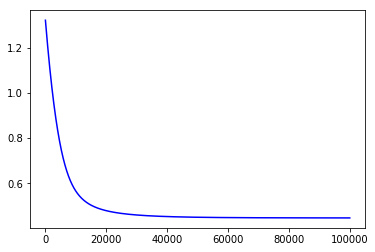

In [153]:
###plot of cost function vs number of iterations
plt.plot(num_of_iter, cost_list,color='blue')
plt.show()